In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('train_Df64byy.csv')
test = pd.read_csv('test_YCcRUnU.csv')
submission = pd.read_csv('sample_submission_QrCyCoT.csv')

In [4]:
train.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [5]:
test.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0


In [6]:
train.shape

(50882, 14)

In [7]:
test.shape

(21805, 13)

In [8]:
import sweetviz

In [9]:
my_report = sweetviz.analyze([train,'Train'], target_feat='Response')

:FEATURES DONE:                    |█████████████████████| [100%]   00:09  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:03  -> (00:00 left)


Creating Associations graph... DONE!


In [10]:
my_report.show_html('ReportEDA.html')

Report ReportEDA.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


In [11]:
train.describe()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000000,50882.000000,50882.000000,50882.000000,30631.000000,50882.000000,50882.000000,50882.000000
mean,25441.500000,1732.788707,44.856275,42.738866,2.439228,15.115188,14183.950069,0.239947
std,14688.512535,1424.081652,17.310271,17.319375,1.025923,6.340663,6590.074873,0.427055
min,1.000000,1.000000,18.000000,16.000000,1.000000,1.000000,2280.000000,0.000000
25%,12721.250000,523.000000,28.000000,27.000000,1.000000,12.000000,9248.000000,0.000000
50%,25441.500000,1391.000000,44.000000,40.000000,3.000000,17.000000,13178.000000,0.000000
75%,38161.750000,2667.000000,59.000000,57.000000,3.000000,20.000000,18096.000000,0.000000
max,50882.000000,6194.000000,75.000000,75.000000,4.000000,22.000000,43350.400000,1.000000


## Finding the null values

In [3]:
train.isna().sum()/len(train)*100

ID                          0.000000
City_Code                   0.000000
Region_Code                 0.000000
Accomodation_Type           0.000000
Reco_Insurance_Type         0.000000
Upper_Age                   0.000000
Lower_Age                   0.000000
Is_Spouse                   0.000000
Health Indicator           22.976691
Holding_Policy_Duration    39.799929
Holding_Policy_Type        39.799929
Reco_Policy_Cat             0.000000
Reco_Policy_Premium         0.000000
Response                    0.000000
dtype: float64

#### Health indicator, Holding policy duration and Holding Policy type are variables with missing values

In [4]:
test.isna().sum()/len(test)*100

ID                          0.000000
City_Code                   0.000000
Region_Code                 0.000000
Accomodation_Type           0.000000
Reco_Insurance_Type         0.000000
Upper_Age                   0.000000
Lower_Age                   0.000000
Is_Spouse                   0.000000
Health Indicator           23.054345
Holding_Policy_Duration    39.454254
Holding_Policy_Type        39.454254
Reco_Policy_Cat             0.000000
Reco_Policy_Premium         0.000000
dtype: float64

#### Health indicator, Holding policy duration and Holding Policy type are variables with missing values same as train data

In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

#### Health indicator and Holding policy duration are object type and holding policy types is float

### Correlation

<AxesSubplot:>

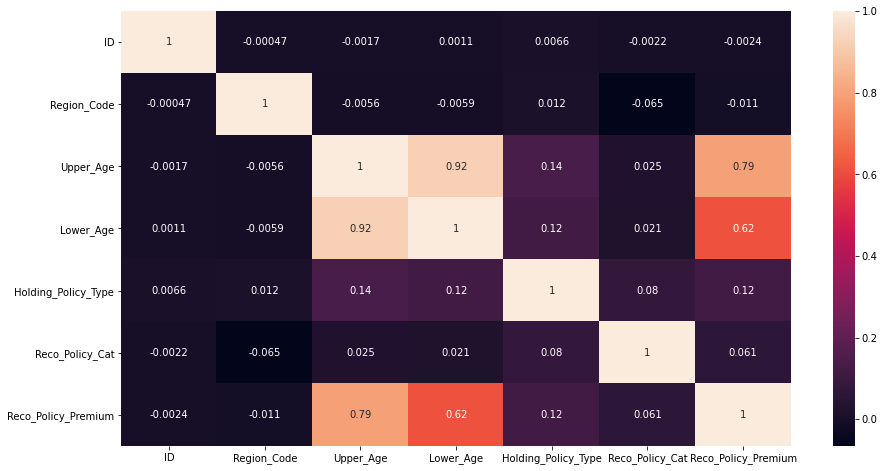

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
corr=train.iloc[:,:-1].corr()
top_features=corr.index
plt.figure(figsize=(15,8))
sns.heatmap(train[top_features].corr(),annot=True)


1. Lower age and upper age high correlation of .92
2. Upper and Lower age with Reco_Policy_Premium have a high correlation

### Imputing missing values 
#### With Missing 

<AxesSubplot:>

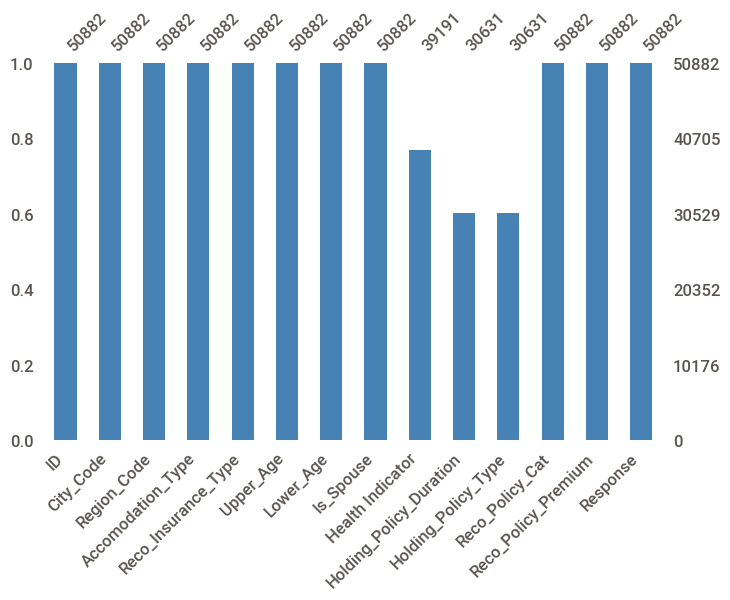

In [26]:
import missingno as msno
import matplotlib.pyplot as plt
msno.bar(train, figsize=(8, 5), fontsize=12, color='steelblue')

In [6]:
train1 = train.copy()
train1['Health Indicator'] = train['Health Indicator'].fillna('Missing')                           
train1['Holding_Policy_Duration'] = train['Holding_Policy_Duration'].fillna('Missing')
train1['Holding_Policy_Type'] = train['Holding_Policy_Type'].fillna(value =-999.00)

test1 = test.copy()
test1['Health Indicator'] = test['Health Indicator'].fillna('Missing')                           
test1['Holding_Policy_Duration'] = test['Holding_Policy_Duration'].fillna('Missing')
test1['Holding_Policy_Type'] = test['Holding_Policy_Type'].fillna(value = -999.00)

<AxesSubplot:>

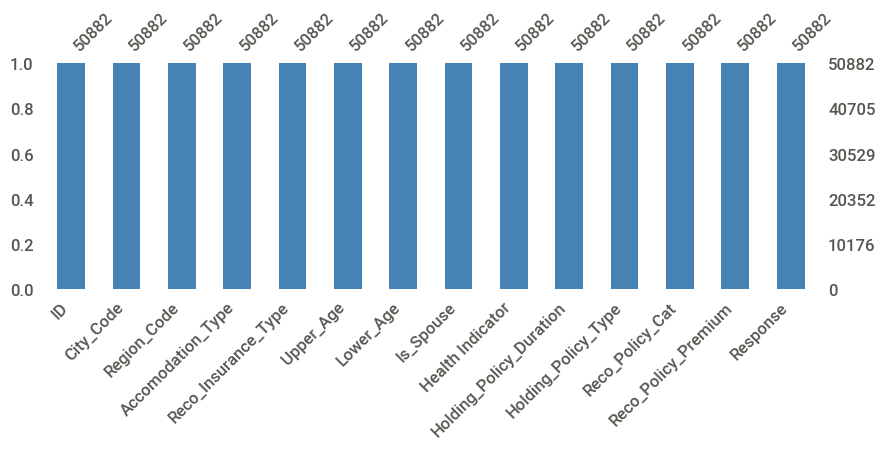

In [41]:
msno.bar(train1, figsize=(10, 3), fontsize=12, color='steelblue')

<AxesSubplot:>

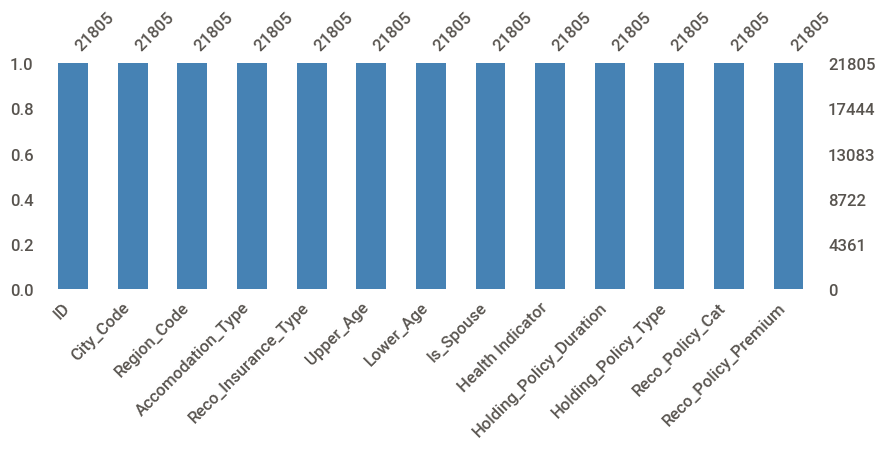

In [42]:
msno.bar(test1, figsize=(10, 3), fontsize=12, color='steelblue')

In [44]:
train1.to_csv('train_imputed_missing.csv', index =False)
test1.to_csv('test_imputed_missing.csv', index =False)

<AxesSubplot:>

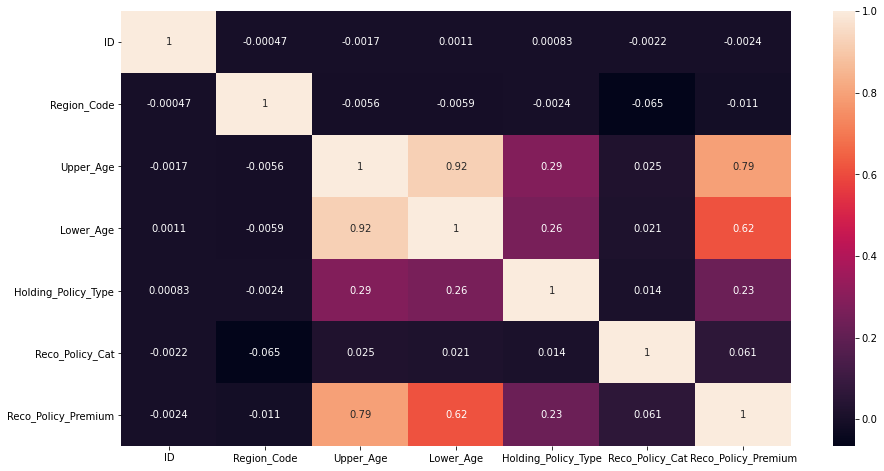

In [7]:
# Correlation for imputed values dataset
corr=train1.iloc[:,:-1].corr()
top_features=corr.index
plt.figure(figsize=(15,8))
sns.heatmap(train1[top_features].corr(),annot=True)


In [8]:
# Merging train and test data
train2 = train.drop(['Response'], axis =1)
train2 = pd.DataFrame(train2)
df = pd.concat([train2, test], axis =0)

In [9]:
df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0


In [10]:
df.shape

(72687, 13)

In [104]:
train.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [117]:
x  = train.loc[train['Health Indicator'].isna()]
x.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,11691.0,25346.617056,14719.832119,3.0,12628.0,25232.0,38168.5,50877.0
Region_Code,11691.0,1732.037379,1420.886632,1.0,515.0,1415.0,2660.5,6181.0
Upper_Age,11691.0,44.994184,17.286173,18.0,28.0,44.0,60.0,75.0
Lower_Age,11691.0,42.895133,17.332178,16.0,27.0,41.0,57.0,75.0
Holding_Policy_Type,7083.0,2.444727,1.026004,1.0,1.0,3.0,3.0,4.0
Reco_Policy_Cat,11691.0,15.041485,6.346731,1.0,12.0,17.0,20.0,22.0
Reco_Policy_Premium,11691.0,14170.379933,6536.041570,2280.0,9296.0,13178.0,18060.0,42316.8
Response,11691.0,0.234197,0.423514,0.0,0.0,0.0,0.0,1.0


In [119]:
for i in x.columns:
    print(i ,":",len(x[i].unique()),"labels")

ID : 11691 labels
City_Code : 36 labels
Region_Code : 3959 labels
Accomodation_Type : 2 labels
Reco_Insurance_Type : 2 labels
Upper_Age : 58 labels
Lower_Age : 60 labels
Is_Spouse : 2 labels
Health Indicator : 1 labels
Holding_Policy_Duration : 16 labels
Holding_Policy_Type : 5 labels
Reco_Policy_Cat : 22 labels
Reco_Policy_Premium : 4026 labels
Response : 2 labels


In [120]:
from fancyimpute import KNN 

In [122]:
# X is the complete data matrix
# X_incomplete has the same values as X except a subset have been replace with NaN

# Use 3 nearest rows which have a feature to fill in each row's missing features
X_filled_knn = KNN(k=3).fit_transform(x)

ValueError: could not convert string to float: 'C5'

In [124]:
import numpy as np
from sklearn.impute import KNNImputer


imputer = KNNImputer(n_neighbors=2)
x_imputed = imputer.fit_transform(x)

ValueError: could not convert string to float: 'C5'

### MEdian Imputation

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72687 entries, 0 to 21804
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       72687 non-null  int64  
 1   City_Code                72687 non-null  object 
 2   Region_Code              72687 non-null  int64  
 3   Accomodation_Type        72687 non-null  object 
 4   Reco_Insurance_Type      72687 non-null  object 
 5   Upper_Age                72687 non-null  int64  
 6   Lower_Age                72687 non-null  int64  
 7   Is_Spouse                72687 non-null  object 
 8   Health Indicator         55969 non-null  object 
 9   Holding_Policy_Duration  43833 non-null  object 
 10  Holding_Policy_Type      43833 non-null  float64
 11  Reco_Policy_Cat          72687 non-null  int64  
 12  Reco_Policy_Premium      72687 non-null  float64
dtypes: float64(2), int64(5), object(6)
memory usage: 7.8+ MB


In [12]:
df['Health Indicator'].value_counts().index[0]

'X1'

In [13]:
df['Holding_Policy_Duration'].mode()

0    1.0
dtype: object

In [14]:
df['Holding_Policy_Type'].median()

3.0

In [15]:
df1 = df.copy()
df1['Health Indicator'] = df['Health Indicator'].fillna(value = df['Health Indicator'].value_counts().index[0])                           
df1['Holding_Policy_Duration'] = df['Holding_Policy_Duration'].fillna(value = df['Holding_Policy_Duration'].value_counts().index[0])
df1['Holding_Policy_Type'] = df['Holding_Policy_Type'].fillna(df1['Holding_Policy_Type'].median())


In [16]:
df1.isna().sum().sum()

0

In [17]:
test.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0


In [18]:
train3 = df1.loc[:50881]

In [19]:
test3 = df1.loc[50881:]

In [20]:
test3 = test3.iloc[1:]
test3.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,X1,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,1.0,3.0,5,22534.0


In [21]:
train3.to_csv('train_median_mode_imputed.csv', index =False)
test3.to_csv('test_median_mode_imputed.csv', index =False)

## Feature Engineering

In [22]:
for i in df1.columns:
    print(i ,":",len(df1[i].unique()),"labels")

ID : 72687 labels
City_Code : 36 labels
Region_Code : 5538 labels
Accomodation_Type : 2 labels
Reco_Insurance_Type : 2 labels
Upper_Age : 58 labels
Lower_Age : 60 labels
Is_Spouse : 2 labels
Health Indicator : 9 labels
Holding_Policy_Duration : 15 labels
Holding_Policy_Type : 4 labels
Reco_Policy_Cat : 22 labels
Reco_Policy_Premium : 7685 labels


In [24]:
# Merging train and test data missing imputed data
train4 = train1.drop(['Response'], axis =1)
train4 = pd.DataFrame(train4)
df2 = pd.concat([train4, test1], axis =0)

In [25]:
for i in df2.columns:
    print(i ,":",len(df2[i].unique()),"labels")

ID : 72687 labels
City_Code : 36 labels
Region_Code : 5538 labels
Accomodation_Type : 2 labels
Reco_Insurance_Type : 2 labels
Upper_Age : 58 labels
Lower_Age : 60 labels
Is_Spouse : 2 labels
Health Indicator : 10 labels
Holding_Policy_Duration : 16 labels
Holding_Policy_Type : 5 labels
Reco_Policy_Cat : 22 labels
Reco_Policy_Premium : 7685 labels


In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72687 entries, 0 to 21804
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       72687 non-null  int64  
 1   City_Code                72687 non-null  object 
 2   Region_Code              72687 non-null  int64  
 3   Accomodation_Type        72687 non-null  object 
 4   Reco_Insurance_Type      72687 non-null  object 
 5   Upper_Age                72687 non-null  int64  
 6   Lower_Age                72687 non-null  int64  
 7   Is_Spouse                72687 non-null  object 
 8   Health Indicator         72687 non-null  object 
 9   Holding_Policy_Duration  72687 non-null  object 
 10  Holding_Policy_Type      72687 non-null  float64
 11  Reco_Policy_Cat          72687 non-null  int64  
 12  Reco_Policy_Premium      72687 non-null  float64
dtypes: float64(2), int64(5), object(6)
memory usage: 7.8+ MB


In [33]:
cat_col_count_high =['City_Code','Region_Code', 'Health Indicator', 'Holding_Policy_Duration', 'Reco_Policy_Cat']

In [27]:
# Converting the Region code, Reco_Policy_Cat to object
#df.column_name = df.column_name.astype(str)
df1.Region_Code = df1.Region_Code.astype(object)
df1.Reco_Policy_Cat = df1.Reco_Policy_Cat.astype(object)

df2.Region_Code = df2.Region_Code.astype(object)
df2.Reco_Policy_Cat = df2.Reco_Policy_Cat.astype(object)

In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72687 entries, 0 to 21804
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       72687 non-null  int64  
 1   City_Code                72687 non-null  object 
 2   Region_Code              72687 non-null  object 
 3   Accomodation_Type        72687 non-null  object 
 4   Reco_Insurance_Type      72687 non-null  object 
 5   Upper_Age                72687 non-null  int64  
 6   Lower_Age                72687 non-null  int64  
 7   Is_Spouse                72687 non-null  object 
 8   Health Indicator         72687 non-null  object 
 9   Holding_Policy_Duration  72687 non-null  object 
 10  Holding_Policy_Type      72687 non-null  float64
 11  Reco_Policy_Cat          72687 non-null  object 
 12  Reco_Policy_Premium      72687 non-null  float64
dtypes: float64(2), int64(3), object(8)
memory usage: 10.3+ MB


In [29]:
for i in df2.columns:
    print(i ,":",len(df2[i].unique()),"labels")

ID : 72687 labels
City_Code : 36 labels
Region_Code : 5538 labels
Accomodation_Type : 2 labels
Reco_Insurance_Type : 2 labels
Upper_Age : 58 labels
Lower_Age : 60 labels
Is_Spouse : 2 labels
Health Indicator : 10 labels
Holding_Policy_Duration : 16 labels
Holding_Policy_Type : 5 labels
Reco_Policy_Cat : 22 labels
Reco_Policy_Premium : 7685 labels


In [30]:
city_code_map1 = df1['City_Code'].value_counts().to_dict()
Region_Code_map1 = df1['Region_Code'].value_counts().to_dict()
Health_Indicator_map1 = df1['Health Indicator'].value_counts().to_dict()
Holding_Policy_Duration_map1 = df1['Holding_Policy_Duration'].value_counts().to_dict()
Reco_Policy_Cat_map1 = df1['Reco_Policy_Cat'].value_counts().to_dict()

city_code_map2 = df2['City_Code'].value_counts().to_dict()
Region_Code_map2 = df2['Region_Code'].value_counts().to_dict()
Health_Indicator_map2 = df2['Health Indicator'].value_counts().to_dict()
Holding_Policy_Duration_map2 = df2['Holding_Policy_Duration'].value_counts().to_dict()
Reco_Policy_Cat_map2 = df2['Reco_Policy_Cat'].value_counts().to_dict()

In [31]:
df1['City_Code_cnt']=df1['City_Code'].map(city_code_map1)
df1['Region_Code_cnt']=df1['Region_Code'].map(Region_Code_map1)
df1['Health Indicator_cnt']=df1['Health Indicator'].map(Health_Indicator_map1)
df1['Holding_Policy_Duration_cnt']=df1['Holding_Policy_Duration'].map(Holding_Policy_Duration_map1)
df1['Reco_Policy_Cat_cnt']=df1['Reco_Policy_Cat'].map(Reco_Policy_Cat_map1)

df2['City_Code_cnt']=df2['City_Code'].map(city_code_map2)
df2['Region_Code_cnt']=df2['Region_Code'].map(Region_Code_map2)
df2['Health Indicator_cnt']=df2['Health Indicator'].map(Health_Indicator_map2)
df2['Holding_Policy_Duration_cnt']=df2['Holding_Policy_Duration'].map(Holding_Policy_Duration_map2)
df2['Reco_Policy_Cat_cnt']=df2['Reco_Policy_Cat'].map(Reco_Policy_Cat_map2)

In [34]:
df1 = df1.drop(cat_col_count_high, axis =1)
df2 = df2.drop(cat_col_count_high, axis=1)

In [35]:
df1.shape

(72687, 13)

In [36]:
df2.shape

(72687, 13)

In [37]:
df1 = pd.get_dummies(df1,drop_first=True)
df2 = pd.get_dummies(df2,drop_first=True)

In [46]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72687 entries, 0 to 21804
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           72687 non-null  int64  
 1   Upper_Age                    72687 non-null  int64  
 2   Lower_Age                    72687 non-null  int64  
 3   Holding_Policy_Type          72687 non-null  float64
 4   Reco_Policy_Premium          72687 non-null  float64
 5   City_Code_cnt                72687 non-null  int64  
 6   Region_Code_cnt              72687 non-null  int64  
 7   Health Indicator_cnt         72687 non-null  int64  
 8   Holding_Policy_Duration_cnt  72687 non-null  int64  
 9   Reco_Policy_Cat_cnt          72687 non-null  int64  
 10  Accomodation_Type_Rented     72687 non-null  uint8  
 11  Reco_Insurance_Type_Joint    72687 non-null  uint8  
 12  Is_Spouse_Yes                72687 non-null  uint8  
dtypes: float64(2), i

In [43]:
df1_train1 = df1.loc[:50881]
df1_test1 = df1.loc[50881:]
df1_test1 = df1_test1.iloc[1:]
#test3.head()

df2_train1 = df2.loc[:50881]
df2_test1 = df2.loc[50881:]
df2_test1 = df2_test1.iloc[1:]

In [47]:
df1_train1.head()

,ID,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Premium,City_Code_cnt,Region_Code_cnt,Health Indicator_cnt,Holding_Policy_Duration_cnt,Reco_Policy_Cat_cnt,Accomodation_Type_Rented,Reco_Insurance_Type_Joint,Is_Spouse_Yes
0,1,36,36,3.0,11628.0,6954,10,35342,6227,9459,1,0,0
1,2,75,22,3.0,30510.0,1963,21,14848,35244,9459,0,1,0
2,3,32,32,1.0,7450.0,1963,8,35342,35244,5319,0,0,0
3,4,52,48,3.0,17780.0,823,5,35342,6227,5319,0,1,0
4,5,44,44,1.0,10404.0,2579,14,14848,5192,5786,1,0,0


In [44]:
print('df1 train shape:', df1_train1.shape, '\ndf2 train shape:', df2_train1.shape)

df1 train shape: (50882, 13) 
df2 train shape: (50882, 13)


In [45]:
print('df1 test shape:', df1_test1.shape, '\ndf2 test shape:', df2_test1.shape)

df1 test shape: (21805, 13) 
df2 test shape: (21805, 13)


In [72]:
df1_train1.to_csv('df1_train_imputed_feature_engineeredV1.csv', index =False)
df1_test1.to_csv('df1_test_imputed_feature_engineered.csv', index =False)

df2_train1.to_csv('df2_train_imputed_feature_engineeredV1.csv', index=False)
df2_test1.to_csv('df2_test_imputed_feature_engineeredV1.csv', index =False)

## Random Forest

### DF1 data

In [52]:
X = df1_train1.drop(['ID'], axis=1)
y = train['Response']

In [6]:
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

RF train roc-auc: 0.9999999983391274
RF test roc-auc: 0.6314698389228339
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30991
           1       1.00      1.00      1.00      9714

    accuracy                           1.00     40705
   macro avg       1.00      1.00      1.00     40705
weighted avg       1.00      1.00      1.00     40705

              precision    recall  f1-score   support

           0       0.76      0.98      0.86      7682
           1       0.42      0.04      0.08      2495

    accuracy                           0.75     10177
   macro avg       0.59      0.51      0.47     10177
weighted avg       0.68      0.75      0.66     10177



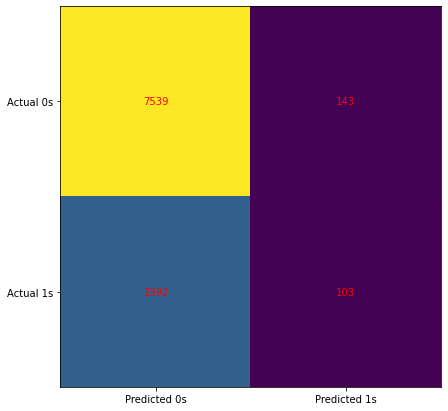

AUC: 0.6314698389228339


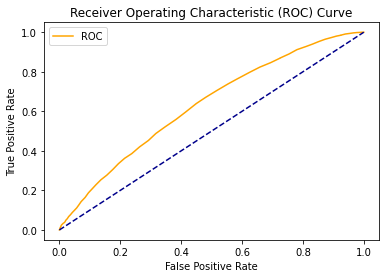

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size=0.2, random_state=1)

## Apply RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
ytrain_pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

from sklearn.metrics import classification_report
# Train Prediction classification report
print(classification_report(y_train, rf_model.predict(X_train)))

# Test Prediction classification report
print(classification_report(y_test, rf_model.predict(X_test)))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, rf_model.predict(X_test))
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

from sklearn import metrics
def plot_roc_curve(fpr, tpr,model):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    auc = metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    print('AUC:', auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show( )
    
fpr, tpr, thresholds = roc_curve(y_test,rf_model.predict_proba(X_test)[:,1] )
plot_roc_curve(fpr,tpr,rf_model)

In [56]:
test_data = df1_test1.drop(['ID'], axis =1)
pred = rf_model.predict(test_data)

submission['Response'] = pred
submission.to_csv('submission1_rf.csv', index =False)


In [57]:
submission.head()

,ID,Response
0,50883,0
1,50884,0
2,50885,0
3,50886,0
4,50887,0


In [58]:
submission.shape

(21805, 2)

In [59]:
test1.shape

(21805, 13)

### DF 2 data

In [60]:
X = df2_train1.drop(['ID'], axis=1)
y = train['Response']

RF train roc-auc: 1.0
RF test roc-auc: 0.625732459451577
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30991
           1       1.00      1.00      1.00      9714

    accuracy                           1.00     40705
   macro avg       1.00      1.00      1.00     40705
weighted avg       1.00      1.00      1.00     40705

              precision    recall  f1-score   support

           0       0.76      0.98      0.86      7682
           1       0.42      0.04      0.08      2495

    accuracy                           0.75     10177
   macro avg       0.59      0.51      0.47     10177
weighted avg       0.68      0.75      0.66     10177



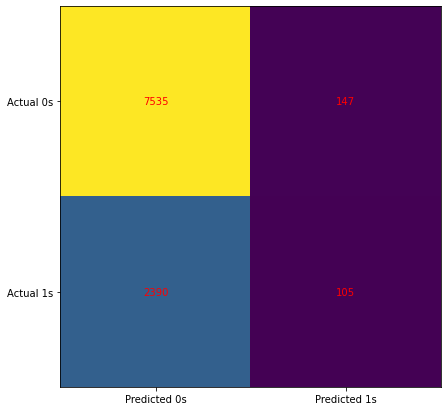

AUC: 0.625732459451577


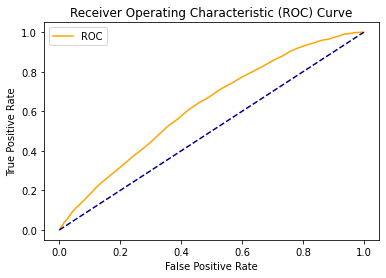

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size=0.2, random_state=1)

## Apply RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
ytrain_pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

from sklearn.metrics import classification_report
# Train Prediction classification report
print(classification_report(y_train, rf_model.predict(X_train)))

# Test Prediction classification report
print(classification_report(y_test, rf_model.predict(X_test)))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, rf_model.predict(X_test))
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

from sklearn import metrics
def plot_roc_curve(fpr, tpr,model):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    auc = metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    print('AUC:', auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show( )
    
fpr, tpr, thresholds = roc_curve(y_test,rf_model.predict_proba(X_test)[:,1] )
plot_roc_curve(fpr,tpr,rf_model)

In [63]:
test_data = df2_test1.drop(['ID'], axis =1)
pred = rf_model.predict(test_data)

submission['Response'] = pred
submission.to_csv('submission2_rf.csv', index =False)

## Logistic Regression

### DF1 data

In [67]:
X = df1_train1.drop(['ID'], axis=1)
y = train['Response']

              precision    recall  f1-score   support

           0       0.77      0.33      0.47     30991
           1       0.24      0.68      0.36      9714

    accuracy                           0.42     40705
   macro avg       0.51      0.51      0.41     40705
weighted avg       0.64      0.42      0.44     40705

              precision    recall  f1-score   support

           0       0.77      0.34      0.47      7682
           1       0.25      0.68      0.37      2495

    accuracy                           0.42     10177
   macro avg       0.51      0.51      0.42     10177
weighted avg       0.64      0.42      0.44     10177

[[7682    0]
 [2495    0]]


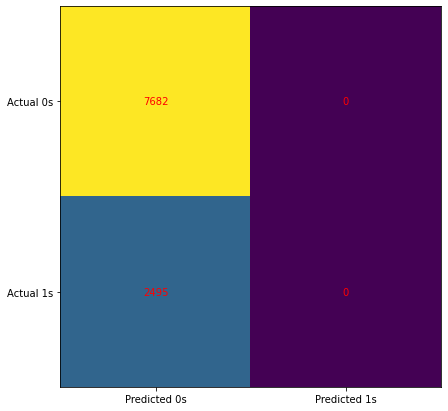

AUC: 0.5157891153303744


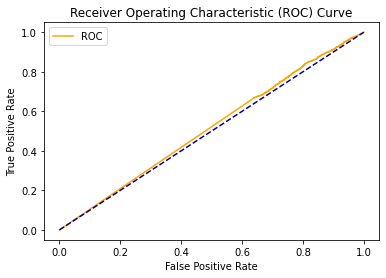

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size=0.2, random_state=1)
from sklearn.preprocessing import StandardScaler #but to visalize with high reolution(0.01),feature scaling helps to execute lot faster
sc = StandardScaler()   
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)
log_classifier.fit(X_train_scaled, y_train)
ytrain_pred = log_classifier.predict_proba(X_train_scaled)

# Predicting the Test set results
y_pred = log_classifier.predict(X_test_scaled)

#print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(X_test_scaled)
#print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

# Train Prediction classification report
print(classification_report(y_train, log_classifier.predict(X_train)))

# Train Prediction classification report
print(classification_report(y_test, log_classifier.predict(X_test)))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(y_test, rf_model.predict(X_test))
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

from sklearn import metrics
def plot_roc_curve(fpr, tpr,model):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    auc = metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    print('AUC:', auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show( )
    
fpr, tpr, thresholds = roc_curve(y_test,log_classifier.predict_proba(X_test)[:,1] )
plot_roc_curve(fpr,tpr,log_classifier)

In [69]:
test_data = df1_test1.drop(['ID'], axis =1)
pred = log_classifier.predict(test_data)

submission['Response'] = pred
submission.to_csv('submission3_lr.csv', index =False)

## SVC df1 data

In [70]:
X = df1_train1.drop(['ID'], axis=1)
y = train['Response']

SVC train roc-auc: 0.5021860820113502
SVC test roc-auc: 0.5004183842822327


D:\Study\Great Lakes\INtro to python\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.76      1.00      0.86     30991
           1       0.00      0.00      0.00      9714

    accuracy                           0.76     40705
   macro avg       0.38      0.50      0.43     40705
weighted avg       0.58      0.76      0.66     40705

              precision    recall  f1-score   support

           0       0.75      1.00      0.86      7682
           1       0.00      0.00      0.00      2495

    accuracy                           0.75     10177
   macro avg       0.38      0.50      0.43     10177
weighted avg       0.57      0.75      0.65     10177



D:\Study\Great Lakes\INtro to python\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


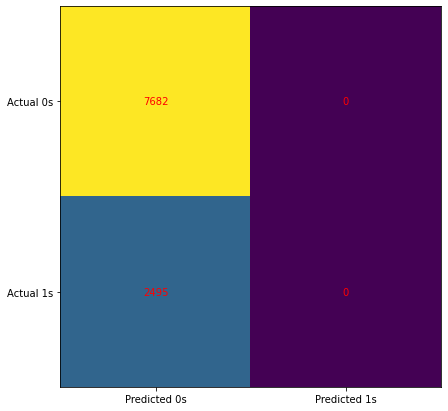

AUC: 0.5004183842822327


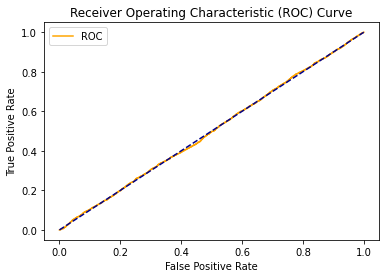

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size=0.2, random_state=1)


# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# Fitting Kernel SVM classifier to the Training set
from sklearn.svm import SVC
svc_classifier = SVC(kernel = 'rbf', random_state = 0, probability=True) #rbf is gaussian kernel
# kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
svc_classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = svc_classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

#svc_classifier.fit(X_train, y_train)
ytrain_pred = svc_classifier.predict_proba(X_train)
print('SVC train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = svc_classifier.predict_proba(X_test)
print('SVC test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

from sklearn.metrics import classification_report
# Train Prediction classification report
print(classification_report(y_train, svc_classifier.predict(X_train)))

# Test Prediction classification report
print(classification_report(y_test, svc_classifier.predict(X_test)))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test,svc_classifier.predict_proba(X_test)[:,1] )
auc = metrics.roc_auc_score(y_test, svc_classifier.predict_proba(X_test)[:,1])
plot_roc_curve(fpr,tpr,svc_classifier)

In [73]:
test_data = df1_test1.drop(['ID'], axis =1)
pred = svc_classifier.predict(test_data)

submission['Response'] = pred
submission.to_csv('submissions4_svc.csv', index =False)

### df1 scaled data

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size=0.2, random_state=1)


# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting Kernel SVM classifier to the Training set
from sklearn.svm import SVC
svc_classifier = SVC(kernel = 'rbf', random_state = 0, probability=True) #rbf is gaussian kernel
# kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
svc_classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = svc_classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

#svc_classifier.fit(X_train, y_train)
ytrain_pred = svc_classifier.predict_proba(X_train)
print('SVC train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = svc_classifier.predict_proba(X_test)
print('SVC test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

from sklearn.metrics import classification_report
# Train Prediction classification report
print(classification_report(y_train, svc_classifier.predict(X_train)))

# Test Prediction classification report
print(classification_report(y_test, svc_classifier.predict(X_test)))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test,svc_classifier.predict_proba(X_test)[:,1] )
auc = metrics.roc_auc_score(y_test, svc_classifier.predict_proba(X_test)[:,1])
plot_roc_curve(fpr,tpr,svc_classifier)

KeyboardInterrupt: 

In [ ]:
test_data = df1_test1.drop(['ID'], axis =1)
test_data = sc.fit_transform(test_data)
pred = svc_classifier.predict(test_data)

submission['Response'] = pred
submission.to_csv('submissions5_svc.csv', index =False)

### DF2 data

In [74]:
X = df2_train1.drop(['ID'], axis=1)
y = train['Response']

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size=0.2, random_state=1)


# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting Kernel SVM classifier to the Training set
from sklearn.svm import SVC
svc_classifier = SVC(kernel = 'rbf', random_state = 0, probability=True) #rbf is gaussian kernel
# kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
svc_classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = svc_classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

#svc_classifier.fit(X_train, y_train)
ytrain_pred = svc_classifier.predict_proba(X_train)
print('SVC train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = svc_classifier.predict_proba(X_test)
print('SVC test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

from sklearn.metrics import classification_report
# Train Prediction classification report
print(classification_report(y_train, svc_classifier.predict(X_train)))

# Test Prediction classification report
print(classification_report(y_test, svc_classifier.predict(X_test)))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test,svc_classifier.predict_proba(X_test)[:,1] )
auc = metrics.roc_auc_score(y_test, svc_classifier.predict_proba(X_test)[:,1])
plot_roc_curve(fpr,tpr,svc_classifier)

KeyboardInterrupt: 

In [ ]:
test_data = df2_test1.drop(['ID'], axis =1)
test_data = sc.fit_transform(test_data)
pred = svc_classifier.predict(test_data)

submission['Response'] = pred
submission.to_csv('submissions6_svc.csv', index =False)

## Naive Bayes

### DF1

In [77]:
X = df1_train1.drop(['ID'], axis=1)
y = train['Response']

Naive Bayes train roc-auc: 0.5395353693677976
Naive Bayes test roc-auc: 0.5458705486995861
              precision    recall  f1-score   support

           0       0.76      1.00      0.86     30991
           1       0.00      0.00      0.00      9714

    accuracy                           0.76     40705
   macro avg       0.38      0.50      0.43     40705
weighted avg       0.58      0.76      0.66     40705

              precision    recall  f1-score   support

           0       0.75      1.00      0.86      7682
           1       0.00      0.00      0.00      2495

    accuracy                           0.75     10177
   macro avg       0.38      0.50      0.43     10177
weighted avg       0.57      0.75      0.65     10177



D:\Study\Great Lakes\INtro to python\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Study\Great Lakes\INtro to python\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


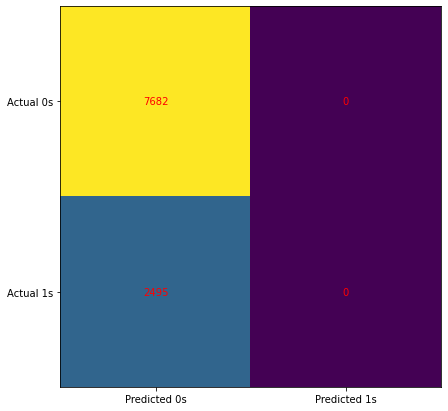

AUC: 0.5458705486995861


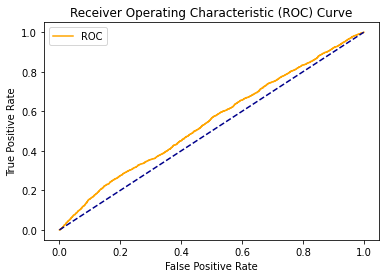

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size=0.2, random_state=1)

#Scaling
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
ytrain_pred = gnb.predict_proba(X_train)
print('Naive Bayes train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = gnb.predict_proba(X_test)
print('Naive Bayes test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

# Train Prediction classification report
print(classification_report(y_train, gnb.predict(X_train)))

# Test Prediction classification report
print(classification_report(y_test, gnb.predict(X_test)))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, gnb.predict(X_test))
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

from sklearn import metrics
def plot_roc_curve(fpr, tpr,model):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    auc = metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    print('AUC:', auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show( )

fpr, tpr, thresholds = roc_curve(y_test,gnb.predict_proba(X_test)[:,1] )
plot_roc_curve(fpr,tpr,gnb)

In [80]:
test_data = df1_test1.drop(['ID'], axis =1)
pred = log_classifier.predict(test_data)

submission['Response'] = pred
submission.to_csv('submission6_nb.csv', index =False)

## Catboost clasifier

### DF1

In [81]:
X = df1_train1.drop(['ID'], axis=1)
y = train['Response']

Learning rate set to 0.047825
0:	learn: 0.6790007	total: 266ms	remaining: 4m 26s
1:	learn: 0.6645567	total: 278ms	remaining: 2m 18s
2:	learn: 0.6530941	total: 288ms	remaining: 1m 35s
3:	learn: 0.6424081	total: 299ms	remaining: 1m 14s
4:	learn: 0.6327700	total: 310ms	remaining: 1m 1s
5:	learn: 0.6235003	total: 321ms	remaining: 53.1s
6:	learn: 0.6157953	total: 330ms	remaining: 46.8s
7:	learn: 0.6063436	total: 341ms	remaining: 42.3s
8:	learn: 0.5980185	total: 352ms	remaining: 38.7s
9:	learn: 0.5926346	total: 362ms	remaining: 35.8s
10:	learn: 0.5877388	total: 373ms	remaining: 33.5s
11:	learn: 0.5831593	total: 384ms	remaining: 31.6s
12:	learn: 0.5790320	total: 394ms	remaining: 29.9s
13:	learn: 0.5752668	total: 403ms	remaining: 28.4s
14:	learn: 0.5720536	total: 415ms	remaining: 27.3s
15:	learn: 0.5690663	total: 427ms	remaining: 26.3s
16:	learn: 0.5662168	total: 438ms	remaining: 25.3s
17:	learn: 0.5638534	total: 451ms	remaining: 24.6s
18:	learn: 0.5608669	total: 461ms	remaining: 23.8s
19:	lea

161:	learn: 0.5148719	total: 2.04s	remaining: 10.6s
162:	learn: 0.5147266	total: 2.06s	remaining: 10.6s
163:	learn: 0.5146574	total: 2.07s	remaining: 10.5s
164:	learn: 0.5145992	total: 2.08s	remaining: 10.5s
165:	learn: 0.5144415	total: 2.09s	remaining: 10.5s
166:	learn: 0.5142986	total: 2.1s	remaining: 10.5s
167:	learn: 0.5142289	total: 2.11s	remaining: 10.5s
168:	learn: 0.5141518	total: 2.12s	remaining: 10.4s
169:	learn: 0.5140700	total: 2.13s	remaining: 10.4s
170:	learn: 0.5139391	total: 2.14s	remaining: 10.4s
171:	learn: 0.5138607	total: 2.15s	remaining: 10.4s
172:	learn: 0.5137462	total: 2.16s	remaining: 10.3s
173:	learn: 0.5137073	total: 2.17s	remaining: 10.3s
174:	learn: 0.5135962	total: 2.18s	remaining: 10.3s
175:	learn: 0.5134830	total: 2.19s	remaining: 10.3s
176:	learn: 0.5133641	total: 2.2s	remaining: 10.2s
177:	learn: 0.5132632	total: 2.21s	remaining: 10.2s
178:	learn: 0.5131778	total: 2.22s	remaining: 10.2s
179:	learn: 0.5130821	total: 2.23s	remaining: 10.2s
180:	learn: 0.

320:	learn: 0.5005586	total: 3.66s	remaining: 7.74s
321:	learn: 0.5004866	total: 3.68s	remaining: 7.74s
322:	learn: 0.5003962	total: 3.69s	remaining: 7.73s
323:	learn: 0.5003380	total: 3.7s	remaining: 7.71s
324:	learn: 0.5002576	total: 3.71s	remaining: 7.7s
325:	learn: 0.5001821	total: 3.72s	remaining: 7.68s
326:	learn: 0.5001255	total: 3.73s	remaining: 7.67s
327:	learn: 0.5000458	total: 3.74s	remaining: 7.66s
328:	learn: 0.4999707	total: 3.75s	remaining: 7.64s
329:	learn: 0.4998878	total: 3.76s	remaining: 7.63s
330:	learn: 0.4997844	total: 3.77s	remaining: 7.62s
331:	learn: 0.4997332	total: 3.78s	remaining: 7.6s
332:	learn: 0.4996563	total: 3.79s	remaining: 7.59s
333:	learn: 0.4995906	total: 3.8s	remaining: 7.58s
334:	learn: 0.4995251	total: 3.81s	remaining: 7.56s
335:	learn: 0.4994352	total: 3.82s	remaining: 7.55s
336:	learn: 0.4993577	total: 3.83s	remaining: 7.54s
337:	learn: 0.4993031	total: 3.85s	remaining: 7.53s
338:	learn: 0.4992334	total: 3.86s	remaining: 7.52s
339:	learn: 0.49

491:	learn: 0.4880843	total: 5.64s	remaining: 5.82s
492:	learn: 0.4880302	total: 5.65s	remaining: 5.81s
493:	learn: 0.4879745	total: 5.66s	remaining: 5.8s
494:	learn: 0.4879290	total: 5.67s	remaining: 5.79s
495:	learn: 0.4878339	total: 5.68s	remaining: 5.78s
496:	learn: 0.4877329	total: 5.7s	remaining: 5.76s
497:	learn: 0.4876925	total: 5.71s	remaining: 5.75s
498:	learn: 0.4876274	total: 5.72s	remaining: 5.74s
499:	learn: 0.4875792	total: 5.73s	remaining: 5.73s
500:	learn: 0.4875129	total: 5.74s	remaining: 5.72s
501:	learn: 0.4874463	total: 5.75s	remaining: 5.7s
502:	learn: 0.4874031	total: 5.76s	remaining: 5.69s
503:	learn: 0.4873275	total: 5.77s	remaining: 5.68s
504:	learn: 0.4872610	total: 5.78s	remaining: 5.66s
505:	learn: 0.4871636	total: 5.79s	remaining: 5.65s
506:	learn: 0.4870902	total: 5.8s	remaining: 5.64s
507:	learn: 0.4870457	total: 5.81s	remaining: 5.63s
508:	learn: 0.4870176	total: 5.82s	remaining: 5.61s
509:	learn: 0.4869345	total: 5.83s	remaining: 5.6s
510:	learn: 0.486

666:	learn: 0.4772198	total: 7.45s	remaining: 3.72s
667:	learn: 0.4771483	total: 7.46s	remaining: 3.71s
668:	learn: 0.4770623	total: 7.48s	remaining: 3.7s
669:	learn: 0.4770170	total: 7.49s	remaining: 3.69s
670:	learn: 0.4769514	total: 7.5s	remaining: 3.68s
671:	learn: 0.4769060	total: 7.52s	remaining: 3.67s
672:	learn: 0.4768495	total: 7.53s	remaining: 3.66s
673:	learn: 0.4768050	total: 7.54s	remaining: 3.65s
674:	learn: 0.4767273	total: 7.55s	remaining: 3.63s
675:	learn: 0.4766820	total: 7.56s	remaining: 3.62s
676:	learn: 0.4766328	total: 7.57s	remaining: 3.61s
677:	learn: 0.4765933	total: 7.58s	remaining: 3.6s
678:	learn: 0.4765193	total: 7.59s	remaining: 3.59s
679:	learn: 0.4764637	total: 7.6s	remaining: 3.58s
680:	learn: 0.4763954	total: 7.62s	remaining: 3.57s
681:	learn: 0.4763213	total: 7.63s	remaining: 3.56s
682:	learn: 0.4762754	total: 7.64s	remaining: 3.54s
683:	learn: 0.4762068	total: 7.65s	remaining: 3.53s
684:	learn: 0.4761817	total: 7.66s	remaining: 3.52s
685:	learn: 0.47

839:	learn: 0.4680509	total: 9.43s	remaining: 1.79s
840:	learn: 0.4679951	total: 9.44s	remaining: 1.78s
841:	learn: 0.4679558	total: 9.46s	remaining: 1.77s
842:	learn: 0.4678994	total: 9.47s	remaining: 1.76s
843:	learn: 0.4678619	total: 9.48s	remaining: 1.75s
844:	learn: 0.4678158	total: 9.49s	remaining: 1.74s
845:	learn: 0.4677378	total: 9.5s	remaining: 1.73s
846:	learn: 0.4676694	total: 9.51s	remaining: 1.72s
847:	learn: 0.4675934	total: 9.52s	remaining: 1.71s
848:	learn: 0.4675321	total: 9.53s	remaining: 1.7s
849:	learn: 0.4674947	total: 9.54s	remaining: 1.68s
850:	learn: 0.4674237	total: 9.55s	remaining: 1.67s
851:	learn: 0.4673449	total: 9.56s	remaining: 1.66s
852:	learn: 0.4672762	total: 9.57s	remaining: 1.65s
853:	learn: 0.4672297	total: 9.58s	remaining: 1.64s
854:	learn: 0.4671530	total: 9.6s	remaining: 1.63s
855:	learn: 0.4671054	total: 9.61s	remaining: 1.61s
856:	learn: 0.4670779	total: 9.62s	remaining: 1.6s
857:	learn: 0.4670386	total: 9.63s	remaining: 1.59s
858:	learn: 0.46

Catboost train roc-auc: 0.7991320389515544
Catboost test roc-auc: 0.6602410235727899
              precision    recall  f1-score   support

           0       0.78      1.00      0.87     30991
           1       0.89      0.10      0.18      9714

    accuracy                           0.78     40705
   macro avg       0.84      0.55      0.53     40705
weighted avg       0.81      0.78      0.71     40705

              precision    recall  f1-score   support

           0       0.76      0.99      0.86      7682
           1       0.52      0.04      0.08      2495

    accuracy                           0.76     10177
   macro avg       0.64      0.51      0.47     10177
weighted avg       0.70      0.76      0.67     10177



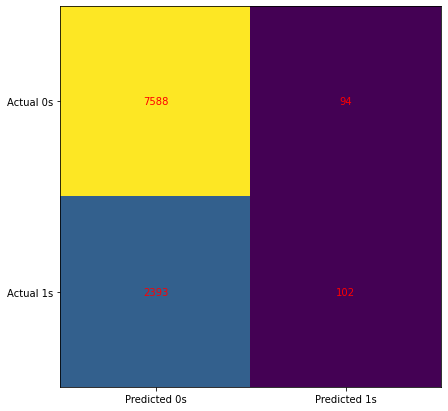

AUC: 0.6602410235727899


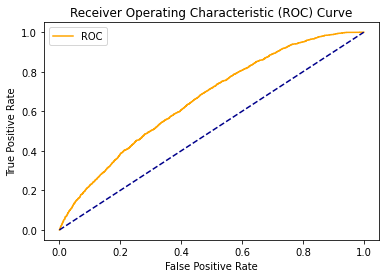

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size=0.2, random_state=1)

#Scaling
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

import catboost as cb
cb_classifier = cb.CatBoostClassifier()
cb_classifier.fit(X_train, y_train)
ytrain_pred = cb_classifier.predict_proba(X_train)
print('Catboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = cb_classifier.predict_proba(X_test)
print('Catboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

# Train Prediction classification report
print(classification_report(y_train, cb_classifier.predict(X_train)))

# Test Prediction classification report
print(classification_report(y_test, cb_classifier.predict(X_test)))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, cb_classifier.predict(X_test))
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

from sklearn import metrics
def plot_roc_curve(fpr, tpr,model):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    auc = metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    print('AUC:', auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show( )

fpr, tpr, thresholds = roc_curve(y_test,cb_classifier.predict_proba(X_test)[:,1] )
plot_roc_curve(fpr,tpr,cb_classifier)

In [83]:
test_data = df1_test1.drop(['ID'], axis =1)
pred = cb_classifier.predict(test_data)

submission['Response'] = pred
submission.to_csv('submission7_cb.csv', index =False)

### Hyper Parameter Tuning

0:	learn: 0.6842161	total: 6.04ms	remaining: 1.81s
1:	learn: 0.6757572	total: 12.3ms	remaining: 1.83s
2:	learn: 0.6676724	total: 20.2ms	remaining: 2s
3:	learn: 0.6602832	total: 29.1ms	remaining: 2.15s
4:	learn: 0.6531884	total: 34.9ms	remaining: 2.06s
5:	learn: 0.6467077	total: 42.6ms	remaining: 2.09s
6:	learn: 0.6388798	total: 49.7ms	remaining: 2.08s
7:	learn: 0.6332219	total: 56ms	remaining: 2.04s
8:	learn: 0.6279121	total: 63.8ms	remaining: 2.06s
9:	learn: 0.6226950	total: 71.3ms	remaining: 2.07s
10:	learn: 0.6180413	total: 79ms	remaining: 2.08s
11:	learn: 0.6136720	total: 86.4ms	remaining: 2.07s
12:	learn: 0.6095287	total: 94.5ms	remaining: 2.09s
13:	learn: 0.6056843	total: 101ms	remaining: 2.06s
14:	learn: 0.6020897	total: 108ms	remaining: 2.06s
15:	learn: 0.5987199	total: 115ms	remaining: 2.05s
16:	learn: 0.5955441	total: 123ms	remaining: 2.05s
17:	learn: 0.5924794	total: 132ms	remaining: 2.07s
18:	learn: 0.5896915	total: 141ms	remaining: 2.08s
19:	learn: 0.5870774	total: 148ms	r

161:	learn: 0.5287871	total: 1.06s	remaining: 902ms
162:	learn: 0.5287651	total: 1.06s	remaining: 895ms
163:	learn: 0.5287124	total: 1.07s	remaining: 888ms
164:	learn: 0.5286375	total: 1.08s	remaining: 881ms
165:	learn: 0.5286047	total: 1.08s	remaining: 875ms
166:	learn: 0.5285473	total: 1.09s	remaining: 870ms
167:	learn: 0.5284255	total: 1.1s	remaining: 863ms
168:	learn: 0.5283740	total: 1.11s	remaining: 858ms
169:	learn: 0.5283176	total: 1.11s	remaining: 852ms
170:	learn: 0.5282552	total: 1.12s	remaining: 846ms
171:	learn: 0.5282157	total: 1.13s	remaining: 839ms
172:	learn: 0.5281335	total: 1.13s	remaining: 833ms
173:	learn: 0.5280985	total: 1.14s	remaining: 827ms
174:	learn: 0.5280829	total: 1.15s	remaining: 820ms
175:	learn: 0.5280566	total: 1.15s	remaining: 812ms
176:	learn: 0.5279500	total: 1.16s	remaining: 806ms
177:	learn: 0.5278685	total: 1.16s	remaining: 798ms
178:	learn: 0.5277437	total: 1.17s	remaining: 791ms
179:	learn: 0.5276599	total: 1.18s	remaining: 784ms
180:	learn: 0

26:	learn: 0.5718062	total: 184ms	remaining: 1.86s
27:	learn: 0.5698238	total: 191ms	remaining: 1.85s
28:	learn: 0.5676206	total: 197ms	remaining: 1.84s
29:	learn: 0.5661155	total: 205ms	remaining: 1.84s
30:	learn: 0.5648365	total: 211ms	remaining: 1.83s
31:	learn: 0.5635834	total: 218ms	remaining: 1.83s
32:	learn: 0.5624592	total: 225ms	remaining: 1.82s
33:	learn: 0.5607122	total: 235ms	remaining: 1.84s
34:	learn: 0.5593819	total: 242ms	remaining: 1.83s
35:	learn: 0.5583939	total: 248ms	remaining: 1.82s
36:	learn: 0.5573447	total: 255ms	remaining: 1.81s
37:	learn: 0.5564924	total: 263ms	remaining: 1.81s
38:	learn: 0.5551661	total: 269ms	remaining: 1.8s
39:	learn: 0.5544517	total: 276ms	remaining: 1.79s
40:	learn: 0.5537779	total: 283ms	remaining: 1.79s
41:	learn: 0.5530228	total: 289ms	remaining: 1.77s
42:	learn: 0.5523465	total: 295ms	remaining: 1.76s
43:	learn: 0.5515576	total: 300ms	remaining: 1.75s
44:	learn: 0.5510422	total: 306ms	remaining: 1.73s
45:	learn: 0.5505153	total: 313m

188:	learn: 0.5231151	total: 1.24s	remaining: 728ms
189:	learn: 0.5230941	total: 1.25s	remaining: 723ms
190:	learn: 0.5230416	total: 1.25s	remaining: 716ms
191:	learn: 0.5229939	total: 1.26s	remaining: 710ms
192:	learn: 0.5229386	total: 1.27s	remaining: 703ms
193:	learn: 0.5228957	total: 1.28s	remaining: 701ms
194:	learn: 0.5228701	total: 1.29s	remaining: 695ms
195:	learn: 0.5227815	total: 1.3s	remaining: 688ms
196:	learn: 0.5227144	total: 1.3s	remaining: 682ms
197:	learn: 0.5226679	total: 1.31s	remaining: 676ms
198:	learn: 0.5226400	total: 1.32s	remaining: 670ms
199:	learn: 0.5226117	total: 1.32s	remaining: 663ms
200:	learn: 0.5225399	total: 1.33s	remaining: 655ms
201:	learn: 0.5224748	total: 1.34s	remaining: 649ms
202:	learn: 0.5224584	total: 1.34s	remaining: 641ms
203:	learn: 0.5224038	total: 1.35s	remaining: 634ms
204:	learn: 0.5223432	total: 1.35s	remaining: 627ms
205:	learn: 0.5223018	total: 1.36s	remaining: 620ms
206:	learn: 0.5221817	total: 1.36s	remaining: 614ms
207:	learn: 0.

47:	learn: 0.5483750	total: 354ms	remaining: 1.86s
48:	learn: 0.5477689	total: 361ms	remaining: 1.85s
49:	learn: 0.5469608	total: 367ms	remaining: 1.84s
50:	learn: 0.5461780	total: 374ms	remaining: 1.82s
51:	learn: 0.5457030	total: 380ms	remaining: 1.81s
52:	learn: 0.5449990	total: 388ms	remaining: 1.81s
53:	learn: 0.5441195	total: 393ms	remaining: 1.79s
54:	learn: 0.5437436	total: 401ms	remaining: 1.78s
55:	learn: 0.5434542	total: 408ms	remaining: 1.78s
56:	learn: 0.5431216	total: 416ms	remaining: 1.77s
57:	learn: 0.5427394	total: 422ms	remaining: 1.76s
58:	learn: 0.5424673	total: 428ms	remaining: 1.75s
59:	learn: 0.5422615	total: 436ms	remaining: 1.74s
60:	learn: 0.5417021	total: 442ms	remaining: 1.73s
61:	learn: 0.5415186	total: 448ms	remaining: 1.72s
62:	learn: 0.5409388	total: 454ms	remaining: 1.71s
63:	learn: 0.5407753	total: 460ms	remaining: 1.7s
64:	learn: 0.5404729	total: 467ms	remaining: 1.69s
65:	learn: 0.5402440	total: 473ms	remaining: 1.68s
66:	learn: 0.5400588	total: 479m

215:	learn: 0.5245591	total: 1.42s	remaining: 552ms
216:	learn: 0.5245321	total: 1.43s	remaining: 546ms
217:	learn: 0.5245120	total: 1.43s	remaining: 539ms
218:	learn: 0.5244848	total: 1.44s	remaining: 533ms
219:	learn: 0.5244469	total: 1.45s	remaining: 526ms
220:	learn: 0.5244186	total: 1.45s	remaining: 520ms
221:	learn: 0.5243499	total: 1.46s	remaining: 514ms
222:	learn: 0.5242548	total: 1.47s	remaining: 507ms
223:	learn: 0.5242156	total: 1.47s	remaining: 500ms
224:	learn: 0.5241782	total: 1.48s	remaining: 494ms
225:	learn: 0.5241488	total: 1.49s	remaining: 486ms
226:	learn: 0.5237897	total: 1.49s	remaining: 481ms
227:	learn: 0.5237354	total: 1.5s	remaining: 474ms
228:	learn: 0.5237210	total: 1.51s	remaining: 468ms
229:	learn: 0.5237048	total: 1.51s	remaining: 461ms
230:	learn: 0.5236687	total: 1.52s	remaining: 455ms
231:	learn: 0.5236288	total: 1.53s	remaining: 448ms
232:	learn: 0.5236068	total: 1.53s	remaining: 442ms
233:	learn: 0.5235779	total: 1.54s	remaining: 435ms
234:	learn: 0

76:	learn: 0.5234174	total: 543ms	remaining: 1.57s
77:	learn: 0.5232947	total: 552ms	remaining: 1.57s
78:	learn: 0.5231776	total: 561ms	remaining: 1.57s
79:	learn: 0.5231144	total: 567ms	remaining: 1.56s
80:	learn: 0.5230543	total: 575ms	remaining: 1.55s
81:	learn: 0.5229284	total: 584ms	remaining: 1.55s
82:	learn: 0.5228723	total: 590ms	remaining: 1.54s
83:	learn: 0.5228406	total: 596ms	remaining: 1.53s
84:	learn: 0.5227329	total: 605ms	remaining: 1.53s
85:	learn: 0.5226334	total: 617ms	remaining: 1.53s
86:	learn: 0.5225563	total: 625ms	remaining: 1.53s
87:	learn: 0.5224313	total: 632ms	remaining: 1.52s
88:	learn: 0.5223423	total: 639ms	remaining: 1.51s
89:	learn: 0.5222442	total: 649ms	remaining: 1.51s
90:	learn: 0.5222059	total: 657ms	remaining: 1.51s
91:	learn: 0.5221552	total: 665ms	remaining: 1.5s
92:	learn: 0.5218066	total: 672ms	remaining: 1.5s
93:	learn: 0.5217013	total: 681ms	remaining: 1.49s
94:	learn: 0.5214758	total: 686ms	remaining: 1.48s
95:	learn: 0.5214042	total: 694ms

247:	learn: 0.5047702	total: 1.77s	remaining: 372ms
248:	learn: 0.5047165	total: 1.78s	remaining: 365ms
249:	learn: 0.5046601	total: 1.79s	remaining: 358ms
250:	learn: 0.5045659	total: 1.8s	remaining: 351ms
251:	learn: 0.5045147	total: 1.8s	remaining: 343ms
252:	learn: 0.5044583	total: 1.81s	remaining: 336ms
253:	learn: 0.5043709	total: 1.82s	remaining: 329ms
254:	learn: 0.5042755	total: 1.82s	remaining: 322ms
255:	learn: 0.5042246	total: 1.84s	remaining: 316ms
256:	learn: 0.5038136	total: 1.85s	remaining: 309ms
257:	learn: 0.5037622	total: 1.86s	remaining: 302ms
258:	learn: 0.5036914	total: 1.86s	remaining: 295ms
259:	learn: 0.5036129	total: 1.88s	remaining: 289ms
260:	learn: 0.5035632	total: 1.89s	remaining: 282ms
261:	learn: 0.5034723	total: 1.9s	remaining: 275ms
262:	learn: 0.5033863	total: 1.9s	remaining: 268ms
263:	learn: 0.5033049	total: 1.91s	remaining: 260ms
264:	learn: 0.5032379	total: 1.92s	remaining: 253ms
265:	learn: 0.5031814	total: 1.92s	remaining: 246ms
266:	learn: 0.50

108:	learn: 0.5154348	total: 714ms	remaining: 1.25s
109:	learn: 0.5153162	total: 720ms	remaining: 1.24s
110:	learn: 0.5152162	total: 728ms	remaining: 1.24s
111:	learn: 0.5150398	total: 735ms	remaining: 1.23s
112:	learn: 0.5148821	total: 743ms	remaining: 1.23s
113:	learn: 0.5143567	total: 750ms	remaining: 1.22s
114:	learn: 0.5142602	total: 758ms	remaining: 1.22s
115:	learn: 0.5141604	total: 768ms	remaining: 1.22s
116:	learn: 0.5139912	total: 777ms	remaining: 1.22s
117:	learn: 0.5138560	total: 784ms	remaining: 1.21s
118:	learn: 0.5137422	total: 793ms	remaining: 1.21s
119:	learn: 0.5136364	total: 800ms	remaining: 1.2s
120:	learn: 0.5134664	total: 808ms	remaining: 1.2s
121:	learn: 0.5133758	total: 815ms	remaining: 1.19s
122:	learn: 0.5131968	total: 823ms	remaining: 1.18s
123:	learn: 0.5131113	total: 831ms	remaining: 1.18s
124:	learn: 0.5129719	total: 839ms	remaining: 1.17s
125:	learn: 0.5129010	total: 846ms	remaining: 1.17s
126:	learn: 0.5127867	total: 854ms	remaining: 1.16s
127:	learn: 0.

287:	learn: 0.4970226	total: 1.95s	remaining: 81.3ms
288:	learn: 0.4969213	total: 1.96s	remaining: 74.6ms
289:	learn: 0.4968555	total: 1.97s	remaining: 67.9ms
290:	learn: 0.4968021	total: 1.98s	remaining: 61.1ms
291:	learn: 0.4967745	total: 1.98s	remaining: 54.3ms
292:	learn: 0.4966859	total: 1.99s	remaining: 47.6ms
293:	learn: 0.4965813	total: 2s	remaining: 40.8ms
294:	learn: 0.4965085	total: 2.01s	remaining: 34ms
295:	learn: 0.4964134	total: 2.01s	remaining: 27.2ms
296:	learn: 0.4962985	total: 2.02s	remaining: 20.4ms
297:	learn: 0.4962124	total: 2.03s	remaining: 13.6ms
298:	learn: 0.4961443	total: 2.04s	remaining: 6.81ms
299:	learn: 0.4960672	total: 2.04s	remaining: 0us
0:	learn: 0.6644426	total: 6.9ms	remaining: 2.06s
1:	learn: 0.6408852	total: 12.3ms	remaining: 1.84s
2:	learn: 0.6217304	total: 20.1ms	remaining: 1.99s
3:	learn: 0.6043271	total: 27.8ms	remaining: 2.06s
4:	learn: 0.5922509	total: 34ms	remaining: 2.01s
5:	learn: 0.5829871	total: 41.1ms	remaining: 2.01s
6:	learn: 0.5754

161:	learn: 0.5103972	total: 1.07s	remaining: 913ms
162:	learn: 0.5102383	total: 1.08s	remaining: 907ms
163:	learn: 0.5101373	total: 1.09s	remaining: 902ms
164:	learn: 0.5100333	total: 1.09s	remaining: 895ms
165:	learn: 0.5099247	total: 1.1s	remaining: 889ms
166:	learn: 0.5098592	total: 1.11s	remaining: 882ms
167:	learn: 0.5096701	total: 1.11s	remaining: 875ms
168:	learn: 0.5096038	total: 1.12s	remaining: 868ms
169:	learn: 0.5094999	total: 1.13s	remaining: 861ms
170:	learn: 0.5094286	total: 1.13s	remaining: 853ms
171:	learn: 0.5093354	total: 1.14s	remaining: 847ms
172:	learn: 0.5092368	total: 1.14s	remaining: 839ms
173:	learn: 0.5091326	total: 1.15s	remaining: 832ms
174:	learn: 0.5089502	total: 1.16s	remaining: 825ms
175:	learn: 0.5088639	total: 1.16s	remaining: 818ms
176:	learn: 0.5087789	total: 1.17s	remaining: 811ms
177:	learn: 0.5085970	total: 1.17s	remaining: 804ms
178:	learn: 0.5085324	total: 1.18s	remaining: 798ms
179:	learn: 0.5084731	total: 1.19s	remaining: 791ms
180:	learn: 0

30:	learn: 0.5298713	total: 187ms	remaining: 1.62s
31:	learn: 0.5296532	total: 192ms	remaining: 1.61s
32:	learn: 0.5294387	total: 199ms	remaining: 1.61s
33:	learn: 0.5291100	total: 204ms	remaining: 1.6s
34:	learn: 0.5289452	total: 210ms	remaining: 1.59s
35:	learn: 0.5283711	total: 216ms	remaining: 1.58s
36:	learn: 0.5282243	total: 221ms	remaining: 1.57s
37:	learn: 0.5280248	total: 227ms	remaining: 1.56s
38:	learn: 0.5278757	total: 234ms	remaining: 1.57s
39:	learn: 0.5274857	total: 241ms	remaining: 1.57s
40:	learn: 0.5274265	total: 249ms	remaining: 1.57s
41:	learn: 0.5272272	total: 256ms	remaining: 1.57s
42:	learn: 0.5270956	total: 262ms	remaining: 1.57s
43:	learn: 0.5267523	total: 268ms	remaining: 1.56s
44:	learn: 0.5265103	total: 275ms	remaining: 1.56s
45:	learn: 0.5249664	total: 282ms	remaining: 1.56s
46:	learn: 0.5247567	total: 289ms	remaining: 1.55s
47:	learn: 0.5246560	total: 295ms	remaining: 1.55s
48:	learn: 0.5243270	total: 300ms	remaining: 1.53s
49:	learn: 0.5242260	total: 305m

216:	learn: 0.4984890	total: 1.43s	remaining: 546ms
217:	learn: 0.4984009	total: 1.43s	remaining: 539ms
218:	learn: 0.4983005	total: 1.44s	remaining: 533ms
219:	learn: 0.4981680	total: 1.45s	remaining: 527ms
220:	learn: 0.4980419	total: 1.45s	remaining: 520ms
221:	learn: 0.4979037	total: 1.46s	remaining: 514ms
222:	learn: 0.4977935	total: 1.47s	remaining: 508ms
223:	learn: 0.4976712	total: 1.48s	remaining: 501ms
224:	learn: 0.4976022	total: 1.48s	remaining: 494ms
225:	learn: 0.4975461	total: 1.49s	remaining: 488ms
226:	learn: 0.4974163	total: 1.49s	remaining: 481ms
227:	learn: 0.4973280	total: 1.5s	remaining: 474ms
228:	learn: 0.4972332	total: 1.51s	remaining: 468ms
229:	learn: 0.4971499	total: 1.51s	remaining: 461ms
230:	learn: 0.4970112	total: 1.52s	remaining: 454ms
231:	learn: 0.4969294	total: 1.53s	remaining: 448ms
232:	learn: 0.4968661	total: 1.53s	remaining: 441ms
233:	learn: 0.4967633	total: 1.54s	remaining: 434ms
234:	learn: 0.4966088	total: 1.55s	remaining: 428ms
235:	learn: 0

84:	learn: 0.5128106	total: 543ms	remaining: 1.37s
85:	learn: 0.5126432	total: 550ms	remaining: 1.37s
86:	learn: 0.5124010	total: 563ms	remaining: 1.38s
87:	learn: 0.5122405	total: 569ms	remaining: 1.37s
88:	learn: 0.5120493	total: 576ms	remaining: 1.37s
89:	learn: 0.5119128	total: 583ms	remaining: 1.36s
90:	learn: 0.5116983	total: 590ms	remaining: 1.35s
91:	learn: 0.5115457	total: 596ms	remaining: 1.35s
92:	learn: 0.5113907	total: 603ms	remaining: 1.34s
93:	learn: 0.5111256	total: 608ms	remaining: 1.33s
94:	learn: 0.5109800	total: 613ms	remaining: 1.32s
95:	learn: 0.5108222	total: 619ms	remaining: 1.31s
96:	learn: 0.5106886	total: 624ms	remaining: 1.31s
97:	learn: 0.5104923	total: 631ms	remaining: 1.3s
98:	learn: 0.5097866	total: 638ms	remaining: 1.3s
99:	learn: 0.5095937	total: 645ms	remaining: 1.29s
100:	learn: 0.5094607	total: 653ms	remaining: 1.29s
101:	learn: 0.5092689	total: 660ms	remaining: 1.28s
102:	learn: 0.5090868	total: 667ms	remaining: 1.27s
103:	learn: 0.5088833	total: 6

245:	learn: 0.4906132	total: 1.6s	remaining: 352ms
246:	learn: 0.4904968	total: 1.61s	remaining: 346ms
247:	learn: 0.4904162	total: 1.62s	remaining: 339ms
248:	learn: 0.4903065	total: 1.63s	remaining: 333ms
249:	learn: 0.4901119	total: 1.63s	remaining: 327ms
250:	learn: 0.4899723	total: 1.64s	remaining: 320ms
251:	learn: 0.4897880	total: 1.65s	remaining: 314ms
252:	learn: 0.4896912	total: 1.65s	remaining: 307ms
253:	learn: 0.4895546	total: 1.66s	remaining: 301ms
254:	learn: 0.4894887	total: 1.67s	remaining: 294ms
255:	learn: 0.4894130	total: 1.67s	remaining: 288ms
256:	learn: 0.4893404	total: 1.68s	remaining: 281ms
257:	learn: 0.4892553	total: 1.69s	remaining: 275ms
258:	learn: 0.4891663	total: 1.69s	remaining: 268ms
259:	learn: 0.4890374	total: 1.7s	remaining: 262ms
260:	learn: 0.4889422	total: 1.71s	remaining: 255ms
261:	learn: 0.4888334	total: 1.71s	remaining: 249ms
262:	learn: 0.4887056	total: 1.72s	remaining: 242ms
263:	learn: 0.4885118	total: 1.73s	remaining: 236ms
264:	learn: 0.

111:	learn: 0.5103775	total: 715ms	remaining: 1.2s
112:	learn: 0.5102203	total: 728ms	remaining: 1.2s
113:	learn: 0.5100183	total: 735ms	remaining: 1.2s
114:	learn: 0.5099301	total: 742ms	remaining: 1.19s
115:	learn: 0.5098304	total: 748ms	remaining: 1.19s
116:	learn: 0.5096004	total: 756ms	remaining: 1.18s
117:	learn: 0.5094540	total: 763ms	remaining: 1.18s
118:	learn: 0.5092702	total: 768ms	remaining: 1.17s
119:	learn: 0.5091614	total: 775ms	remaining: 1.16s
120:	learn: 0.5090730	total: 781ms	remaining: 1.16s
121:	learn: 0.5088747	total: 786ms	remaining: 1.15s
122:	learn: 0.5087646	total: 793ms	remaining: 1.14s
123:	learn: 0.5085826	total: 800ms	remaining: 1.13s
124:	learn: 0.5084526	total: 806ms	remaining: 1.13s
125:	learn: 0.5083059	total: 812ms	remaining: 1.12s
126:	learn: 0.5081902	total: 819ms	remaining: 1.11s
127:	learn: 0.5080317	total: 824ms	remaining: 1.11s
128:	learn: 0.5077880	total: 830ms	remaining: 1.1s
129:	learn: 0.5076622	total: 836ms	remaining: 1.09s
130:	learn: 0.50

275:	learn: 0.4906910	total: 1.78s	remaining: 155ms
276:	learn: 0.4905511	total: 1.79s	remaining: 149ms
277:	learn: 0.4904701	total: 1.8s	remaining: 142ms
278:	learn: 0.4903627	total: 1.8s	remaining: 136ms
279:	learn: 0.4902186	total: 1.81s	remaining: 129ms
280:	learn: 0.4900929	total: 1.81s	remaining: 123ms
281:	learn: 0.4900120	total: 1.82s	remaining: 116ms
282:	learn: 0.4899366	total: 1.83s	remaining: 110ms
283:	learn: 0.4898509	total: 1.83s	remaining: 103ms
284:	learn: 0.4897735	total: 1.84s	remaining: 96.9ms
285:	learn: 0.4897061	total: 1.85s	remaining: 90.5ms
286:	learn: 0.4895213	total: 1.85s	remaining: 83.9ms
287:	learn: 0.4894389	total: 1.86s	remaining: 77.5ms
288:	learn: 0.4893327	total: 1.86s	remaining: 71ms
289:	learn: 0.4891925	total: 1.87s	remaining: 64.5ms
290:	learn: 0.4891259	total: 1.88s	remaining: 58.1ms
291:	learn: 0.4890664	total: 1.88s	remaining: 51.6ms
292:	learn: 0.4889515	total: 1.89s	remaining: 45.2ms
293:	learn: 0.4888514	total: 1.9s	remaining: 38.7ms
294:	le

139:	learn: 0.5310588	total: 898ms	remaining: 1.03s
140:	learn: 0.5310135	total: 906ms	remaining: 1.02s
141:	learn: 0.5309064	total: 913ms	remaining: 1.02s
142:	learn: 0.5308548	total: 920ms	remaining: 1.01s
143:	learn: 0.5306871	total: 927ms	remaining: 1s
144:	learn: 0.5306638	total: 934ms	remaining: 999ms
145:	learn: 0.5306220	total: 940ms	remaining: 992ms
146:	learn: 0.5305491	total: 948ms	remaining: 987ms
147:	learn: 0.5304811	total: 954ms	remaining: 980ms
148:	learn: 0.5304302	total: 961ms	remaining: 974ms
149:	learn: 0.5303293	total: 966ms	remaining: 966ms
150:	learn: 0.5302114	total: 971ms	remaining: 958ms
151:	learn: 0.5301148	total: 977ms	remaining: 951ms
152:	learn: 0.5300047	total: 982ms	remaining: 944ms
153:	learn: 0.5298714	total: 989ms	remaining: 937ms
154:	learn: 0.5297951	total: 996ms	remaining: 931ms
155:	learn: 0.5297318	total: 1s	remaining: 924ms
156:	learn: 0.5297021	total: 1.01s	remaining: 918ms
157:	learn: 0.5295909	total: 1.01s	remaining: 911ms
158:	learn: 0.5294

298:	learn: 0.5225350	total: 1.97s	remaining: 6.58ms
299:	learn: 0.5222604	total: 1.98s	remaining: 0us
0:	learn: 0.6841849	total: 6.97ms	remaining: 2.08s
1:	learn: 0.6757582	total: 13.7ms	remaining: 2.04s
2:	learn: 0.6678644	total: 20.4ms	remaining: 2.02s
3:	learn: 0.6604775	total: 27.2ms	remaining: 2.01s
4:	learn: 0.6532890	total: 34ms	remaining: 2.01s
5:	learn: 0.6467578	total: 40.8ms	remaining: 2s
6:	learn: 0.6405400	total: 47.3ms	remaining: 1.98s
7:	learn: 0.6348370	total: 53.6ms	remaining: 1.96s
8:	learn: 0.6293679	total: 59.3ms	remaining: 1.92s
9:	learn: 0.6243641	total: 65.8ms	remaining: 1.91s
10:	learn: 0.6196705	total: 72.4ms	remaining: 1.9s
11:	learn: 0.6150259	total: 78.9ms	remaining: 1.89s
12:	learn: 0.6107712	total: 85.2ms	remaining: 1.88s
13:	learn: 0.6069064	total: 90.7ms	remaining: 1.85s
14:	learn: 0.6032863	total: 97.4ms	remaining: 1.85s
15:	learn: 0.5996999	total: 104ms	remaining: 1.85s
16:	learn: 0.5965196	total: 109ms	remaining: 1.82s
17:	learn: 0.5926961	total: 116

162:	learn: 0.5249152	total: 1.29s	remaining: 1.08s
163:	learn: 0.5248623	total: 1.3s	remaining: 1.08s
164:	learn: 0.5247459	total: 1.31s	remaining: 1.07s
165:	learn: 0.5247153	total: 1.31s	remaining: 1.06s
166:	learn: 0.5246691	total: 1.32s	remaining: 1.05s
167:	learn: 0.5246308	total: 1.33s	remaining: 1.04s
168:	learn: 0.5246054	total: 1.33s	remaining: 1.03s
169:	learn: 0.5245797	total: 1.34s	remaining: 1.03s
170:	learn: 0.5245508	total: 1.35s	remaining: 1.02s
171:	learn: 0.5244854	total: 1.36s	remaining: 1.01s
172:	learn: 0.5244332	total: 1.36s	remaining: 1000ms
173:	learn: 0.5243938	total: 1.37s	remaining: 991ms
174:	learn: 0.5243513	total: 1.37s	remaining: 981ms
175:	learn: 0.5243221	total: 1.38s	remaining: 973ms
176:	learn: 0.5243028	total: 1.39s	remaining: 964ms
177:	learn: 0.5242511	total: 1.39s	remaining: 956ms
178:	learn: 0.5242198	total: 1.4s	remaining: 947ms
179:	learn: 0.5241477	total: 1.41s	remaining: 939ms
180:	learn: 0.5241372	total: 1.42s	remaining: 930ms
181:	learn: 0

29:	learn: 0.5662570	total: 190ms	remaining: 1.71s
30:	learn: 0.5643592	total: 197ms	remaining: 1.71s
31:	learn: 0.5631658	total: 204ms	remaining: 1.71s
32:	learn: 0.5620103	total: 211ms	remaining: 1.7s
33:	learn: 0.5609383	total: 218ms	remaining: 1.71s
34:	learn: 0.5599273	total: 226ms	remaining: 1.71s
35:	learn: 0.5588740	total: 234ms	remaining: 1.72s
36:	learn: 0.5580143	total: 239ms	remaining: 1.7s
37:	learn: 0.5570246	total: 246ms	remaining: 1.7s
38:	learn: 0.5561403	total: 254ms	remaining: 1.7s
39:	learn: 0.5553024	total: 260ms	remaining: 1.69s
40:	learn: 0.5544978	total: 267ms	remaining: 1.69s
41:	learn: 0.5538663	total: 273ms	remaining: 1.68s
42:	learn: 0.5532603	total: 281ms	remaining: 1.68s
43:	learn: 0.5526208	total: 287ms	remaining: 1.67s
44:	learn: 0.5520909	total: 295ms	remaining: 1.67s
45:	learn: 0.5515170	total: 300ms	remaining: 1.66s
46:	learn: 0.5509909	total: 308ms	remaining: 1.66s
47:	learn: 0.5505492	total: 315ms	remaining: 1.65s
48:	learn: 0.5496402	total: 322ms	r

193:	learn: 0.5253602	total: 1.43s	remaining: 781ms
194:	learn: 0.5253432	total: 1.44s	remaining: 775ms
195:	learn: 0.5253315	total: 1.45s	remaining: 767ms
196:	learn: 0.5253024	total: 1.45s	remaining: 759ms
197:	learn: 0.5252207	total: 1.46s	remaining: 752ms
198:	learn: 0.5251972	total: 1.47s	remaining: 745ms
199:	learn: 0.5251690	total: 1.47s	remaining: 737ms
200:	learn: 0.5251359	total: 1.48s	remaining: 730ms
201:	learn: 0.5250243	total: 1.49s	remaining: 722ms
202:	learn: 0.5249532	total: 1.5s	remaining: 715ms
203:	learn: 0.5249336	total: 1.5s	remaining: 707ms
204:	learn: 0.5248822	total: 1.51s	remaining: 700ms
205:	learn: 0.5248119	total: 1.51s	remaining: 692ms
206:	learn: 0.5247656	total: 1.52s	remaining: 685ms
207:	learn: 0.5245404	total: 1.53s	remaining: 677ms
208:	learn: 0.5245055	total: 1.54s	remaining: 670ms
209:	learn: 0.5244779	total: 1.54s	remaining: 662ms
210:	learn: 0.5244322	total: 1.55s	remaining: 655ms
211:	learn: 0.5244036	total: 1.56s	remaining: 647ms
212:	learn: 0.

76:	learn: 0.5237402	total: 544ms	remaining: 1.57s
77:	learn: 0.5236685	total: 551ms	remaining: 1.57s
78:	learn: 0.5234679	total: 558ms	remaining: 1.56s
79:	learn: 0.5234123	total: 566ms	remaining: 1.56s
80:	learn: 0.5233604	total: 573ms	remaining: 1.55s
81:	learn: 0.5230368	total: 580ms	remaining: 1.54s
82:	learn: 0.5230079	total: 588ms	remaining: 1.54s
83:	learn: 0.5229095	total: 594ms	remaining: 1.53s
84:	learn: 0.5228291	total: 601ms	remaining: 1.52s
85:	learn: 0.5226848	total: 607ms	remaining: 1.51s
86:	learn: 0.5225485	total: 614ms	remaining: 1.5s
87:	learn: 0.5223889	total: 621ms	remaining: 1.5s
88:	learn: 0.5223037	total: 628ms	remaining: 1.49s
89:	learn: 0.5222083	total: 635ms	remaining: 1.48s
90:	learn: 0.5221193	total: 642ms	remaining: 1.48s
91:	learn: 0.5219963	total: 650ms	remaining: 1.47s
92:	learn: 0.5218409	total: 658ms	remaining: 1.46s
93:	learn: 0.5217600	total: 665ms	remaining: 1.46s
94:	learn: 0.5216575	total: 671ms	remaining: 1.45s
95:	learn: 0.5213385	total: 677ms

253:	learn: 0.5044191	total: 1.79s	remaining: 324ms
254:	learn: 0.5043440	total: 1.79s	remaining: 317ms
255:	learn: 0.5042806	total: 1.8s	remaining: 309ms
256:	learn: 0.5041566	total: 1.81s	remaining: 302ms
257:	learn: 0.5040459	total: 1.81s	remaining: 295ms
258:	learn: 0.5039650	total: 1.82s	remaining: 288ms
259:	learn: 0.5038933	total: 1.83s	remaining: 281ms
260:	learn: 0.5038215	total: 1.83s	remaining: 274ms
261:	learn: 0.5037388	total: 1.84s	remaining: 267ms
262:	learn: 0.5036267	total: 1.85s	remaining: 260ms
263:	learn: 0.5035354	total: 1.85s	remaining: 253ms
264:	learn: 0.5034572	total: 1.86s	remaining: 246ms
265:	learn: 0.5033978	total: 1.87s	remaining: 239ms
266:	learn: 0.5033345	total: 1.87s	remaining: 232ms
267:	learn: 0.5032558	total: 1.88s	remaining: 225ms
268:	learn: 0.5031885	total: 1.89s	remaining: 218ms
269:	learn: 0.5030743	total: 1.89s	remaining: 211ms
270:	learn: 0.5029813	total: 1.9s	remaining: 204ms
271:	learn: 0.5029142	total: 1.91s	remaining: 196ms
272:	learn: 0.

125:	learn: 0.5133744	total: 894ms	remaining: 1.23s
126:	learn: 0.5132421	total: 901ms	remaining: 1.23s
127:	learn: 0.5127040	total: 909ms	remaining: 1.22s
128:	learn: 0.5125857	total: 917ms	remaining: 1.22s
129:	learn: 0.5125104	total: 924ms	remaining: 1.21s
130:	learn: 0.5124151	total: 931ms	remaining: 1.2s
131:	learn: 0.5122867	total: 937ms	remaining: 1.19s
132:	learn: 0.5121780	total: 944ms	remaining: 1.19s
133:	learn: 0.5120849	total: 952ms	remaining: 1.18s
134:	learn: 0.5119319	total: 959ms	remaining: 1.17s
135:	learn: 0.5118342	total: 966ms	remaining: 1.17s
136:	learn: 0.5116500	total: 973ms	remaining: 1.16s
137:	learn: 0.5115499	total: 980ms	remaining: 1.15s
138:	learn: 0.5114323	total: 987ms	remaining: 1.14s
139:	learn: 0.5113355	total: 994ms	remaining: 1.14s
140:	learn: 0.5111688	total: 1s	remaining: 1.13s
141:	learn: 0.5110672	total: 1.01s	remaining: 1.12s
142:	learn: 0.5109940	total: 1.01s	remaining: 1.11s
143:	learn: 0.5108796	total: 1.02s	remaining: 1.1s
144:	learn: 0.510

0:	learn: 0.6644431	total: 7.2ms	remaining: 2.15s
1:	learn: 0.6413497	total: 14.1ms	remaining: 2.1s
2:	learn: 0.6229459	total: 20.9ms	remaining: 2.07s
3:	learn: 0.6050102	total: 26.7ms	remaining: 1.98s
4:	learn: 0.5931157	total: 33.5ms	remaining: 1.98s
5:	learn: 0.5833352	total: 41.7ms	remaining: 2.04s
6:	learn: 0.5747742	total: 48.6ms	remaining: 2.03s
7:	learn: 0.5684412	total: 55.2ms	remaining: 2.01s
8:	learn: 0.5616758	total: 62.1ms	remaining: 2.01s
9:	learn: 0.5579355	total: 69.1ms	remaining: 2s
10:	learn: 0.5549559	total: 75.7ms	remaining: 1.99s
11:	learn: 0.5521881	total: 82.6ms	remaining: 1.98s
12:	learn: 0.5500991	total: 89.5ms	remaining: 1.98s
13:	learn: 0.5485047	total: 97.5ms	remaining: 1.99s
14:	learn: 0.5471127	total: 105ms	remaining: 1.99s
15:	learn: 0.5460917	total: 111ms	remaining: 1.98s
16:	learn: 0.5448169	total: 117ms	remaining: 1.95s
17:	learn: 0.5429425	total: 125ms	remaining: 1.95s
18:	learn: 0.5415207	total: 130ms	remaining: 1.93s
19:	learn: 0.5384135	total: 137m

182:	learn: 0.5088620	total: 1.25s	remaining: 796ms
183:	learn: 0.5086984	total: 1.25s	remaining: 789ms
184:	learn: 0.5086060	total: 1.26s	remaining: 783ms
185:	learn: 0.5085327	total: 1.27s	remaining: 776ms
186:	learn: 0.5084415	total: 1.27s	remaining: 770ms
187:	learn: 0.5083899	total: 1.28s	remaining: 763ms
188:	learn: 0.5083015	total: 1.29s	remaining: 757ms
189:	learn: 0.5082273	total: 1.29s	remaining: 750ms
190:	learn: 0.5081546	total: 1.3s	remaining: 743ms
191:	learn: 0.5080761	total: 1.31s	remaining: 736ms
192:	learn: 0.5079790	total: 1.31s	remaining: 729ms
193:	learn: 0.5079127	total: 1.32s	remaining: 722ms
194:	learn: 0.5078691	total: 1.33s	remaining: 716ms
195:	learn: 0.5077632	total: 1.34s	remaining: 709ms
196:	learn: 0.5076571	total: 1.34s	remaining: 702ms
197:	learn: 0.5076112	total: 1.35s	remaining: 695ms
198:	learn: 0.5075211	total: 1.36s	remaining: 688ms
199:	learn: 0.5074745	total: 1.36s	remaining: 682ms
200:	learn: 0.5073290	total: 1.37s	remaining: 675ms
201:	learn: 0

57:	learn: 0.5227857	total: 374ms	remaining: 1.56s
58:	learn: 0.5225663	total: 379ms	remaining: 1.55s
59:	learn: 0.5223231	total: 386ms	remaining: 1.54s
60:	learn: 0.5222627	total: 393ms	remaining: 1.54s
61:	learn: 0.5217907	total: 399ms	remaining: 1.53s
62:	learn: 0.5214518	total: 405ms	remaining: 1.52s
63:	learn: 0.5213088	total: 412ms	remaining: 1.52s
64:	learn: 0.5211326	total: 420ms	remaining: 1.52s
65:	learn: 0.5209033	total: 427ms	remaining: 1.51s
66:	learn: 0.5208182	total: 434ms	remaining: 1.51s
67:	learn: 0.5203848	total: 440ms	remaining: 1.5s
68:	learn: 0.5201722	total: 447ms	remaining: 1.5s
69:	learn: 0.5199507	total: 454ms	remaining: 1.49s
70:	learn: 0.5197646	total: 460ms	remaining: 1.48s
71:	learn: 0.5196024	total: 467ms	remaining: 1.48s
72:	learn: 0.5194490	total: 473ms	remaining: 1.47s
73:	learn: 0.5192750	total: 480ms	remaining: 1.47s
74:	learn: 0.5191395	total: 487ms	remaining: 1.46s
75:	learn: 0.5184229	total: 494ms	remaining: 1.46s
76:	learn: 0.5182833	total: 501ms

221:	learn: 0.4985157	total: 1.6s	remaining: 563ms
222:	learn: 0.4983444	total: 1.63s	remaining: 562ms
223:	learn: 0.4982171	total: 1.64s	remaining: 555ms
224:	learn: 0.4980966	total: 1.65s	remaining: 549ms
225:	learn: 0.4979459	total: 1.65s	remaining: 541ms
226:	learn: 0.4978505	total: 1.67s	remaining: 538ms
227:	learn: 0.4976327	total: 1.68s	remaining: 531ms
228:	learn: 0.4975515	total: 1.69s	remaining: 524ms
229:	learn: 0.4974548	total: 1.7s	remaining: 516ms
230:	learn: 0.4973687	total: 1.7s	remaining: 509ms
231:	learn: 0.4972222	total: 1.71s	remaining: 501ms
232:	learn: 0.4971315	total: 1.72s	remaining: 493ms
233:	learn: 0.4970312	total: 1.72s	remaining: 486ms
234:	learn: 0.4969062	total: 1.73s	remaining: 478ms
235:	learn: 0.4968420	total: 1.74s	remaining: 471ms
236:	learn: 0.4967320	total: 1.74s	remaining: 464ms
237:	learn: 0.4966473	total: 1.75s	remaining: 456ms
238:	learn: 0.4965362	total: 1.76s	remaining: 449ms
239:	learn: 0.4964797	total: 1.77s	remaining: 442ms
240:	learn: 0.4

101:	learn: 0.5103751	total: 726ms	remaining: 1.41s
102:	learn: 0.5101990	total: 732ms	remaining: 1.4s
103:	learn: 0.5099670	total: 740ms	remaining: 1.39s
104:	learn: 0.5098190	total: 748ms	remaining: 1.39s
105:	learn: 0.5096115	total: 755ms	remaining: 1.38s
106:	learn: 0.5094460	total: 762ms	remaining: 1.37s
107:	learn: 0.5093080	total: 769ms	remaining: 1.37s
108:	learn: 0.5091610	total: 777ms	remaining: 1.36s
109:	learn: 0.5084694	total: 784ms	remaining: 1.35s
110:	learn: 0.5083796	total: 791ms	remaining: 1.35s
111:	learn: 0.5081481	total: 799ms	remaining: 1.34s
112:	learn: 0.5079743	total: 807ms	remaining: 1.34s
113:	learn: 0.5078128	total: 813ms	remaining: 1.33s
114:	learn: 0.5076933	total: 820ms	remaining: 1.32s
115:	learn: 0.5075250	total: 826ms	remaining: 1.31s
116:	learn: 0.5073664	total: 834ms	remaining: 1.3s
117:	learn: 0.5072394	total: 841ms	remaining: 1.3s
118:	learn: 0.5070939	total: 848ms	remaining: 1.29s
119:	learn: 0.5069623	total: 856ms	remaining: 1.28s
120:	learn: 0.5

263:	learn: 0.4903980	total: 1.97s	remaining: 268ms
264:	learn: 0.4903232	total: 1.97s	remaining: 261ms
265:	learn: 0.4902448	total: 1.98s	remaining: 254ms
266:	learn: 0.4901720	total: 1.99s	remaining: 246ms
267:	learn: 0.4900461	total: 2s	remaining: 239ms
268:	learn: 0.4899840	total: 2.01s	remaining: 231ms
269:	learn: 0.4899132	total: 2.01s	remaining: 224ms
270:	learn: 0.4898168	total: 2.02s	remaining: 216ms
271:	learn: 0.4897356	total: 2.03s	remaining: 209ms
272:	learn: 0.4896600	total: 2.04s	remaining: 201ms
273:	learn: 0.4896058	total: 2.04s	remaining: 194ms
274:	learn: 0.4894695	total: 2.05s	remaining: 186ms
275:	learn: 0.4893439	total: 2.06s	remaining: 179ms
276:	learn: 0.4892678	total: 2.06s	remaining: 171ms
277:	learn: 0.4891470	total: 2.07s	remaining: 164ms
278:	learn: 0.4890561	total: 2.08s	remaining: 156ms
279:	learn: 0.4889583	total: 2.08s	remaining: 149ms
280:	learn: 0.4889253	total: 2.09s	remaining: 141ms
281:	learn: 0.4888616	total: 2.1s	remaining: 134ms
282:	learn: 0.48

126:	learn: 0.5077163	total: 889ms	remaining: 1.21s
127:	learn: 0.5076023	total: 895ms	remaining: 1.2s
128:	learn: 0.5074733	total: 901ms	remaining: 1.19s
129:	learn: 0.5073316	total: 908ms	remaining: 1.19s
130:	learn: 0.5072543	total: 915ms	remaining: 1.18s
131:	learn: 0.5070311	total: 922ms	remaining: 1.17s
132:	learn: 0.5068927	total: 928ms	remaining: 1.17s
133:	learn: 0.5067861	total: 935ms	remaining: 1.16s
134:	learn: 0.5065192	total: 942ms	remaining: 1.15s
135:	learn: 0.5063696	total: 949ms	remaining: 1.14s
136:	learn: 0.5061571	total: 956ms	remaining: 1.14s
137:	learn: 0.5060451	total: 963ms	remaining: 1.13s
138:	learn: 0.5058616	total: 971ms	remaining: 1.12s
139:	learn: 0.5057841	total: 978ms	remaining: 1.12s
140:	learn: 0.5056746	total: 986ms	remaining: 1.11s
141:	learn: 0.5055133	total: 993ms	remaining: 1.1s
142:	learn: 0.5054172	total: 1s	remaining: 1.1s
143:	learn: 0.5052432	total: 1.01s	remaining: 1.09s
144:	learn: 0.5050911	total: 1.02s	remaining: 1.09s
145:	learn: 0.5049

287:	learn: 0.4894912	total: 2.36s	remaining: 98.4ms
288:	learn: 0.4894174	total: 2.37s	remaining: 90.1ms
289:	learn: 0.4893554	total: 2.38s	remaining: 81.9ms
290:	learn: 0.4892501	total: 2.38s	remaining: 73.7ms
291:	learn: 0.4892000	total: 2.39s	remaining: 65.5ms
292:	learn: 0.4888404	total: 2.4s	remaining: 57.3ms
293:	learn: 0.4887130	total: 2.4s	remaining: 49.1ms
294:	learn: 0.4886359	total: 2.42s	remaining: 41ms
295:	learn: 0.4885474	total: 2.43s	remaining: 32.8ms
296:	learn: 0.4884168	total: 2.44s	remaining: 24.6ms
297:	learn: 0.4883335	total: 2.44s	remaining: 16.4ms
298:	learn: 0.4881864	total: 2.45s	remaining: 8.2ms
299:	learn: 0.4880599	total: 2.46s	remaining: 0us
0:	learn: 0.6841883	total: 8.77ms	remaining: 2.62s
1:	learn: 0.6757859	total: 15.4ms	remaining: 2.3s
2:	learn: 0.6678929	total: 23.9ms	remaining: 2.37s
3:	learn: 0.6605115	total: 30.6ms	remaining: 2.27s
4:	learn: 0.6533871	total: 37.8ms	remaining: 2.23s
5:	learn: 0.6468767	total: 44.5ms	remaining: 2.18s
6:	learn: 0.64

162:	learn: 0.5281852	total: 1.25s	remaining: 1.05s
163:	learn: 0.5281438	total: 1.26s	remaining: 1.04s
164:	learn: 0.5280846	total: 1.27s	remaining: 1.04s
165:	learn: 0.5280406	total: 1.28s	remaining: 1.03s
166:	learn: 0.5279946	total: 1.29s	remaining: 1.02s
167:	learn: 0.5279823	total: 1.29s	remaining: 1.02s
168:	learn: 0.5279461	total: 1.3s	remaining: 1.01s
169:	learn: 0.5279140	total: 1.31s	remaining: 1s
170:	learn: 0.5278410	total: 1.31s	remaining: 992ms
171:	learn: 0.5278185	total: 1.32s	remaining: 984ms
172:	learn: 0.5277922	total: 1.33s	remaining: 976ms
173:	learn: 0.5277519	total: 1.34s	remaining: 968ms
174:	learn: 0.5277056	total: 1.34s	remaining: 960ms
175:	learn: 0.5276341	total: 1.35s	remaining: 952ms
176:	learn: 0.5276073	total: 1.36s	remaining: 944ms
177:	learn: 0.5274922	total: 1.37s	remaining: 937ms
178:	learn: 0.5274060	total: 1.37s	remaining: 929ms
179:	learn: 0.5273012	total: 1.38s	remaining: 921ms
180:	learn: 0.5272513	total: 1.39s	remaining: 913ms
181:	learn: 0.52

26:	learn: 0.5713353	total: 181ms	remaining: 1.83s
27:	learn: 0.5694153	total: 190ms	remaining: 1.85s
28:	learn: 0.5678017	total: 198ms	remaining: 1.85s
29:	learn: 0.5662895	total: 205ms	remaining: 1.85s
30:	learn: 0.5648934	total: 212ms	remaining: 1.84s
31:	learn: 0.5630424	total: 220ms	remaining: 1.84s
32:	learn: 0.5618896	total: 226ms	remaining: 1.83s
33:	learn: 0.5607083	total: 234ms	remaining: 1.83s
34:	learn: 0.5596020	total: 241ms	remaining: 1.82s
35:	learn: 0.5585646	total: 247ms	remaining: 1.81s
36:	learn: 0.5576948	total: 254ms	remaining: 1.8s
37:	learn: 0.5567193	total: 261ms	remaining: 1.8s
38:	learn: 0.5559654	total: 267ms	remaining: 1.79s
39:	learn: 0.5552548	total: 272ms	remaining: 1.77s
40:	learn: 0.5545885	total: 279ms	remaining: 1.76s
41:	learn: 0.5538693	total: 285ms	remaining: 1.75s
42:	learn: 0.5532504	total: 292ms	remaining: 1.75s
43:	learn: 0.5526389	total: 298ms	remaining: 1.73s
44:	learn: 0.5517318	total: 304ms	remaining: 1.72s
45:	learn: 0.5512226	total: 311ms

195:	learn: 0.5235298	total: 1.43s	remaining: 759ms
196:	learn: 0.5234784	total: 1.44s	remaining: 752ms
197:	learn: 0.5234436	total: 1.45s	remaining: 745ms
198:	learn: 0.5233581	total: 1.45s	remaining: 737ms
199:	learn: 0.5233205	total: 1.46s	remaining: 730ms
200:	learn: 0.5233059	total: 1.47s	remaining: 722ms
201:	learn: 0.5232896	total: 1.47s	remaining: 715ms
202:	learn: 0.5232531	total: 1.48s	remaining: 708ms
203:	learn: 0.5232388	total: 1.49s	remaining: 700ms
204:	learn: 0.5229824	total: 1.5s	remaining: 693ms
205:	learn: 0.5228364	total: 1.5s	remaining: 686ms
206:	learn: 0.5228053	total: 1.51s	remaining: 679ms
207:	learn: 0.5227953	total: 1.52s	remaining: 672ms
208:	learn: 0.5227730	total: 1.53s	remaining: 665ms
209:	learn: 0.5227444	total: 1.53s	remaining: 657ms
210:	learn: 0.5227092	total: 1.54s	remaining: 650ms
211:	learn: 0.5226289	total: 1.55s	remaining: 643ms
212:	learn: 0.5225459	total: 1.56s	remaining: 636ms
213:	learn: 0.5224996	total: 1.56s	remaining: 629ms
214:	learn: 0.

76:	learn: 0.5389806	total: 540ms	remaining: 1.56s
77:	learn: 0.5388475	total: 548ms	remaining: 1.56s
78:	learn: 0.5384233	total: 555ms	remaining: 1.55s
79:	learn: 0.5378910	total: 562ms	remaining: 1.54s
80:	learn: 0.5376969	total: 569ms	remaining: 1.54s
81:	learn: 0.5376195	total: 576ms	remaining: 1.53s
82:	learn: 0.5375580	total: 584ms	remaining: 1.52s
83:	learn: 0.5374135	total: 591ms	remaining: 1.52s
84:	learn: 0.5371196	total: 598ms	remaining: 1.51s
85:	learn: 0.5370716	total: 604ms	remaining: 1.5s
86:	learn: 0.5369669	total: 611ms	remaining: 1.5s
87:	learn: 0.5368978	total: 619ms	remaining: 1.49s
88:	learn: 0.5368222	total: 626ms	remaining: 1.48s
89:	learn: 0.5366595	total: 633ms	remaining: 1.48s
90:	learn: 0.5362755	total: 640ms	remaining: 1.47s
91:	learn: 0.5358323	total: 646ms	remaining: 1.46s
92:	learn: 0.5356776	total: 653ms	remaining: 1.45s
93:	learn: 0.5355756	total: 660ms	remaining: 1.45s
94:	learn: 0.5355180	total: 666ms	remaining: 1.44s
95:	learn: 0.5352644	total: 673ms

250:	learn: 0.5228769	total: 1.78s	remaining: 347ms
251:	learn: 0.5226701	total: 1.79s	remaining: 341ms
252:	learn: 0.5226507	total: 1.8s	remaining: 335ms
253:	learn: 0.5226259	total: 1.81s	remaining: 328ms
254:	learn: 0.5225899	total: 1.82s	remaining: 321ms
255:	learn: 0.5225447	total: 1.82s	remaining: 313ms
256:	learn: 0.5225075	total: 1.83s	remaining: 306ms
257:	learn: 0.5224858	total: 1.84s	remaining: 299ms
258:	learn: 0.5224674	total: 1.84s	remaining: 292ms
259:	learn: 0.5224035	total: 1.85s	remaining: 285ms
260:	learn: 0.5223833	total: 1.86s	remaining: 278ms
261:	learn: 0.5223473	total: 1.87s	remaining: 271ms
262:	learn: 0.5222994	total: 1.88s	remaining: 264ms
263:	learn: 0.5222798	total: 1.88s	remaining: 257ms
264:	learn: 0.5221700	total: 1.89s	remaining: 250ms
265:	learn: 0.5221304	total: 1.9s	remaining: 242ms
266:	learn: 0.5221038	total: 1.9s	remaining: 235ms
267:	learn: 0.5220812	total: 1.91s	remaining: 228ms
268:	learn: 0.5219772	total: 1.92s	remaining: 221ms
269:	learn: 0.5

130:	learn: 0.5160005	total: 904ms	remaining: 1.17s
131:	learn: 0.5159233	total: 918ms	remaining: 1.17s
132:	learn: 0.5158305	total: 927ms	remaining: 1.16s
133:	learn: 0.5157437	total: 934ms	remaining: 1.16s
134:	learn: 0.5156384	total: 941ms	remaining: 1.15s
135:	learn: 0.5155382	total: 948ms	remaining: 1.14s
136:	learn: 0.5154333	total: 955ms	remaining: 1.14s
137:	learn: 0.5152679	total: 962ms	remaining: 1.13s
138:	learn: 0.5150446	total: 969ms	remaining: 1.12s
139:	learn: 0.5149143	total: 977ms	remaining: 1.12s
140:	learn: 0.5147605	total: 984ms	remaining: 1.11s
141:	learn: 0.5146451	total: 991ms	remaining: 1.1s
142:	learn: 0.5145486	total: 998ms	remaining: 1.09s
143:	learn: 0.5143615	total: 1s	remaining: 1.09s
144:	learn: 0.5142326	total: 1.01s	remaining: 1.08s
145:	learn: 0.5141606	total: 1.02s	remaining: 1.07s
146:	learn: 0.5140735	total: 1.03s	remaining: 1.07s
147:	learn: 0.5139767	total: 1.03s	remaining: 1.06s
148:	learn: 0.5137839	total: 1.04s	remaining: 1.06s
149:	learn: 0.51

291:	learn: 0.5017867	total: 2.14s	remaining: 58.7ms
292:	learn: 0.5017570	total: 2.15s	remaining: 51.4ms
293:	learn: 0.5016932	total: 2.16s	remaining: 44ms
294:	learn: 0.5016050	total: 2.17s	remaining: 36.7ms
295:	learn: 0.5015442	total: 2.17s	remaining: 29.4ms
296:	learn: 0.5014439	total: 2.18s	remaining: 22ms
297:	learn: 0.5013930	total: 2.19s	remaining: 14.7ms
298:	learn: 0.5013278	total: 2.2s	remaining: 7.35ms
299:	learn: 0.5012503	total: 2.2s	remaining: 0us
0:	learn: 0.6644607	total: 7.35ms	remaining: 2.2s
1:	learn: 0.6414443	total: 14.5ms	remaining: 2.16s
2:	learn: 0.6230418	total: 21.2ms	remaining: 2.1s
3:	learn: 0.6083622	total: 27.8ms	remaining: 2.05s
4:	learn: 0.5958336	total: 35ms	remaining: 2.06s
5:	learn: 0.5863453	total: 41.6ms	remaining: 2.04s
6:	learn: 0.5780586	total: 48.6ms	remaining: 2.03s
7:	learn: 0.5715187	total: 55.6ms	remaining: 2.03s
8:	learn: 0.5642363	total: 62.4ms	remaining: 2.02s
9:	learn: 0.5598735	total: 69.3ms	remaining: 2.01s
10:	learn: 0.5564663	total

167:	learn: 0.5086866	total: 1.26s	remaining: 990ms
168:	learn: 0.5086090	total: 1.27s	remaining: 982ms
169:	learn: 0.5085342	total: 1.27s	remaining: 976ms
170:	learn: 0.5084673	total: 1.29s	remaining: 970ms
171:	learn: 0.5082185	total: 1.29s	remaining: 963ms
172:	learn: 0.5080908	total: 1.3s	remaining: 955ms
173:	learn: 0.5079978	total: 1.31s	remaining: 947ms
174:	learn: 0.5079011	total: 1.31s	remaining: 940ms
175:	learn: 0.5078069	total: 1.32s	remaining: 932ms
176:	learn: 0.5077332	total: 1.33s	remaining: 925ms
177:	learn: 0.5076690	total: 1.34s	remaining: 917ms
178:	learn: 0.5076078	total: 1.34s	remaining: 909ms
179:	learn: 0.5075146	total: 1.35s	remaining: 902ms
180:	learn: 0.5074221	total: 1.36s	remaining: 894ms
181:	learn: 0.5073359	total: 1.37s	remaining: 886ms
182:	learn: 0.5072156	total: 1.37s	remaining: 879ms
183:	learn: 0.5070982	total: 1.38s	remaining: 871ms
184:	learn: 0.5069978	total: 1.39s	remaining: 864ms
185:	learn: 0.5068976	total: 1.4s	remaining: 856ms
186:	learn: 0.

27:	learn: 0.5352195	total: 195ms	remaining: 1.89s
28:	learn: 0.5349622	total: 202ms	remaining: 1.89s
29:	learn: 0.5341157	total: 210ms	remaining: 1.89s
30:	learn: 0.5337186	total: 223ms	remaining: 1.93s
31:	learn: 0.5332693	total: 230ms	remaining: 1.93s
32:	learn: 0.5329658	total: 237ms	remaining: 1.92s
33:	learn: 0.5313184	total: 245ms	remaining: 1.92s
34:	learn: 0.5311107	total: 253ms	remaining: 1.91s
35:	learn: 0.5307418	total: 260ms	remaining: 1.91s
36:	learn: 0.5305064	total: 267ms	remaining: 1.9s
37:	learn: 0.5303100	total: 275ms	remaining: 1.89s
38:	learn: 0.5301715	total: 281ms	remaining: 1.88s
39:	learn: 0.5301404	total: 288ms	remaining: 1.87s
40:	learn: 0.5300449	total: 295ms	remaining: 1.86s
41:	learn: 0.5298691	total: 302ms	remaining: 1.85s
42:	learn: 0.5292934	total: 308ms	remaining: 1.84s
43:	learn: 0.5281345	total: 316ms	remaining: 1.84s
44:	learn: 0.5280056	total: 324ms	remaining: 1.84s
45:	learn: 0.5276336	total: 335ms	remaining: 1.85s
46:	learn: 0.5275017	total: 343m

187:	learn: 0.5085124	total: 1.44s	remaining: 859ms
188:	learn: 0.5084566	total: 1.45s	remaining: 852ms
189:	learn: 0.5083923	total: 1.46s	remaining: 844ms
190:	learn: 0.5082821	total: 1.47s	remaining: 837ms
191:	learn: 0.5082157	total: 1.47s	remaining: 829ms
192:	learn: 0.5081348	total: 1.48s	remaining: 822ms
193:	learn: 0.5080383	total: 1.49s	remaining: 814ms
194:	learn: 0.5079891	total: 1.5s	remaining: 806ms
195:	learn: 0.5078964	total: 1.5s	remaining: 798ms
196:	learn: 0.5077667	total: 1.51s	remaining: 790ms
197:	learn: 0.5076628	total: 1.52s	remaining: 782ms
198:	learn: 0.5075459	total: 1.52s	remaining: 774ms
199:	learn: 0.5074877	total: 1.53s	remaining: 766ms
200:	learn: 0.5073750	total: 1.54s	remaining: 758ms
201:	learn: 0.5073170	total: 1.54s	remaining: 750ms
202:	learn: 0.5072547	total: 1.55s	remaining: 743ms
203:	learn: 0.5071813	total: 1.56s	remaining: 735ms
204:	learn: 0.5071343	total: 1.57s	remaining: 727ms
205:	learn: 0.5070349	total: 1.58s	remaining: 720ms
206:	learn: 0.

51:	learn: 0.5229728	total: 375ms	remaining: 1.79s
52:	learn: 0.5228725	total: 384ms	remaining: 1.79s
53:	learn: 0.5227433	total: 392ms	remaining: 1.78s
54:	learn: 0.5226294	total: 398ms	remaining: 1.77s
55:	learn: 0.5225259	total: 405ms	remaining: 1.76s
56:	learn: 0.5223508	total: 413ms	remaining: 1.76s
57:	learn: 0.5220953	total: 421ms	remaining: 1.75s
58:	learn: 0.5215083	total: 427ms	remaining: 1.75s
59:	learn: 0.5213521	total: 435ms	remaining: 1.74s
60:	learn: 0.5212605	total: 443ms	remaining: 1.74s
61:	learn: 0.5211344	total: 451ms	remaining: 1.73s
62:	learn: 0.5208270	total: 457ms	remaining: 1.72s
63:	learn: 0.5206045	total: 465ms	remaining: 1.71s
64:	learn: 0.5204466	total: 474ms	remaining: 1.72s
65:	learn: 0.5199498	total: 482ms	remaining: 1.71s
66:	learn: 0.5198374	total: 490ms	remaining: 1.7s
67:	learn: 0.5197352	total: 497ms	remaining: 1.7s
68:	learn: 0.5195819	total: 504ms	remaining: 1.69s
69:	learn: 0.5194412	total: 511ms	remaining: 1.68s
70:	learn: 0.5193256	total: 519ms

218:	learn: 0.4996912	total: 1.62s	remaining: 599ms
219:	learn: 0.4996165	total: 1.63s	remaining: 592ms
220:	learn: 0.4993737	total: 1.64s	remaining: 585ms
221:	learn: 0.4992631	total: 1.64s	remaining: 577ms
222:	learn: 0.4991750	total: 1.65s	remaining: 570ms
223:	learn: 0.4990449	total: 1.66s	remaining: 563ms
224:	learn: 0.4989444	total: 1.67s	remaining: 555ms
225:	learn: 0.4988696	total: 1.67s	remaining: 548ms
226:	learn: 0.4987920	total: 1.68s	remaining: 541ms
227:	learn: 0.4986209	total: 1.69s	remaining: 534ms
228:	learn: 0.4985402	total: 1.7s	remaining: 526ms
229:	learn: 0.4984542	total: 1.7s	remaining: 519ms
230:	learn: 0.4983194	total: 1.71s	remaining: 511ms
231:	learn: 0.4982364	total: 1.72s	remaining: 503ms
232:	learn: 0.4981153	total: 1.72s	remaining: 496ms
233:	learn: 0.4980286	total: 1.73s	remaining: 489ms
234:	learn: 0.4979125	total: 1.74s	remaining: 481ms
235:	learn: 0.4978500	total: 1.75s	remaining: 474ms
236:	learn: 0.4977541	total: 1.75s	remaining: 466ms
237:	learn: 0.

98:	learn: 0.5107826	total: 732ms	remaining: 1.49s
99:	learn: 0.5105041	total: 739ms	remaining: 1.48s
100:	learn: 0.5103809	total: 750ms	remaining: 1.48s
101:	learn: 0.5102059	total: 759ms	remaining: 1.47s
102:	learn: 0.5100469	total: 766ms	remaining: 1.47s
103:	learn: 0.5098622	total: 772ms	remaining: 1.46s
104:	learn: 0.5097118	total: 779ms	remaining: 1.45s
105:	learn: 0.5094246	total: 787ms	remaining: 1.44s
106:	learn: 0.5092642	total: 794ms	remaining: 1.43s
107:	learn: 0.5091668	total: 801ms	remaining: 1.42s
108:	learn: 0.5089757	total: 809ms	remaining: 1.42s
109:	learn: 0.5088580	total: 817ms	remaining: 1.41s
110:	learn: 0.5087024	total: 825ms	remaining: 1.4s
111:	learn: 0.5085489	total: 832ms	remaining: 1.4s
112:	learn: 0.5083920	total: 840ms	remaining: 1.39s
113:	learn: 0.5082791	total: 847ms	remaining: 1.38s
114:	learn: 0.5081711	total: 854ms	remaining: 1.37s
115:	learn: 0.5081056	total: 861ms	remaining: 1.36s
116:	learn: 0.5078898	total: 867ms	remaining: 1.35s
117:	learn: 0.50

274:	learn: 0.4897407	total: 2.15s	remaining: 196ms
275:	learn: 0.4896652	total: 2.16s	remaining: 188ms
276:	learn: 0.4895548	total: 2.17s	remaining: 180ms
277:	learn: 0.4894892	total: 2.18s	remaining: 172ms
278:	learn: 0.4893934	total: 2.19s	remaining: 164ms
279:	learn: 0.4893120	total: 2.19s	remaining: 157ms
280:	learn: 0.4892266	total: 2.2s	remaining: 149ms
281:	learn: 0.4891520	total: 2.21s	remaining: 141ms
282:	learn: 0.4890715	total: 2.21s	remaining: 133ms
283:	learn: 0.4889793	total: 2.22s	remaining: 125ms
284:	learn: 0.4888934	total: 2.23s	remaining: 117ms
285:	learn: 0.4887985	total: 2.24s	remaining: 110ms
286:	learn: 0.4886203	total: 2.25s	remaining: 102ms
287:	learn: 0.4885086	total: 2.25s	remaining: 94ms
288:	learn: 0.4884251	total: 2.26s	remaining: 86.1ms
289:	learn: 0.4883361	total: 2.27s	remaining: 78.3ms
290:	learn: 0.4882436	total: 2.28s	remaining: 70.5ms
291:	learn: 0.4882026	total: 2.29s	remaining: 62.6ms
292:	learn: 0.4881176	total: 2.29s	remaining: 54.8ms
293:	lear

147:	learn: 0.5058208	total: 1.25s	remaining: 1.29s
148:	learn: 0.5057289	total: 1.26s	remaining: 1.28s
149:	learn: 0.5056167	total: 1.27s	remaining: 1.27s
150:	learn: 0.5054417	total: 1.28s	remaining: 1.26s
151:	learn: 0.5053273	total: 1.29s	remaining: 1.25s
152:	learn: 0.5052351	total: 1.3s	remaining: 1.25s
153:	learn: 0.5051723	total: 1.3s	remaining: 1.24s
154:	learn: 0.5050938	total: 1.31s	remaining: 1.23s
155:	learn: 0.5049520	total: 1.32s	remaining: 1.22s
156:	learn: 0.5048530	total: 1.33s	remaining: 1.21s
157:	learn: 0.5047010	total: 1.33s	remaining: 1.2s
158:	learn: 0.5044702	total: 1.34s	remaining: 1.19s
159:	learn: 0.5044151	total: 1.35s	remaining: 1.18s
160:	learn: 0.5043324	total: 1.36s	remaining: 1.17s
161:	learn: 0.5040964	total: 1.36s	remaining: 1.16s
162:	learn: 0.5039820	total: 1.37s	remaining: 1.15s
163:	learn: 0.5038894	total: 1.38s	remaining: 1.14s
164:	learn: 0.5037530	total: 1.39s	remaining: 1.14s
165:	learn: 0.5035937	total: 1.4s	remaining: 1.13s
166:	learn: 0.50

19:	learn: 0.5844402	total: 201ms	remaining: 2.81s
20:	learn: 0.5819334	total: 212ms	remaining: 2.81s
21:	learn: 0.5782136	total: 222ms	remaining: 2.81s
22:	learn: 0.5759671	total: 233ms	remaining: 2.8s
23:	learn: 0.5739631	total: 243ms	remaining: 2.79s
24:	learn: 0.5716411	total: 253ms	remaining: 2.79s
25:	learn: 0.5697210	total: 264ms	remaining: 2.79s
26:	learn: 0.5679564	total: 275ms	remaining: 2.78s
27:	learn: 0.5661955	total: 286ms	remaining: 2.78s
28:	learn: 0.5643683	total: 299ms	remaining: 2.79s
29:	learn: 0.5629462	total: 310ms	remaining: 2.79s
30:	learn: 0.5616686	total: 320ms	remaining: 2.78s
31:	learn: 0.5604048	total: 331ms	remaining: 2.77s
32:	learn: 0.5589563	total: 341ms	remaining: 2.76s
33:	learn: 0.5565267	total: 352ms	remaining: 2.75s
34:	learn: 0.5555269	total: 365ms	remaining: 2.76s
35:	learn: 0.5540281	total: 376ms	remaining: 2.75s
36:	learn: 0.5526331	total: 387ms	remaining: 2.75s
37:	learn: 0.5517318	total: 413ms	remaining: 2.85s
38:	learn: 0.5508583	total: 423m

188:	learn: 0.5112137	total: 2.01s	remaining: 1.18s
189:	learn: 0.5111044	total: 2.03s	remaining: 1.17s
190:	learn: 0.5109801	total: 2.04s	remaining: 1.16s
191:	learn: 0.5109134	total: 2.05s	remaining: 1.15s
192:	learn: 0.5108007	total: 2.06s	remaining: 1.14s
193:	learn: 0.5106496	total: 2.07s	remaining: 1.13s
194:	learn: 0.5105896	total: 2.08s	remaining: 1.12s
195:	learn: 0.5105310	total: 2.09s	remaining: 1.11s
196:	learn: 0.5104518	total: 2.1s	remaining: 1.1s
197:	learn: 0.5103739	total: 2.11s	remaining: 1.09s
198:	learn: 0.5102883	total: 2.12s	remaining: 1.08s
199:	learn: 0.5101160	total: 2.13s	remaining: 1.07s
200:	learn: 0.5098753	total: 2.14s	remaining: 1.05s
201:	learn: 0.5097944	total: 2.15s	remaining: 1.04s
202:	learn: 0.5096668	total: 2.16s	remaining: 1.03s
203:	learn: 0.5095995	total: 2.17s	remaining: 1.02s
204:	learn: 0.5095005	total: 2.18s	remaining: 1.01s
205:	learn: 0.5094348	total: 2.19s	remaining: 1s
206:	learn: 0.5092976	total: 2.21s	remaining: 991ms
207:	learn: 0.509

54:	learn: 0.5379739	total: 559ms	remaining: 2.49s
55:	learn: 0.5372415	total: 571ms	remaining: 2.49s
56:	learn: 0.5365451	total: 582ms	remaining: 2.48s
57:	learn: 0.5351953	total: 592ms	remaining: 2.47s
58:	learn: 0.5348954	total: 606ms	remaining: 2.48s
59:	learn: 0.5345936	total: 618ms	remaining: 2.47s
60:	learn: 0.5343166	total: 628ms	remaining: 2.46s
61:	learn: 0.5341549	total: 634ms	remaining: 2.43s
62:	learn: 0.5336532	total: 642ms	remaining: 2.42s
63:	learn: 0.5333106	total: 654ms	remaining: 2.41s
64:	learn: 0.5327002	total: 664ms	remaining: 2.4s
65:	learn: 0.5323719	total: 674ms	remaining: 2.39s
66:	learn: 0.5317826	total: 685ms	remaining: 2.38s
67:	learn: 0.5313545	total: 694ms	remaining: 2.37s
68:	learn: 0.5309854	total: 701ms	remaining: 2.35s
69:	learn: 0.5306089	total: 712ms	remaining: 2.34s
70:	learn: 0.5302754	total: 722ms	remaining: 2.33s
71:	learn: 0.5299743	total: 733ms	remaining: 2.32s
72:	learn: 0.5295812	total: 743ms	remaining: 2.31s
73:	learn: 0.5292313	total: 757m

215:	learn: 0.5057813	total: 2.56s	remaining: 994ms
216:	learn: 0.5056810	total: 2.57s	remaining: 982ms
217:	learn: 0.5055944	total: 2.58s	remaining: 971ms
218:	learn: 0.5054852	total: 2.59s	remaining: 959ms
219:	learn: 0.5053517	total: 2.6s	remaining: 948ms
220:	learn: 0.5052854	total: 2.62s	remaining: 936ms
221:	learn: 0.5051460	total: 2.63s	remaining: 925ms
222:	learn: 0.5050357	total: 2.65s	remaining: 915ms
223:	learn: 0.5049738	total: 2.66s	remaining: 903ms
224:	learn: 0.5048005	total: 2.67s	remaining: 892ms
225:	learn: 0.5046706	total: 2.69s	remaining: 882ms
226:	learn: 0.5045823	total: 2.71s	remaining: 870ms
227:	learn: 0.5044786	total: 2.72s	remaining: 858ms
228:	learn: 0.5043750	total: 2.74s	remaining: 849ms
229:	learn: 0.5043145	total: 2.75s	remaining: 836ms
230:	learn: 0.5042612	total: 2.76s	remaining: 826ms
231:	learn: 0.5041340	total: 2.78s	remaining: 814ms
232:	learn: 0.5039861	total: 2.79s	remaining: 803ms
233:	learn: 0.5038760	total: 2.81s	remaining: 793ms
234:	learn: 0

86:	learn: 0.5276942	total: 908ms	remaining: 2.22s
87:	learn: 0.5274748	total: 918ms	remaining: 2.21s
88:	learn: 0.5271292	total: 931ms	remaining: 2.21s
89:	learn: 0.5269884	total: 942ms	remaining: 2.2s
90:	learn: 0.5266638	total: 954ms	remaining: 2.19s
91:	learn: 0.5263393	total: 969ms	remaining: 2.19s
92:	learn: 0.5260937	total: 983ms	remaining: 2.19s
93:	learn: 0.5257945	total: 998ms	remaining: 2.19s
94:	learn: 0.5256295	total: 1.01s	remaining: 2.18s
95:	learn: 0.5254386	total: 1.02s	remaining: 2.17s
96:	learn: 0.5251938	total: 1.03s	remaining: 2.16s
97:	learn: 0.5250810	total: 1.04s	remaining: 2.15s
98:	learn: 0.5249614	total: 1.06s	remaining: 2.15s
99:	learn: 0.5248173	total: 1.07s	remaining: 2.13s
100:	learn: 0.5245346	total: 1.08s	remaining: 2.12s
101:	learn: 0.5242760	total: 1.09s	remaining: 2.11s
102:	learn: 0.5239752	total: 1.1s	remaining: 2.1s
103:	learn: 0.5238001	total: 1.11s	remaining: 2.09s
104:	learn: 0.5236155	total: 1.12s	remaining: 2.08s
105:	learn: 0.5234476	total: 

246:	learn: 0.5044790	total: 2.71s	remaining: 581ms
247:	learn: 0.5043670	total: 2.72s	remaining: 570ms
248:	learn: 0.5042937	total: 2.73s	remaining: 560ms
249:	learn: 0.5042130	total: 2.75s	remaining: 549ms
250:	learn: 0.5040783	total: 2.76s	remaining: 538ms
251:	learn: 0.5039874	total: 2.77s	remaining: 527ms
252:	learn: 0.5038694	total: 2.78s	remaining: 516ms
253:	learn: 0.5038181	total: 2.79s	remaining: 505ms
254:	learn: 0.5038022	total: 2.8s	remaining: 493ms
255:	learn: 0.5036918	total: 2.81s	remaining: 482ms
256:	learn: 0.5036053	total: 2.82s	remaining: 471ms
257:	learn: 0.5034989	total: 2.83s	remaining: 461ms
258:	learn: 0.5034104	total: 2.84s	remaining: 450ms
259:	learn: 0.5032999	total: 2.85s	remaining: 439ms
260:	learn: 0.5031662	total: 2.86s	remaining: 428ms
261:	learn: 0.5030840	total: 2.87s	remaining: 417ms
262:	learn: 0.5029602	total: 2.88s	remaining: 406ms
263:	learn: 0.5028229	total: 2.89s	remaining: 395ms
264:	learn: 0.5027584	total: 2.9s	remaining: 384ms
265:	learn: 0.

111:	learn: 0.4921134	total: 1.28s	remaining: 2.14s
112:	learn: 0.4915995	total: 1.29s	remaining: 2.14s
113:	learn: 0.4912800	total: 1.3s	remaining: 2.13s
114:	learn: 0.4910571	total: 1.31s	remaining: 2.11s
115:	learn: 0.4907056	total: 1.32s	remaining: 2.1s
116:	learn: 0.4903829	total: 1.34s	remaining: 2.09s
117:	learn: 0.4900986	total: 1.35s	remaining: 2.08s
118:	learn: 0.4897286	total: 1.36s	remaining: 2.06s
119:	learn: 0.4894132	total: 1.37s	remaining: 2.05s
120:	learn: 0.4889739	total: 1.38s	remaining: 2.04s
121:	learn: 0.4886329	total: 1.39s	remaining: 2.03s
122:	learn: 0.4884106	total: 1.4s	remaining: 2.01s
123:	learn: 0.4881374	total: 1.41s	remaining: 2s
124:	learn: 0.4878429	total: 1.42s	remaining: 1.99s
125:	learn: 0.4875497	total: 1.43s	remaining: 1.98s
126:	learn: 0.4870686	total: 1.44s	remaining: 1.96s
127:	learn: 0.4867679	total: 1.45s	remaining: 1.95s
128:	learn: 0.4864136	total: 1.47s	remaining: 1.94s
129:	learn: 0.4860786	total: 1.48s	remaining: 1.93s
130:	learn: 0.4857

275:	learn: 0.4461712	total: 3.08s	remaining: 268ms
276:	learn: 0.4458289	total: 3.09s	remaining: 257ms
277:	learn: 0.4454922	total: 3.1s	remaining: 246ms
278:	learn: 0.4451733	total: 3.12s	remaining: 234ms
279:	learn: 0.4449380	total: 3.13s	remaining: 223ms
280:	learn: 0.4446833	total: 3.14s	remaining: 212ms
281:	learn: 0.4444380	total: 3.15s	remaining: 201ms
282:	learn: 0.4440425	total: 3.16s	remaining: 190ms
283:	learn: 0.4437717	total: 3.17s	remaining: 179ms
284:	learn: 0.4433994	total: 3.18s	remaining: 167ms
285:	learn: 0.4432094	total: 3.19s	remaining: 156ms
286:	learn: 0.4430702	total: 3.2s	remaining: 145ms
287:	learn: 0.4428938	total: 3.21s	remaining: 134ms
288:	learn: 0.4426743	total: 3.22s	remaining: 123ms
289:	learn: 0.4423495	total: 3.23s	remaining: 112ms
290:	learn: 0.4421272	total: 3.24s	remaining: 100ms
291:	learn: 0.4418769	total: 3.26s	remaining: 89.2ms
292:	learn: 0.4417421	total: 3.27s	remaining: 78ms
293:	learn: 0.4414497	total: 3.28s	remaining: 66.9ms
294:	learn: 0

135:	learn: 0.4830616	total: 1.47s	remaining: 1.78s
136:	learn: 0.4826812	total: 1.48s	remaining: 1.77s
137:	learn: 0.4824199	total: 1.5s	remaining: 1.76s
138:	learn: 0.4822091	total: 1.51s	remaining: 1.75s
139:	learn: 0.4819043	total: 1.52s	remaining: 1.74s
140:	learn: 0.4815244	total: 1.53s	remaining: 1.73s
141:	learn: 0.4812136	total: 1.54s	remaining: 1.71s
142:	learn: 0.4809534	total: 1.55s	remaining: 1.7s
143:	learn: 0.4807197	total: 1.56s	remaining: 1.69s
144:	learn: 0.4804258	total: 1.57s	remaining: 1.68s
145:	learn: 0.4801206	total: 1.58s	remaining: 1.67s
146:	learn: 0.4798993	total: 1.59s	remaining: 1.66s
147:	learn: 0.4795597	total: 1.6s	remaining: 1.65s
148:	learn: 0.4792772	total: 1.61s	remaining: 1.63s
149:	learn: 0.4789448	total: 1.62s	remaining: 1.62s
150:	learn: 0.4787206	total: 1.63s	remaining: 1.61s
151:	learn: 0.4783257	total: 1.65s	remaining: 1.6s
152:	learn: 0.4780054	total: 1.66s	remaining: 1.59s
153:	learn: 0.4775609	total: 1.67s	remaining: 1.58s
154:	learn: 0.47

297:	learn: 0.4373989	total: 3.28s	remaining: 22ms
298:	learn: 0.4370321	total: 3.29s	remaining: 11ms
299:	learn: 0.4366334	total: 3.3s	remaining: 0us
0:	learn: 0.6644426	total: 7.47ms	remaining: 2.23s
1:	learn: 0.6412693	total: 13.2ms	remaining: 1.97s
2:	learn: 0.6200548	total: 19.4ms	remaining: 1.92s
3:	learn: 0.6046849	total: 29.7ms	remaining: 2.2s
4:	learn: 0.5913711	total: 39.8ms	remaining: 2.35s
5:	learn: 0.5815747	total: 49.9ms	remaining: 2.44s
6:	learn: 0.5739608	total: 59.9ms	remaining: 2.51s
7:	learn: 0.5677488	total: 70ms	remaining: 2.56s
8:	learn: 0.5624704	total: 79.9ms	remaining: 2.58s
9:	learn: 0.5585107	total: 90.1ms	remaining: 2.61s
10:	learn: 0.5549264	total: 100ms	remaining: 2.64s
11:	learn: 0.5511247	total: 111ms	remaining: 2.65s
12:	learn: 0.5487652	total: 120ms	remaining: 2.66s
13:	learn: 0.5472369	total: 125ms	remaining: 2.55s
14:	learn: 0.5456148	total: 134ms	remaining: 2.55s
15:	learn: 0.5439661	total: 144ms	remaining: 2.56s
16:	learn: 0.5381141	total: 154ms	re

171:	learn: 0.4727025	total: 1.81s	remaining: 1.35s
172:	learn: 0.4724261	total: 1.82s	remaining: 1.34s
173:	learn: 0.4721122	total: 1.83s	remaining: 1.33s
174:	learn: 0.4718752	total: 1.84s	remaining: 1.32s
175:	learn: 0.4716401	total: 1.85s	remaining: 1.3s
176:	learn: 0.4713699	total: 1.86s	remaining: 1.29s
177:	learn: 0.4709453	total: 1.87s	remaining: 1.28s
178:	learn: 0.4705281	total: 1.88s	remaining: 1.27s
179:	learn: 0.4702352	total: 1.89s	remaining: 1.26s
180:	learn: 0.4699836	total: 1.91s	remaining: 1.25s
181:	learn: 0.4695988	total: 1.92s	remaining: 1.24s
182:	learn: 0.4693516	total: 1.93s	remaining: 1.23s
183:	learn: 0.4690986	total: 1.94s	remaining: 1.22s
184:	learn: 0.4689234	total: 1.95s	remaining: 1.21s
185:	learn: 0.4686095	total: 1.96s	remaining: 1.2s
186:	learn: 0.4682796	total: 1.97s	remaining: 1.19s
187:	learn: 0.4680032	total: 1.98s	remaining: 1.18s
188:	learn: 0.4677157	total: 1.99s	remaining: 1.17s
189:	learn: 0.4674703	total: 2s	remaining: 1.16s
190:	learn: 0.467

34:	learn: 0.5142230	total: 382ms	remaining: 2.9s
35:	learn: 0.5137854	total: 396ms	remaining: 2.9s
36:	learn: 0.5134034	total: 407ms	remaining: 2.9s
37:	learn: 0.5128977	total: 419ms	remaining: 2.89s
38:	learn: 0.5124209	total: 432ms	remaining: 2.89s
39:	learn: 0.5119158	total: 443ms	remaining: 2.88s
40:	learn: 0.5113643	total: 457ms	remaining: 2.88s
41:	learn: 0.5108092	total: 470ms	remaining: 2.88s
42:	learn: 0.5104093	total: 483ms	remaining: 2.89s
43:	learn: 0.5099813	total: 499ms	remaining: 2.9s
44:	learn: 0.5094592	total: 510ms	remaining: 2.89s
45:	learn: 0.5092367	total: 523ms	remaining: 2.88s
46:	learn: 0.5086784	total: 542ms	remaining: 2.92s
47:	learn: 0.5081360	total: 555ms	remaining: 2.91s
48:	learn: 0.5078421	total: 568ms	remaining: 2.91s
49:	learn: 0.5070009	total: 581ms	remaining: 2.91s
50:	learn: 0.5064291	total: 594ms	remaining: 2.9s
51:	learn: 0.5057870	total: 612ms	remaining: 2.92s
52:	learn: 0.5054588	total: 623ms	remaining: 2.9s
53:	learn: 0.5050303	total: 635ms	rem

194:	learn: 0.4431927	total: 2.35s	remaining: 1.27s
195:	learn: 0.4427105	total: 2.36s	remaining: 1.25s
196:	learn: 0.4422718	total: 2.38s	remaining: 1.24s
197:	learn: 0.4419171	total: 2.4s	remaining: 1.23s
198:	learn: 0.4415162	total: 2.41s	remaining: 1.22s
199:	learn: 0.4412518	total: 2.42s	remaining: 1.21s
200:	learn: 0.4409253	total: 2.43s	remaining: 1.2s
201:	learn: 0.4406022	total: 2.44s	remaining: 1.19s
202:	learn: 0.4403691	total: 2.45s	remaining: 1.17s
203:	learn: 0.4399473	total: 2.46s	remaining: 1.16s
204:	learn: 0.4396250	total: 2.48s	remaining: 1.15s
205:	learn: 0.4393291	total: 2.49s	remaining: 1.14s
206:	learn: 0.4389729	total: 2.5s	remaining: 1.12s
207:	learn: 0.4386778	total: 2.51s	remaining: 1.11s
208:	learn: 0.4384068	total: 2.52s	remaining: 1.1s
209:	learn: 0.4379864	total: 2.53s	remaining: 1.08s
210:	learn: 0.4376668	total: 2.54s	remaining: 1.07s
211:	learn: 0.4373745	total: 2.56s	remaining: 1.06s
212:	learn: 0.4370692	total: 2.57s	remaining: 1.05s
213:	learn: 0.43

60:	learn: 0.4961446	total: 746ms	remaining: 2.92s
61:	learn: 0.4958236	total: 758ms	remaining: 2.91s
62:	learn: 0.4953740	total: 769ms	remaining: 2.89s
63:	learn: 0.4949618	total: 781ms	remaining: 2.88s
64:	learn: 0.4945592	total: 791ms	remaining: 2.86s
65:	learn: 0.4941622	total: 802ms	remaining: 2.84s
66:	learn: 0.4936368	total: 813ms	remaining: 2.83s
67:	learn: 0.4932216	total: 825ms	remaining: 2.81s
68:	learn: 0.4928658	total: 835ms	remaining: 2.8s
69:	learn: 0.4922231	total: 847ms	remaining: 2.78s
70:	learn: 0.4916277	total: 859ms	remaining: 2.77s
71:	learn: 0.4913011	total: 870ms	remaining: 2.75s
72:	learn: 0.4906927	total: 881ms	remaining: 2.74s
73:	learn: 0.4902076	total: 892ms	remaining: 2.72s
74:	learn: 0.4898402	total: 902ms	remaining: 2.71s
75:	learn: 0.4894032	total: 913ms	remaining: 2.69s
76:	learn: 0.4889129	total: 925ms	remaining: 2.68s
77:	learn: 0.4884053	total: 936ms	remaining: 2.66s
78:	learn: 0.4879021	total: 947ms	remaining: 2.65s
79:	learn: 0.4874288	total: 958m

229:	learn: 0.4275397	total: 2.73s	remaining: 832ms
230:	learn: 0.4271680	total: 2.74s	remaining: 820ms
231:	learn: 0.4268487	total: 2.76s	remaining: 809ms
232:	learn: 0.4266176	total: 2.77s	remaining: 797ms
233:	learn: 0.4262998	total: 2.78s	remaining: 785ms
234:	learn: 0.4260197	total: 2.8s	remaining: 773ms
235:	learn: 0.4257188	total: 2.81s	remaining: 761ms
236:	learn: 0.4253125	total: 2.82s	remaining: 749ms
237:	learn: 0.4250583	total: 2.83s	remaining: 738ms
238:	learn: 0.4246136	total: 2.84s	remaining: 726ms
239:	learn: 0.4241855	total: 2.85s	remaining: 714ms
240:	learn: 0.4238423	total: 2.87s	remaining: 702ms
241:	learn: 0.4233750	total: 2.88s	remaining: 690ms
242:	learn: 0.4231725	total: 2.89s	remaining: 677ms
243:	learn: 0.4226543	total: 2.9s	remaining: 665ms
244:	learn: 0.4222792	total: 2.91s	remaining: 653ms
245:	learn: 0.4218936	total: 2.92s	remaining: 642ms
246:	learn: 0.4215508	total: 2.94s	remaining: 630ms
247:	learn: 0.4211521	total: 2.95s	remaining: 618ms
248:	learn: 0.

103:	learn: 0.4782870	total: 1.1s	remaining: 2.06s
104:	learn: 0.4778755	total: 1.11s	remaining: 2.06s
105:	learn: 0.4774172	total: 1.12s	remaining: 2.05s
106:	learn: 0.4770746	total: 1.13s	remaining: 2.04s
107:	learn: 0.4764114	total: 1.14s	remaining: 2.03s
108:	learn: 0.4759167	total: 1.15s	remaining: 2.02s
109:	learn: 0.4754827	total: 1.16s	remaining: 2.01s
110:	learn: 0.4751280	total: 1.17s	remaining: 2s
111:	learn: 0.4748587	total: 1.18s	remaining: 1.99s
112:	learn: 0.4744174	total: 1.2s	remaining: 1.98s
113:	learn: 0.4738285	total: 1.21s	remaining: 1.97s
114:	learn: 0.4733328	total: 1.22s	remaining: 1.97s
115:	learn: 0.4728074	total: 1.24s	remaining: 1.96s
116:	learn: 0.4723076	total: 1.25s	remaining: 1.95s
117:	learn: 0.4717801	total: 1.26s	remaining: 1.94s
118:	learn: 0.4713066	total: 1.27s	remaining: 1.93s
119:	learn: 0.4708189	total: 1.28s	remaining: 1.92s
120:	learn: 0.4703701	total: 1.29s	remaining: 1.91s
121:	learn: 0.4699455	total: 1.3s	remaining: 1.9s
122:	learn: 0.46962

264:	learn: 0.4175656	total: 2.91s	remaining: 384ms
265:	learn: 0.4172159	total: 2.92s	remaining: 373ms
266:	learn: 0.4169271	total: 2.93s	remaining: 362ms
267:	learn: 0.4168126	total: 2.94s	remaining: 351ms
268:	learn: 0.4164300	total: 2.95s	remaining: 340ms
269:	learn: 0.4160767	total: 2.96s	remaining: 329ms
270:	learn: 0.4158214	total: 2.97s	remaining: 318ms
271:	learn: 0.4153869	total: 2.98s	remaining: 307ms
272:	learn: 0.4151085	total: 3s	remaining: 296ms
273:	learn: 0.4148214	total: 3.01s	remaining: 285ms
274:	learn: 0.4144466	total: 3.02s	remaining: 274ms
275:	learn: 0.4141458	total: 3.03s	remaining: 263ms
276:	learn: 0.4137863	total: 3.04s	remaining: 253ms
277:	learn: 0.4136155	total: 3.05s	remaining: 242ms
278:	learn: 0.4133882	total: 3.06s	remaining: 231ms
279:	learn: 0.4131135	total: 3.07s	remaining: 220ms
280:	learn: 0.4128879	total: 3.08s	remaining: 209ms
281:	learn: 0.4125389	total: 3.1s	remaining: 198ms
282:	learn: 0.4123449	total: 3.11s	remaining: 187ms
283:	learn: 0.41

132:	learn: 0.5211013	total: 1.47s	remaining: 1.84s
133:	learn: 0.5208650	total: 1.48s	remaining: 1.83s
134:	learn: 0.5207376	total: 1.49s	remaining: 1.82s
135:	learn: 0.5206005	total: 1.5s	remaining: 1.81s
136:	learn: 0.5204921	total: 1.51s	remaining: 1.8s
137:	learn: 0.5202812	total: 1.52s	remaining: 1.79s
138:	learn: 0.5201473	total: 1.54s	remaining: 1.78s
139:	learn: 0.5200406	total: 1.55s	remaining: 1.77s
140:	learn: 0.5198823	total: 1.56s	remaining: 1.76s
141:	learn: 0.5196784	total: 1.57s	remaining: 1.75s
142:	learn: 0.5195854	total: 1.58s	remaining: 1.74s
143:	learn: 0.5194180	total: 1.59s	remaining: 1.73s
144:	learn: 0.5192687	total: 1.6s	remaining: 1.72s
145:	learn: 0.5191544	total: 1.62s	remaining: 1.71s
146:	learn: 0.5190911	total: 1.63s	remaining: 1.69s
147:	learn: 0.5189409	total: 1.64s	remaining: 1.68s
148:	learn: 0.5188254	total: 1.65s	remaining: 1.67s
149:	learn: 0.5187255	total: 1.66s	remaining: 1.66s
150:	learn: 0.5185519	total: 1.67s	remaining: 1.65s
151:	learn: 0.5

296:	learn: 0.5035762	total: 3.27s	remaining: 33.1ms
297:	learn: 0.5034980	total: 3.28s	remaining: 22ms
298:	learn: 0.5034354	total: 3.29s	remaining: 11ms
299:	learn: 0.5033460	total: 3.31s	remaining: 0us
0:	learn: 0.6841849	total: 7.44ms	remaining: 2.23s
1:	learn: 0.6754562	total: 18ms	remaining: 2.69s
2:	learn: 0.6675411	total: 27.8ms	remaining: 2.75s
3:	learn: 0.6598025	total: 37.9ms	remaining: 2.81s
4:	learn: 0.6528089	total: 47.8ms	remaining: 2.82s
5:	learn: 0.6461801	total: 57.7ms	remaining: 2.83s
6:	learn: 0.6401131	total: 66.5ms	remaining: 2.78s
7:	learn: 0.6341406	total: 77.7ms	remaining: 2.84s
8:	learn: 0.6287694	total: 87.1ms	remaining: 2.82s
9:	learn: 0.6236881	total: 104ms	remaining: 3.03s
10:	learn: 0.6188923	total: 112ms	remaining: 2.95s
11:	learn: 0.6144726	total: 122ms	remaining: 2.94s
12:	learn: 0.6084078	total: 133ms	remaining: 2.93s
13:	learn: 0.6043457	total: 143ms	remaining: 2.92s
14:	learn: 0.6005244	total: 154ms	remaining: 2.92s
15:	learn: 0.5969036	total: 164ms

161:	learn: 0.5131966	total: 1.82s	remaining: 1.55s
162:	learn: 0.5130810	total: 1.83s	remaining: 1.54s
163:	learn: 0.5129236	total: 1.84s	remaining: 1.52s
164:	learn: 0.5128425	total: 1.85s	remaining: 1.51s
165:	learn: 0.5125361	total: 1.86s	remaining: 1.5s
166:	learn: 0.5123974	total: 1.87s	remaining: 1.49s
167:	learn: 0.5123243	total: 1.88s	remaining: 1.48s
168:	learn: 0.5122393	total: 1.89s	remaining: 1.47s
169:	learn: 0.5120857	total: 1.9s	remaining: 1.46s
170:	learn: 0.5120217	total: 1.91s	remaining: 1.44s
171:	learn: 0.5119171	total: 1.92s	remaining: 1.43s
172:	learn: 0.5118334	total: 1.93s	remaining: 1.42s
173:	learn: 0.5117597	total: 1.95s	remaining: 1.41s
174:	learn: 0.5116749	total: 1.96s	remaining: 1.4s
175:	learn: 0.5115902	total: 1.97s	remaining: 1.39s
176:	learn: 0.5114901	total: 1.98s	remaining: 1.37s
177:	learn: 0.5112226	total: 1.99s	remaining: 1.36s
178:	learn: 0.5111426	total: 2s	remaining: 1.35s
179:	learn: 0.5110712	total: 2.01s	remaining: 1.34s
180:	learn: 0.5109

34:	learn: 0.5578260	total: 383ms	remaining: 2.9s
35:	learn: 0.5561922	total: 396ms	remaining: 2.9s
36:	learn: 0.5544930	total: 408ms	remaining: 2.9s
37:	learn: 0.5535017	total: 419ms	remaining: 2.89s
38:	learn: 0.5527021	total: 431ms	remaining: 2.88s
39:	learn: 0.5518249	total: 443ms	remaining: 2.88s
40:	learn: 0.5502438	total: 454ms	remaining: 2.87s
41:	learn: 0.5495908	total: 466ms	remaining: 2.86s
42:	learn: 0.5488153	total: 477ms	remaining: 2.85s
43:	learn: 0.5481393	total: 489ms	remaining: 2.84s
44:	learn: 0.5475458	total: 502ms	remaining: 2.84s
45:	learn: 0.5461722	total: 513ms	remaining: 2.83s
46:	learn: 0.5455683	total: 524ms	remaining: 2.82s
47:	learn: 0.5449603	total: 537ms	remaining: 2.82s
48:	learn: 0.5436979	total: 547ms	remaining: 2.8s
49:	learn: 0.5428443	total: 561ms	remaining: 2.8s
50:	learn: 0.5423180	total: 572ms	remaining: 2.79s
51:	learn: 0.5418886	total: 580ms	remaining: 2.77s
52:	learn: 0.5415628	total: 592ms	remaining: 2.76s
53:	learn: 0.5410822	total: 605ms	re

194:	learn: 0.5117493	total: 2.36s	remaining: 1.27s
195:	learn: 0.5116477	total: 2.37s	remaining: 1.26s
196:	learn: 0.5115945	total: 2.39s	remaining: 1.25s
197:	learn: 0.5115105	total: 2.4s	remaining: 1.24s
198:	learn: 0.5114094	total: 2.41s	remaining: 1.22s
199:	learn: 0.5112835	total: 2.42s	remaining: 1.21s
200:	learn: 0.5112288	total: 2.43s	remaining: 1.2s
201:	learn: 0.5111285	total: 2.44s	remaining: 1.19s
202:	learn: 0.5110072	total: 2.46s	remaining: 1.17s
203:	learn: 0.5109147	total: 2.47s	remaining: 1.16s
204:	learn: 0.5108361	total: 2.48s	remaining: 1.15s
205:	learn: 0.5107711	total: 2.49s	remaining: 1.14s
206:	learn: 0.5106499	total: 2.5s	remaining: 1.12s
207:	learn: 0.5105380	total: 2.51s	remaining: 1.11s
208:	learn: 0.5104334	total: 2.52s	remaining: 1.1s
209:	learn: 0.5103572	total: 2.53s	remaining: 1.09s
210:	learn: 0.5103566	total: 2.54s	remaining: 1.07s
211:	learn: 0.5102645	total: 2.55s	remaining: 1.06s
212:	learn: 0.5101428	total: 2.56s	remaining: 1.05s
213:	learn: 0.51

67:	learn: 0.5104427	total: 750ms	remaining: 2.56s
68:	learn: 0.5102167	total: 761ms	remaining: 2.55s
69:	learn: 0.5098524	total: 774ms	remaining: 2.54s
70:	learn: 0.5095295	total: 784ms	remaining: 2.53s
71:	learn: 0.5093605	total: 795ms	remaining: 2.52s
72:	learn: 0.5085655	total: 806ms	remaining: 2.51s
73:	learn: 0.5079026	total: 818ms	remaining: 2.5s
74:	learn: 0.5076642	total: 830ms	remaining: 2.49s
75:	learn: 0.5073285	total: 844ms	remaining: 2.49s
76:	learn: 0.5070332	total: 855ms	remaining: 2.48s
77:	learn: 0.5068395	total: 866ms	remaining: 2.46s
78:	learn: 0.5066919	total: 878ms	remaining: 2.46s
79:	learn: 0.5064030	total: 889ms	remaining: 2.44s
80:	learn: 0.5061604	total: 900ms	remaining: 2.43s
81:	learn: 0.5059109	total: 911ms	remaining: 2.42s
82:	learn: 0.5056769	total: 923ms	remaining: 2.41s
83:	learn: 0.5052482	total: 935ms	remaining: 2.4s
84:	learn: 0.5049277	total: 947ms	remaining: 2.4s
85:	learn: 0.5040369	total: 959ms	remaining: 2.39s
86:	learn: 0.5035627	total: 971ms	

240:	learn: 0.4616415	total: 2.73s	remaining: 670ms
241:	learn: 0.4613754	total: 2.75s	remaining: 658ms
242:	learn: 0.4611127	total: 2.76s	remaining: 647ms
243:	learn: 0.4608173	total: 2.77s	remaining: 636ms
244:	learn: 0.4606946	total: 2.78s	remaining: 624ms
245:	learn: 0.4604885	total: 2.79s	remaining: 613ms
246:	learn: 0.4603294	total: 2.8s	remaining: 602ms
247:	learn: 0.4600000	total: 2.81s	remaining: 590ms
248:	learn: 0.4597660	total: 2.83s	remaining: 579ms
249:	learn: 0.4595484	total: 2.83s	remaining: 567ms
250:	learn: 0.4594264	total: 2.85s	remaining: 556ms
251:	learn: 0.4591248	total: 2.86s	remaining: 544ms
252:	learn: 0.4588984	total: 2.87s	remaining: 533ms
253:	learn: 0.4586720	total: 2.88s	remaining: 522ms
254:	learn: 0.4584066	total: 2.89s	remaining: 510ms
255:	learn: 0.4580345	total: 2.9s	remaining: 499ms
256:	learn: 0.4578348	total: 2.92s	remaining: 488ms
257:	learn: 0.4575797	total: 2.93s	remaining: 477ms
258:	learn: 0.4574042	total: 2.94s	remaining: 465ms
259:	learn: 0.

111:	learn: 0.4927907	total: 1.27s	remaining: 2.13s
112:	learn: 0.4925338	total: 1.28s	remaining: 2.12s
113:	learn: 0.4922267	total: 1.29s	remaining: 2.11s
114:	learn: 0.4918073	total: 1.3s	remaining: 2.1s
115:	learn: 0.4915367	total: 1.31s	remaining: 2.08s
116:	learn: 0.4912970	total: 1.32s	remaining: 2.07s
117:	learn: 0.4910538	total: 1.33s	remaining: 2.06s
118:	learn: 0.4907053	total: 1.34s	remaining: 2.05s
119:	learn: 0.4904382	total: 1.35s	remaining: 2.03s
120:	learn: 0.4902029	total: 1.36s	remaining: 2.02s
121:	learn: 0.4899538	total: 1.38s	remaining: 2.01s
122:	learn: 0.4896351	total: 1.39s	remaining: 1.99s
123:	learn: 0.4889968	total: 1.4s	remaining: 1.98s
124:	learn: 0.4888121	total: 1.41s	remaining: 1.97s
125:	learn: 0.4886221	total: 1.42s	remaining: 1.96s
126:	learn: 0.4882650	total: 1.43s	remaining: 1.94s
127:	learn: 0.4880126	total: 1.44s	remaining: 1.93s
128:	learn: 0.4876565	total: 1.45s	remaining: 1.92s
129:	learn: 0.4872900	total: 1.46s	remaining: 1.91s
130:	learn: 0.4

273:	learn: 0.4514977	total: 3.06s	remaining: 290ms
274:	learn: 0.4512716	total: 3.07s	remaining: 279ms
275:	learn: 0.4509947	total: 3.08s	remaining: 268ms
276:	learn: 0.4508686	total: 3.09s	remaining: 257ms
277:	learn: 0.4506458	total: 3.1s	remaining: 246ms
278:	learn: 0.4504472	total: 3.12s	remaining: 235ms
279:	learn: 0.4502986	total: 3.13s	remaining: 223ms
280:	learn: 0.4500992	total: 3.14s	remaining: 212ms
281:	learn: 0.4498181	total: 3.15s	remaining: 201ms
282:	learn: 0.4495602	total: 3.16s	remaining: 190ms
283:	learn: 0.4493468	total: 3.17s	remaining: 179ms
284:	learn: 0.4491119	total: 3.18s	remaining: 168ms
285:	learn: 0.4489538	total: 3.19s	remaining: 156ms
286:	learn: 0.4486344	total: 3.2s	remaining: 145ms
287:	learn: 0.4485248	total: 3.21s	remaining: 134ms
288:	learn: 0.4482742	total: 3.23s	remaining: 123ms
289:	learn: 0.4480089	total: 3.24s	remaining: 112ms
290:	learn: 0.4478177	total: 3.25s	remaining: 100ms
291:	learn: 0.4475582	total: 3.26s	remaining: 89.3ms
292:	learn: 0

141:	learn: 0.4858700	total: 1.65s	remaining: 1.83s
142:	learn: 0.4854612	total: 1.67s	remaining: 1.83s
143:	learn: 0.4852565	total: 1.68s	remaining: 1.82s
144:	learn: 0.4850391	total: 1.69s	remaining: 1.8s
145:	learn: 0.4848106	total: 1.7s	remaining: 1.79s
146:	learn: 0.4845486	total: 1.71s	remaining: 1.78s
147:	learn: 0.4842832	total: 1.72s	remaining: 1.77s
148:	learn: 0.4839437	total: 1.73s	remaining: 1.75s
149:	learn: 0.4836601	total: 1.74s	remaining: 1.74s
150:	learn: 0.4834447	total: 1.75s	remaining: 1.73s
151:	learn: 0.4830936	total: 1.76s	remaining: 1.72s
152:	learn: 0.4826982	total: 1.77s	remaining: 1.7s
153:	learn: 0.4824498	total: 1.78s	remaining: 1.69s
154:	learn: 0.4821646	total: 1.8s	remaining: 1.68s
155:	learn: 0.4819134	total: 1.81s	remaining: 1.67s
156:	learn: 0.4817570	total: 1.82s	remaining: 1.66s
157:	learn: 0.4815340	total: 1.84s	remaining: 1.65s
158:	learn: 0.4811706	total: 1.85s	remaining: 1.64s
159:	learn: 0.4808483	total: 1.86s	remaining: 1.63s
160:	learn: 0.48

0:	learn: 0.6513815	total: 7.4ms	remaining: 2.21s
1:	learn: 0.6204425	total: 17.7ms	remaining: 2.63s
2:	learn: 0.5994896	total: 27.1ms	remaining: 2.68s
3:	learn: 0.5836308	total: 37.6ms	remaining: 2.78s
4:	learn: 0.5728510	total: 47.6ms	remaining: 2.81s
5:	learn: 0.5622988	total: 56.9ms	remaining: 2.79s
6:	learn: 0.5571209	total: 62.1ms	remaining: 2.6s
7:	learn: 0.5522874	total: 71.9ms	remaining: 2.63s
8:	learn: 0.5494369	total: 81.3ms	remaining: 2.63s
9:	learn: 0.5467194	total: 91.7ms	remaining: 2.66s
10:	learn: 0.5431519	total: 102ms	remaining: 2.68s
11:	learn: 0.5415054	total: 112ms	remaining: 2.69s
12:	learn: 0.5365032	total: 122ms	remaining: 2.7s
13:	learn: 0.5354868	total: 133ms	remaining: 2.71s
14:	learn: 0.5343855	total: 143ms	remaining: 2.71s
15:	learn: 0.5316334	total: 152ms	remaining: 2.7s
16:	learn: 0.5302056	total: 162ms	remaining: 2.7s
17:	learn: 0.5286070	total: 173ms	remaining: 2.71s
18:	learn: 0.5273132	total: 183ms	remaining: 2.71s
19:	learn: 0.5262374	total: 196ms	re

163:	learn: 0.4610420	total: 1.82s	remaining: 1.51s
164:	learn: 0.4607915	total: 1.83s	remaining: 1.5s
165:	learn: 0.4604079	total: 1.84s	remaining: 1.49s
166:	learn: 0.4600690	total: 1.85s	remaining: 1.47s
167:	learn: 0.4597320	total: 1.86s	remaining: 1.46s
168:	learn: 0.4595523	total: 1.87s	remaining: 1.45s
169:	learn: 0.4591819	total: 1.88s	remaining: 1.44s
170:	learn: 0.4589016	total: 1.89s	remaining: 1.43s
171:	learn: 0.4586004	total: 1.9s	remaining: 1.42s
172:	learn: 0.4583276	total: 1.91s	remaining: 1.41s
173:	learn: 0.4580386	total: 1.93s	remaining: 1.39s
174:	learn: 0.4575376	total: 1.94s	remaining: 1.38s
175:	learn: 0.4570539	total: 1.95s	remaining: 1.37s
176:	learn: 0.4566085	total: 1.96s	remaining: 1.36s
177:	learn: 0.4563115	total: 1.97s	remaining: 1.35s
178:	learn: 0.4559213	total: 1.98s	remaining: 1.34s
179:	learn: 0.4555919	total: 1.99s	remaining: 1.33s
180:	learn: 0.4553688	total: 2.01s	remaining: 1.32s
181:	learn: 0.4549979	total: 2.02s	remaining: 1.31s
182:	learn: 0.

36:	learn: 0.5105639	total: 388ms	remaining: 2.76s
37:	learn: 0.5099645	total: 399ms	remaining: 2.75s
38:	learn: 0.5091922	total: 410ms	remaining: 2.74s
39:	learn: 0.5075721	total: 420ms	remaining: 2.73s
40:	learn: 0.5070500	total: 431ms	remaining: 2.73s
41:	learn: 0.5064139	total: 443ms	remaining: 2.72s
42:	learn: 0.5059632	total: 453ms	remaining: 2.71s
43:	learn: 0.5054746	total: 464ms	remaining: 2.7s
44:	learn: 0.5050892	total: 476ms	remaining: 2.69s
45:	learn: 0.5045441	total: 487ms	remaining: 2.69s
46:	learn: 0.5042073	total: 497ms	remaining: 2.68s
47:	learn: 0.5039106	total: 508ms	remaining: 2.67s
48:	learn: 0.5035959	total: 519ms	remaining: 2.66s
49:	learn: 0.5032283	total: 530ms	remaining: 2.65s
50:	learn: 0.5029137	total: 541ms	remaining: 2.64s
51:	learn: 0.5023388	total: 551ms	remaining: 2.63s
52:	learn: 0.5018518	total: 563ms	remaining: 2.62s
53:	learn: 0.5011827	total: 575ms	remaining: 2.62s
54:	learn: 0.5007116	total: 586ms	remaining: 2.61s
55:	learn: 0.5003086	total: 596m

199:	learn: 0.4442831	total: 2.19s	remaining: 1.1s
200:	learn: 0.4440717	total: 2.21s	remaining: 1.09s
201:	learn: 0.4437888	total: 2.22s	remaining: 1.07s
202:	learn: 0.4435512	total: 2.23s	remaining: 1.06s
203:	learn: 0.4432271	total: 2.24s	remaining: 1.05s
204:	learn: 0.4428693	total: 2.25s	remaining: 1.04s
205:	learn: 0.4423466	total: 2.26s	remaining: 1.03s
206:	learn: 0.4420647	total: 2.27s	remaining: 1.02s
207:	learn: 0.4418244	total: 2.28s	remaining: 1.01s
208:	learn: 0.4416156	total: 2.29s	remaining: 998ms
209:	learn: 0.4412668	total: 2.3s	remaining: 987ms
210:	learn: 0.4408279	total: 2.31s	remaining: 976ms
211:	learn: 0.4405670	total: 2.32s	remaining: 965ms
212:	learn: 0.4403037	total: 2.33s	remaining: 954ms
213:	learn: 0.4399412	total: 2.34s	remaining: 942ms
214:	learn: 0.4396314	total: 2.35s	remaining: 931ms
215:	learn: 0.4391025	total: 2.37s	remaining: 923ms
216:	learn: 0.4386391	total: 2.38s	remaining: 912ms
217:	learn: 0.4383864	total: 2.39s	remaining: 901ms
218:	learn: 0.

63:	learn: 0.5004837	total: 728ms	remaining: 2.68s
64:	learn: 0.4998055	total: 740ms	remaining: 2.68s
65:	learn: 0.4993649	total: 753ms	remaining: 2.67s
66:	learn: 0.4988606	total: 763ms	remaining: 2.65s
67:	learn: 0.4983611	total: 775ms	remaining: 2.64s
68:	learn: 0.4979377	total: 786ms	remaining: 2.63s
69:	learn: 0.4975290	total: 797ms	remaining: 2.62s
70:	learn: 0.4969144	total: 809ms	remaining: 2.61s
71:	learn: 0.4964624	total: 819ms	remaining: 2.59s
72:	learn: 0.4956202	total: 830ms	remaining: 2.58s
73:	learn: 0.4950797	total: 841ms	remaining: 2.57s
74:	learn: 0.4945918	total: 852ms	remaining: 2.56s
75:	learn: 0.4940375	total: 865ms	remaining: 2.55s
76:	learn: 0.4937953	total: 883ms	remaining: 2.56s
77:	learn: 0.4933067	total: 896ms	remaining: 2.55s
78:	learn: 0.4925803	total: 907ms	remaining: 2.54s
79:	learn: 0.4922097	total: 919ms	remaining: 2.53s
80:	learn: 0.4916859	total: 932ms	remaining: 2.52s
81:	learn: 0.4912135	total: 947ms	remaining: 2.52s
82:	learn: 0.4907396	total: 959

227:	learn: 0.4381868	total: 2.72s	remaining: 860ms
228:	learn: 0.4378148	total: 2.74s	remaining: 850ms
229:	learn: 0.4375188	total: 2.75s	remaining: 837ms
230:	learn: 0.4371470	total: 2.76s	remaining: 825ms
231:	learn: 0.4369204	total: 2.77s	remaining: 813ms
232:	learn: 0.4366424	total: 2.78s	remaining: 800ms
233:	learn: 0.4362570	total: 2.79s	remaining: 788ms
234:	learn: 0.4360549	total: 2.8s	remaining: 776ms
235:	learn: 0.4356469	total: 2.81s	remaining: 764ms
236:	learn: 0.4353898	total: 2.83s	remaining: 751ms
237:	learn: 0.4350997	total: 2.84s	remaining: 739ms
238:	learn: 0.4348674	total: 2.85s	remaining: 727ms
239:	learn: 0.4344950	total: 2.86s	remaining: 715ms
240:	learn: 0.4342503	total: 2.87s	remaining: 702ms
241:	learn: 0.4339430	total: 2.88s	remaining: 690ms
242:	learn: 0.4337086	total: 2.89s	remaining: 678ms
243:	learn: 0.4332711	total: 2.9s	remaining: 666ms
244:	learn: 0.4329704	total: 2.91s	remaining: 654ms
245:	learn: 0.4327255	total: 2.92s	remaining: 642ms
246:	learn: 0.

92:	learn: 0.5275316	total: 990ms	remaining: 2.2s
93:	learn: 0.5272321	total: 1s	remaining: 2.19s
94:	learn: 0.5270297	total: 1.01s	remaining: 2.18s
95:	learn: 0.5269487	total: 1.02s	remaining: 2.17s
96:	learn: 0.5268040	total: 1.03s	remaining: 2.16s
97:	learn: 0.5266032	total: 1.04s	remaining: 2.15s
98:	learn: 0.5264922	total: 1.06s	remaining: 2.14s
99:	learn: 0.5264196	total: 1.07s	remaining: 2.13s
100:	learn: 0.5262954	total: 1.08s	remaining: 2.12s
101:	learn: 0.5259022	total: 1.09s	remaining: 2.11s
102:	learn: 0.5256623	total: 1.1s	remaining: 2.1s
103:	learn: 0.5255275	total: 1.11s	remaining: 2.09s
104:	learn: 0.5253083	total: 1.12s	remaining: 2.08s
105:	learn: 0.5250521	total: 1.13s	remaining: 2.06s
106:	learn: 0.5248968	total: 1.14s	remaining: 2.05s
107:	learn: 0.5247470	total: 1.15s	remaining: 2.04s
108:	learn: 0.5245660	total: 1.16s	remaining: 2.03s
109:	learn: 0.5243879	total: 1.17s	remaining: 2.03s
110:	learn: 0.5242118	total: 1.19s	remaining: 2.02s
111:	learn: 0.5238988	tota

258:	learn: 0.5085752	total: 2.81s	remaining: 445ms
259:	learn: 0.5084741	total: 2.82s	remaining: 434ms
260:	learn: 0.5083018	total: 2.83s	remaining: 423ms
261:	learn: 0.5082428	total: 2.84s	remaining: 413ms
262:	learn: 0.5081460	total: 2.85s	remaining: 402ms
263:	learn: 0.5080789	total: 2.87s	remaining: 391ms
264:	learn: 0.5079606	total: 2.88s	remaining: 380ms
265:	learn: 0.5079334	total: 2.89s	remaining: 369ms
266:	learn: 0.5078388	total: 2.9s	remaining: 358ms
267:	learn: 0.5077805	total: 2.91s	remaining: 347ms
268:	learn: 0.5076988	total: 2.92s	remaining: 336ms
269:	learn: 0.5076128	total: 2.93s	remaining: 325ms
270:	learn: 0.5075116	total: 2.94s	remaining: 315ms
271:	learn: 0.5074189	total: 2.95s	remaining: 304ms
272:	learn: 0.5073163	total: 2.96s	remaining: 293ms
273:	learn: 0.5072305	total: 2.98s	remaining: 282ms
274:	learn: 0.5071656	total: 2.99s	remaining: 272ms
275:	learn: 0.5070294	total: 3s	remaining: 261ms
276:	learn: 0.5068898	total: 3.01s	remaining: 250ms
277:	learn: 0.50

120:	learn: 0.5198030	total: 1.27s	remaining: 1.89s
121:	learn: 0.5194446	total: 1.29s	remaining: 1.88s
122:	learn: 0.5193091	total: 1.3s	remaining: 1.87s
123:	learn: 0.5192286	total: 1.31s	remaining: 1.86s
124:	learn: 0.5189854	total: 1.32s	remaining: 1.85s
125:	learn: 0.5189055	total: 1.33s	remaining: 1.84s
126:	learn: 0.5188115	total: 1.34s	remaining: 1.83s
127:	learn: 0.5186042	total: 1.35s	remaining: 1.82s
128:	learn: 0.5183500	total: 1.37s	remaining: 1.81s
129:	learn: 0.5182707	total: 1.38s	remaining: 1.8s
130:	learn: 0.5181047	total: 1.39s	remaining: 1.79s
131:	learn: 0.5177634	total: 1.4s	remaining: 1.78s
132:	learn: 0.5176358	total: 1.41s	remaining: 1.77s
133:	learn: 0.5175026	total: 1.42s	remaining: 1.76s
134:	learn: 0.5173523	total: 1.43s	remaining: 1.75s
135:	learn: 0.5172515	total: 1.44s	remaining: 1.74s
136:	learn: 0.5171800	total: 1.45s	remaining: 1.73s
137:	learn: 0.5169799	total: 1.46s	remaining: 1.72s
138:	learn: 0.5168438	total: 1.47s	remaining: 1.71s
139:	learn: 0.5

285:	learn: 0.5028720	total: 3.07s	remaining: 150ms
286:	learn: 0.5028085	total: 3.09s	remaining: 140ms
287:	learn: 0.5027465	total: 3.1s	remaining: 129ms
288:	learn: 0.5026324	total: 3.11s	remaining: 118ms
289:	learn: 0.5025756	total: 3.12s	remaining: 108ms
290:	learn: 0.5024941	total: 3.13s	remaining: 96.8ms
291:	learn: 0.5023946	total: 3.14s	remaining: 86.1ms
292:	learn: 0.5022862	total: 3.15s	remaining: 75.4ms
293:	learn: 0.5022349	total: 3.16s	remaining: 64.6ms
294:	learn: 0.5021641	total: 3.17s	remaining: 53.8ms
295:	learn: 0.5021010	total: 3.19s	remaining: 43ms
296:	learn: 0.5019457	total: 3.2s	remaining: 32.3ms
297:	learn: 0.5017866	total: 3.21s	remaining: 21.5ms
298:	learn: 0.5017220	total: 3.22s	remaining: 10.8ms
299:	learn: 0.5016317	total: 3.23s	remaining: 0us
0:	learn: 0.6841827	total: 7.54ms	remaining: 2.25s
1:	learn: 0.6754724	total: 17.6ms	remaining: 2.63s
2:	learn: 0.6675770	total: 27.4ms	remaining: 2.71s
3:	learn: 0.6598957	total: 37.5ms	remaining: 2.77s
4:	learn: 0.6

155:	learn: 0.5168888	total: 1.65s	remaining: 1.52s
156:	learn: 0.5167670	total: 1.66s	remaining: 1.51s
157:	learn: 0.5166305	total: 1.67s	remaining: 1.5s
158:	learn: 0.5164488	total: 1.68s	remaining: 1.49s
159:	learn: 0.5163667	total: 1.69s	remaining: 1.48s
160:	learn: 0.5162249	total: 1.7s	remaining: 1.47s
161:	learn: 0.5161703	total: 1.71s	remaining: 1.46s
162:	learn: 0.5160200	total: 1.72s	remaining: 1.45s
163:	learn: 0.5158986	total: 1.73s	remaining: 1.44s
164:	learn: 0.5158102	total: 1.74s	remaining: 1.43s
165:	learn: 0.5156576	total: 1.75s	remaining: 1.41s
166:	learn: 0.5156182	total: 1.76s	remaining: 1.4s
167:	learn: 0.5155319	total: 1.77s	remaining: 1.39s
168:	learn: 0.5153574	total: 1.79s	remaining: 1.38s
169:	learn: 0.5151650	total: 1.8s	remaining: 1.37s
170:	learn: 0.5150866	total: 1.81s	remaining: 1.36s
171:	learn: 0.5149790	total: 1.82s	remaining: 1.35s
172:	learn: 0.5148844	total: 1.83s	remaining: 1.34s
173:	learn: 0.5147212	total: 1.84s	remaining: 1.33s
174:	learn: 0.51

19:	learn: 0.5366335	total: 197ms	remaining: 2.76s
20:	learn: 0.5357779	total: 209ms	remaining: 2.77s
21:	learn: 0.5345757	total: 220ms	remaining: 2.78s
22:	learn: 0.5331113	total: 231ms	remaining: 2.78s
23:	learn: 0.5319465	total: 241ms	remaining: 2.77s
24:	learn: 0.5305851	total: 251ms	remaining: 2.77s
25:	learn: 0.5301115	total: 263ms	remaining: 2.77s
26:	learn: 0.5295703	total: 273ms	remaining: 2.76s
27:	learn: 0.5288842	total: 283ms	remaining: 2.75s
28:	learn: 0.5271426	total: 294ms	remaining: 2.75s
29:	learn: 0.5263394	total: 304ms	remaining: 2.73s
30:	learn: 0.5259806	total: 314ms	remaining: 2.73s
31:	learn: 0.5256243	total: 325ms	remaining: 2.72s
32:	learn: 0.5247630	total: 335ms	remaining: 2.71s
33:	learn: 0.5240401	total: 346ms	remaining: 2.7s
34:	learn: 0.5234079	total: 356ms	remaining: 2.7s
35:	learn: 0.5229368	total: 365ms	remaining: 2.68s
36:	learn: 0.5219468	total: 376ms	remaining: 2.67s
37:	learn: 0.5217375	total: 388ms	remaining: 2.67s
38:	learn: 0.5212741	total: 398ms

184:	learn: 0.4788822	total: 2.19s	remaining: 1.36s
185:	learn: 0.4787114	total: 2.2s	remaining: 1.35s
186:	learn: 0.4784019	total: 2.21s	remaining: 1.33s
187:	learn: 0.4780066	total: 2.22s	remaining: 1.32s
188:	learn: 0.4777364	total: 2.23s	remaining: 1.31s
189:	learn: 0.4775089	total: 2.24s	remaining: 1.3s
190:	learn: 0.4773400	total: 2.25s	remaining: 1.29s
191:	learn: 0.4770301	total: 2.27s	remaining: 1.27s
192:	learn: 0.4768527	total: 2.28s	remaining: 1.26s
193:	learn: 0.4765320	total: 2.29s	remaining: 1.25s
194:	learn: 0.4763573	total: 2.3s	remaining: 1.24s
195:	learn: 0.4760783	total: 2.31s	remaining: 1.23s
196:	learn: 0.4759656	total: 2.32s	remaining: 1.21s
197:	learn: 0.4757465	total: 2.33s	remaining: 1.2s
198:	learn: 0.4755062	total: 2.35s	remaining: 1.19s
199:	learn: 0.4751956	total: 2.36s	remaining: 1.18s
200:	learn: 0.4749511	total: 2.37s	remaining: 1.17s
201:	learn: 0.4747131	total: 2.38s	remaining: 1.16s
202:	learn: 0.4745009	total: 2.4s	remaining: 1.15s
203:	learn: 0.474

47:	learn: 0.5145482	total: 560ms	remaining: 2.94s
48:	learn: 0.5140789	total: 573ms	remaining: 2.93s
49:	learn: 0.5138357	total: 589ms	remaining: 2.94s
50:	learn: 0.5133408	total: 599ms	remaining: 2.93s
51:	learn: 0.5129266	total: 610ms	remaining: 2.91s
52:	learn: 0.5126888	total: 621ms	remaining: 2.9s
53:	learn: 0.5124844	total: 631ms	remaining: 2.88s
54:	learn: 0.5120308	total: 643ms	remaining: 2.86s
55:	learn: 0.5116555	total: 654ms	remaining: 2.85s
56:	learn: 0.5114105	total: 665ms	remaining: 2.83s
57:	learn: 0.5111306	total: 675ms	remaining: 2.82s
58:	learn: 0.5109702	total: 686ms	remaining: 2.8s
59:	learn: 0.5105688	total: 698ms	remaining: 2.79s
60:	learn: 0.5102910	total: 709ms	remaining: 2.78s
61:	learn: 0.5099867	total: 721ms	remaining: 2.77s
62:	learn: 0.5097165	total: 732ms	remaining: 2.75s
63:	learn: 0.5094231	total: 755ms	remaining: 2.78s
64:	learn: 0.5091717	total: 767ms	remaining: 2.77s
65:	learn: 0.5090867	total: 778ms	remaining: 2.76s
66:	learn: 0.5087572	total: 790ms

219:	learn: 0.4684798	total: 2.54s	remaining: 925ms
220:	learn: 0.4683066	total: 2.55s	remaining: 913ms
221:	learn: 0.4680391	total: 2.56s	remaining: 901ms
222:	learn: 0.4678213	total: 2.58s	remaining: 890ms
223:	learn: 0.4676516	total: 2.59s	remaining: 878ms
224:	learn: 0.4674599	total: 2.6s	remaining: 866ms
225:	learn: 0.4673457	total: 2.61s	remaining: 854ms
226:	learn: 0.4669475	total: 2.62s	remaining: 842ms
227:	learn: 0.4666654	total: 2.63s	remaining: 830ms
228:	learn: 0.4663305	total: 2.64s	remaining: 819ms
229:	learn: 0.4661583	total: 2.65s	remaining: 807ms
230:	learn: 0.4658982	total: 2.66s	remaining: 795ms
231:	learn: 0.4656764	total: 2.67s	remaining: 783ms
232:	learn: 0.4655558	total: 2.68s	remaining: 771ms
233:	learn: 0.4653327	total: 2.69s	remaining: 760ms
234:	learn: 0.4650453	total: 2.71s	remaining: 748ms
235:	learn: 0.4647660	total: 2.72s	remaining: 737ms
236:	learn: 0.4645760	total: 2.73s	remaining: 725ms
237:	learn: 0.4642773	total: 2.74s	remaining: 714ms
238:	learn: 0

79:	learn: 0.5070773	total: 921ms	remaining: 2.53s
80:	learn: 0.5067237	total: 932ms	remaining: 2.52s
81:	learn: 0.5064108	total: 944ms	remaining: 2.51s
82:	learn: 0.5061846	total: 955ms	remaining: 2.5s
83:	learn: 0.5059676	total: 968ms	remaining: 2.49s
84:	learn: 0.5056852	total: 980ms	remaining: 2.48s
85:	learn: 0.5054585	total: 992ms	remaining: 2.47s
86:	learn: 0.5052018	total: 1s	remaining: 2.45s
87:	learn: 0.5048179	total: 1.01s	remaining: 2.44s
88:	learn: 0.5045939	total: 1.02s	remaining: 2.43s
89:	learn: 0.5042627	total: 1.03s	remaining: 2.42s
90:	learn: 0.5039816	total: 1.05s	remaining: 2.4s
91:	learn: 0.5037733	total: 1.06s	remaining: 2.39s
92:	learn: 0.5034562	total: 1.07s	remaining: 2.38s
93:	learn: 0.5031980	total: 1.08s	remaining: 2.37s
94:	learn: 0.5029016	total: 1.09s	remaining: 2.36s
95:	learn: 0.5026561	total: 1.11s	remaining: 2.36s
96:	learn: 0.5022872	total: 1.12s	remaining: 2.35s
97:	learn: 0.5020031	total: 1.13s	remaining: 2.34s
98:	learn: 0.5018213	total: 1.14s	re

248:	learn: 0.4627552	total: 2.91s	remaining: 595ms
249:	learn: 0.4625465	total: 2.92s	remaining: 583ms
250:	learn: 0.4623330	total: 2.93s	remaining: 572ms
251:	learn: 0.4621362	total: 2.94s	remaining: 560ms
252:	learn: 0.4618961	total: 2.95s	remaining: 549ms
253:	learn: 0.4616616	total: 2.96s	remaining: 537ms
254:	learn: 0.4614622	total: 2.98s	remaining: 525ms
255:	learn: 0.4612308	total: 2.99s	remaining: 514ms
256:	learn: 0.4609284	total: 3s	remaining: 502ms
257:	learn: 0.4607573	total: 3.01s	remaining: 490ms
258:	learn: 0.4605703	total: 3.02s	remaining: 478ms
259:	learn: 0.4604217	total: 3.03s	remaining: 466ms
260:	learn: 0.4601832	total: 3.04s	remaining: 455ms
261:	learn: 0.4599613	total: 3.05s	remaining: 443ms
262:	learn: 0.4597425	total: 3.06s	remaining: 431ms
263:	learn: 0.4596788	total: 3.07s	remaining: 419ms
264:	learn: 0.4594211	total: 3.09s	remaining: 408ms
265:	learn: 0.4591617	total: 3.1s	remaining: 396ms
266:	learn: 0.4589122	total: 3.11s	remaining: 384ms
267:	learn: 0.45

114:	learn: 0.4827210	total: 1.28s	remaining: 2.06s
115:	learn: 0.4824216	total: 1.29s	remaining: 2.05s
116:	learn: 0.4821360	total: 1.3s	remaining: 2.04s
117:	learn: 0.4817452	total: 1.31s	remaining: 2.03s
118:	learn: 0.4813423	total: 1.34s	remaining: 2.04s
119:	learn: 0.4807858	total: 1.35s	remaining: 2.03s
120:	learn: 0.4804019	total: 1.36s	remaining: 2.02s
121:	learn: 0.4800723	total: 1.38s	remaining: 2.01s
122:	learn: 0.4798142	total: 1.39s	remaining: 2s
123:	learn: 0.4794428	total: 1.4s	remaining: 1.99s
124:	learn: 0.4790149	total: 1.41s	remaining: 1.98s
125:	learn: 0.4786664	total: 1.43s	remaining: 1.97s
126:	learn: 0.4784212	total: 1.44s	remaining: 1.96s
127:	learn: 0.4782306	total: 1.45s	remaining: 1.95s
128:	learn: 0.4778902	total: 1.46s	remaining: 1.94s
129:	learn: 0.4775817	total: 1.48s	remaining: 1.93s
130:	learn: 0.4772850	total: 1.49s	remaining: 1.92s
131:	learn: 0.4770408	total: 1.5s	remaining: 1.91s
132:	learn: 0.4766481	total: 1.52s	remaining: 1.9s
133:	learn: 0.47616

285:	learn: 0.4307427	total: 3.26s	remaining: 160ms
286:	learn: 0.4304321	total: 3.27s	remaining: 148ms
287:	learn: 0.4301453	total: 3.29s	remaining: 137ms
288:	learn: 0.4299360	total: 3.3s	remaining: 126ms
289:	learn: 0.4297255	total: 3.31s	remaining: 114ms
290:	learn: 0.4294632	total: 3.32s	remaining: 103ms
291:	learn: 0.4291045	total: 3.33s	remaining: 91.3ms
292:	learn: 0.4289750	total: 3.34s	remaining: 79.9ms
293:	learn: 0.4287059	total: 3.35s	remaining: 68.4ms
294:	learn: 0.4284015	total: 3.36s	remaining: 57ms
295:	learn: 0.4280865	total: 3.38s	remaining: 45.6ms
296:	learn: 0.4276680	total: 3.38s	remaining: 34.2ms
297:	learn: 0.4274524	total: 3.4s	remaining: 22.8ms
298:	learn: 0.4273010	total: 3.41s	remaining: 11.4ms
299:	learn: 0.4270032	total: 3.42s	remaining: 0us
0:	learn: 0.6513787	total: 7.51ms	remaining: 2.25s
1:	learn: 0.6204433	total: 18ms	remaining: 2.68s
2:	learn: 0.5994168	total: 27.6ms	remaining: 2.73s
3:	learn: 0.5830247	total: 38ms	remaining: 2.81s
4:	learn: 0.572293

151:	learn: 0.4671539	total: 1.65s	remaining: 1.6s
152:	learn: 0.4668884	total: 1.66s	remaining: 1.6s
153:	learn: 0.4664068	total: 1.67s	remaining: 1.59s
154:	learn: 0.4661644	total: 1.68s	remaining: 1.58s
155:	learn: 0.4658963	total: 1.7s	remaining: 1.56s
156:	learn: 0.4655324	total: 1.71s	remaining: 1.55s
157:	learn: 0.4650666	total: 1.72s	remaining: 1.54s
158:	learn: 0.4648401	total: 1.73s	remaining: 1.53s
159:	learn: 0.4645466	total: 1.74s	remaining: 1.52s
160:	learn: 0.4642017	total: 1.75s	remaining: 1.51s
161:	learn: 0.4638405	total: 1.76s	remaining: 1.5s
162:	learn: 0.4633382	total: 1.77s	remaining: 1.49s
163:	learn: 0.4630167	total: 1.78s	remaining: 1.48s
164:	learn: 0.4627996	total: 1.79s	remaining: 1.47s
165:	learn: 0.4624098	total: 1.81s	remaining: 1.46s
166:	learn: 0.4621415	total: 1.82s	remaining: 1.45s
167:	learn: 0.4618899	total: 1.83s	remaining: 1.44s
168:	learn: 0.4616917	total: 1.84s	remaining: 1.43s
169:	learn: 0.4613777	total: 1.85s	remaining: 1.42s
170:	learn: 0.46

17:	learn: 0.5287688	total: 193ms	remaining: 3.02s
18:	learn: 0.5276113	total: 204ms	remaining: 3.02s
19:	learn: 0.5270001	total: 216ms	remaining: 3.03s
20:	learn: 0.5259870	total: 227ms	remaining: 3.02s
21:	learn: 0.5247650	total: 238ms	remaining: 3.01s
22:	learn: 0.5237477	total: 249ms	remaining: 3s
23:	learn: 0.5231467	total: 260ms	remaining: 2.99s
24:	learn: 0.5226394	total: 272ms	remaining: 2.99s
25:	learn: 0.5215334	total: 283ms	remaining: 2.98s
26:	learn: 0.5211616	total: 294ms	remaining: 2.97s
27:	learn: 0.5205055	total: 304ms	remaining: 2.96s
28:	learn: 0.5199173	total: 316ms	remaining: 2.95s
29:	learn: 0.5188263	total: 326ms	remaining: 2.93s
30:	learn: 0.5183305	total: 337ms	remaining: 2.93s
31:	learn: 0.5175920	total: 349ms	remaining: 2.92s
32:	learn: 0.5167994	total: 360ms	remaining: 2.91s
33:	learn: 0.5162613	total: 371ms	remaining: 2.9s
34:	learn: 0.5156345	total: 384ms	remaining: 2.9s
35:	learn: 0.5153042	total: 395ms	remaining: 2.89s
36:	learn: 0.5148320	total: 407ms	re

191:	learn: 0.4544961	total: 2.17s	remaining: 1.22s
192:	learn: 0.4540496	total: 2.19s	remaining: 1.21s
193:	learn: 0.4537751	total: 2.2s	remaining: 1.2s
194:	learn: 0.4535312	total: 2.21s	remaining: 1.19s
195:	learn: 0.4530927	total: 2.22s	remaining: 1.18s
196:	learn: 0.4528267	total: 2.23s	remaining: 1.17s
197:	learn: 0.4525046	total: 2.24s	remaining: 1.15s
198:	learn: 0.4522687	total: 2.25s	remaining: 1.14s
199:	learn: 0.4518654	total: 2.26s	remaining: 1.13s
200:	learn: 0.4515007	total: 2.27s	remaining: 1.12s
201:	learn: 0.4512943	total: 2.29s	remaining: 1.11s
202:	learn: 0.4510712	total: 2.3s	remaining: 1.1s
203:	learn: 0.4505351	total: 2.31s	remaining: 1.08s
204:	learn: 0.4503261	total: 2.32s	remaining: 1.07s
205:	learn: 0.4499865	total: 2.33s	remaining: 1.06s
206:	learn: 0.4497042	total: 2.34s	remaining: 1.05s
207:	learn: 0.4494410	total: 2.35s	remaining: 1.04s
208:	learn: 0.4491367	total: 2.36s	remaining: 1.03s
209:	learn: 0.4487833	total: 2.38s	remaining: 1.02s
210:	learn: 0.44

54:	learn: 0.5279842	total: 1.59s	remaining: 7.08s
55:	learn: 0.5272288	total: 1.63s	remaining: 7.1s
56:	learn: 0.5265990	total: 1.66s	remaining: 7.08s
57:	learn: 0.5258999	total: 1.69s	remaining: 7.07s
58:	learn: 0.5257163	total: 1.7s	remaining: 6.96s
59:	learn: 0.5252619	total: 1.73s	remaining: 6.93s
60:	learn: 0.5241343	total: 1.76s	remaining: 6.92s
61:	learn: 0.5233225	total: 1.8s	remaining: 6.91s
62:	learn: 0.5223278	total: 1.83s	remaining: 6.88s
63:	learn: 0.5218449	total: 1.86s	remaining: 6.85s
64:	learn: 0.5211147	total: 1.89s	remaining: 6.83s
65:	learn: 0.5206631	total: 1.92s	remaining: 6.8s
66:	learn: 0.5200300	total: 1.95s	remaining: 6.77s
67:	learn: 0.5193744	total: 1.98s	remaining: 6.76s
68:	learn: 0.5192881	total: 1.99s	remaining: 6.65s
69:	learn: 0.5189952	total: 2.02s	remaining: 6.62s
70:	learn: 0.5183381	total: 2.04s	remaining: 6.59s
71:	learn: 0.5177560	total: 2.08s	remaining: 6.57s
72:	learn: 0.5172399	total: 2.11s	remaining: 6.55s
73:	learn: 0.5168489	total: 2.14s	r

215:	learn: 0.4659393	total: 6.63s	remaining: 2.58s
216:	learn: 0.4655974	total: 6.66s	remaining: 2.55s
217:	learn: 0.4653586	total: 6.69s	remaining: 2.52s
218:	learn: 0.4650357	total: 6.72s	remaining: 2.48s
219:	learn: 0.4645216	total: 6.75s	remaining: 2.46s
220:	learn: 0.4640628	total: 6.78s	remaining: 2.42s
221:	learn: 0.4635837	total: 6.82s	remaining: 2.4s
222:	learn: 0.4632661	total: 6.85s	remaining: 2.37s
223:	learn: 0.4629837	total: 6.88s	remaining: 2.33s
224:	learn: 0.4625702	total: 6.91s	remaining: 2.3s
225:	learn: 0.4623225	total: 6.94s	remaining: 2.27s
226:	learn: 0.4621036	total: 6.97s	remaining: 2.24s
227:	learn: 0.4616216	total: 7.01s	remaining: 2.21s
228:	learn: 0.4612178	total: 7.04s	remaining: 2.18s
229:	learn: 0.4609464	total: 7.07s	remaining: 2.15s
230:	learn: 0.4605601	total: 7.1s	remaining: 2.12s
231:	learn: 0.4602726	total: 7.14s	remaining: 2.09s
232:	learn: 0.4600987	total: 7.17s	remaining: 2.06s
233:	learn: 0.4596928	total: 7.21s	remaining: 2.03s
234:	learn: 0.4

75:	learn: 0.5105706	total: 2.38s	remaining: 7.03s
76:	learn: 0.5101182	total: 2.42s	remaining: 7.01s
77:	learn: 0.5096489	total: 2.45s	remaining: 6.98s
78:	learn: 0.5091727	total: 2.48s	remaining: 6.95s
79:	learn: 0.5086663	total: 2.51s	remaining: 6.92s
80:	learn: 0.5081902	total: 2.55s	remaining: 6.89s
81:	learn: 0.5074124	total: 2.58s	remaining: 6.87s
82:	learn: 0.5067882	total: 2.62s	remaining: 6.85s
83:	learn: 0.5063670	total: 2.66s	remaining: 6.83s
84:	learn: 0.5054374	total: 2.69s	remaining: 6.8s
85:	learn: 0.5049595	total: 2.72s	remaining: 6.76s
86:	learn: 0.5043290	total: 2.75s	remaining: 6.73s
87:	learn: 0.5035624	total: 2.78s	remaining: 6.7s
88:	learn: 0.5030407	total: 2.82s	remaining: 6.68s
89:	learn: 0.5027429	total: 2.85s	remaining: 6.65s
90:	learn: 0.5024248	total: 2.88s	remaining: 6.61s
91:	learn: 0.5020167	total: 2.91s	remaining: 6.58s
92:	learn: 0.5015872	total: 2.94s	remaining: 6.56s
93:	learn: 0.5008918	total: 2.98s	remaining: 6.52s
94:	learn: 0.5005270	total: 3.01s

234:	learn: 0.4557235	total: 7.45s	remaining: 2.06s
235:	learn: 0.4553697	total: 7.47s	remaining: 2.03s
236:	learn: 0.4551307	total: 7.5s	remaining: 1.99s
237:	learn: 0.4548447	total: 7.53s	remaining: 1.96s
238:	learn: 0.4545267	total: 7.56s	remaining: 1.93s
239:	learn: 0.4541868	total: 7.59s	remaining: 1.9s
240:	learn: 0.4539649	total: 7.64s	remaining: 1.87s
241:	learn: 0.4536991	total: 7.67s	remaining: 1.84s
242:	learn: 0.4533879	total: 7.7s	remaining: 1.81s
243:	learn: 0.4531568	total: 7.73s	remaining: 1.77s
244:	learn: 0.4527676	total: 7.76s	remaining: 1.74s
245:	learn: 0.4525422	total: 7.79s	remaining: 1.71s
246:	learn: 0.4522920	total: 7.82s	remaining: 1.68s
247:	learn: 0.4520856	total: 7.85s	remaining: 1.65s
248:	learn: 0.4518587	total: 7.88s	remaining: 1.61s
249:	learn: 0.4518568	total: 7.88s	remaining: 1.58s
250:	learn: 0.4515710	total: 7.91s	remaining: 1.54s
251:	learn: 0.4511615	total: 7.94s	remaining: 1.51s
252:	learn: 0.4509087	total: 7.97s	remaining: 1.48s
253:	learn: 0.4

99:	learn: 0.5013473	total: 2.96s	remaining: 5.92s
100:	learn: 0.5010220	total: 2.99s	remaining: 5.89s
101:	learn: 0.5007885	total: 3.02s	remaining: 5.86s
102:	learn: 0.5001978	total: 3.05s	remaining: 5.84s
103:	learn: 0.4998658	total: 3.08s	remaining: 5.81s
104:	learn: 0.4995877	total: 3.11s	remaining: 5.78s
105:	learn: 0.4992938	total: 3.14s	remaining: 5.75s
106:	learn: 0.4987755	total: 3.18s	remaining: 5.73s
107:	learn: 0.4980654	total: 3.21s	remaining: 5.71s
108:	learn: 0.4976736	total: 3.24s	remaining: 5.68s
109:	learn: 0.4971718	total: 3.27s	remaining: 5.65s
110:	learn: 0.4969179	total: 3.3s	remaining: 5.62s
111:	learn: 0.4967555	total: 3.31s	remaining: 5.56s
112:	learn: 0.4964922	total: 3.35s	remaining: 5.54s
113:	learn: 0.4961160	total: 3.39s	remaining: 5.53s
114:	learn: 0.4956397	total: 3.42s	remaining: 5.5s
115:	learn: 0.4952131	total: 3.45s	remaining: 5.47s
116:	learn: 0.4947017	total: 3.48s	remaining: 5.44s
117:	learn: 0.4940893	total: 3.51s	remaining: 5.41s
118:	learn: 0.4

261:	learn: 0.4499607	total: 7.91s	remaining: 1.15s
262:	learn: 0.4494940	total: 7.95s	remaining: 1.12s
263:	learn: 0.4492884	total: 7.98s	remaining: 1.09s
264:	learn: 0.4490661	total: 8.01s	remaining: 1.06s
265:	learn: 0.4488377	total: 8.04s	remaining: 1.03s
266:	learn: 0.4484747	total: 8.07s	remaining: 998ms
267:	learn: 0.4482550	total: 8.12s	remaining: 969ms
268:	learn: 0.4480214	total: 8.15s	remaining: 939ms
269:	learn: 0.4477050	total: 8.19s	remaining: 910ms
270:	learn: 0.4474956	total: 8.21s	remaining: 879ms
271:	learn: 0.4473032	total: 8.24s	remaining: 849ms
272:	learn: 0.4471713	total: 8.27s	remaining: 818ms
273:	learn: 0.4469722	total: 8.32s	remaining: 790ms
274:	learn: 0.4467390	total: 8.37s	remaining: 761ms
275:	learn: 0.4465308	total: 8.42s	remaining: 732ms
276:	learn: 0.4462129	total: 8.46s	remaining: 703ms
277:	learn: 0.4459928	total: 8.52s	remaining: 674ms
278:	learn: 0.4457075	total: 8.55s	remaining: 644ms
279:	learn: 0.4452803	total: 8.59s	remaining: 614ms
280:	learn: 

123:	learn: 0.4147844	total: 3.69s	remaining: 5.24s
124:	learn: 0.4141391	total: 3.72s	remaining: 5.21s
125:	learn: 0.4135917	total: 3.75s	remaining: 5.18s
126:	learn: 0.4129433	total: 3.78s	remaining: 5.15s
127:	learn: 0.4118207	total: 3.81s	remaining: 5.13s
128:	learn: 0.4107584	total: 3.84s	remaining: 5.1s
129:	learn: 0.4100003	total: 3.88s	remaining: 5.07s
130:	learn: 0.4091855	total: 3.91s	remaining: 5.04s
131:	learn: 0.4085263	total: 3.94s	remaining: 5.01s
132:	learn: 0.4074151	total: 3.97s	remaining: 4.98s
133:	learn: 0.4066231	total: 3.99s	remaining: 4.95s
134:	learn: 0.4058898	total: 4.02s	remaining: 4.92s
135:	learn: 0.4048985	total: 4.06s	remaining: 4.89s
136:	learn: 0.4042834	total: 4.09s	remaining: 4.87s
137:	learn: 0.4034468	total: 4.12s	remaining: 4.83s
138:	learn: 0.4026889	total: 4.15s	remaining: 4.8s
139:	learn: 0.4022336	total: 4.18s	remaining: 4.78s
140:	learn: 0.4010314	total: 4.21s	remaining: 4.75s
141:	learn: 0.4004373	total: 4.24s	remaining: 4.72s
142:	learn: 0.

287:	learn: 0.3065296	total: 8.66s	remaining: 361ms
288:	learn: 0.3058429	total: 8.69s	remaining: 331ms
289:	learn: 0.3052642	total: 8.72s	remaining: 301ms
290:	learn: 0.3047623	total: 8.75s	remaining: 271ms
291:	learn: 0.3041739	total: 8.78s	remaining: 241ms
292:	learn: 0.3035939	total: 8.81s	remaining: 211ms
293:	learn: 0.3029574	total: 8.84s	remaining: 180ms
294:	learn: 0.3026209	total: 8.88s	remaining: 150ms
295:	learn: 0.3021664	total: 8.9s	remaining: 120ms
296:	learn: 0.3016615	total: 8.95s	remaining: 90.4ms
297:	learn: 0.3012545	total: 8.98s	remaining: 60.3ms
298:	learn: 0.3007396	total: 9.01s	remaining: 30.1ms
299:	learn: 0.3001260	total: 9.04s	remaining: 0us
0:	learn: 0.6644404	total: 7.08ms	remaining: 2.12s
1:	learn: 0.6396695	total: 38.5ms	remaining: 5.73s
2:	learn: 0.6213865	total: 44.8ms	remaining: 4.43s
3:	learn: 0.6036428	total: 74.7ms	remaining: 5.52s
4:	learn: 0.5906208	total: 103ms	remaining: 6.07s
5:	learn: 0.5785691	total: 130ms	remaining: 6.38s
6:	learn: 0.5692184	

149:	learn: 0.3937541	total: 4.38s	remaining: 4.38s
150:	learn: 0.3931474	total: 4.41s	remaining: 4.35s
151:	learn: 0.3922403	total: 4.44s	remaining: 4.33s
152:	learn: 0.3913336	total: 4.47s	remaining: 4.3s
153:	learn: 0.3905405	total: 4.5s	remaining: 4.27s
154:	learn: 0.3898615	total: 4.53s	remaining: 4.24s
155:	learn: 0.3890328	total: 4.56s	remaining: 4.21s
156:	learn: 0.3885450	total: 4.59s	remaining: 4.18s
157:	learn: 0.3880713	total: 4.62s	remaining: 4.15s
158:	learn: 0.3870558	total: 4.65s	remaining: 4.12s
159:	learn: 0.3857216	total: 4.68s	remaining: 4.09s
160:	learn: 0.3849764	total: 4.71s	remaining: 4.06s
161:	learn: 0.3842204	total: 4.74s	remaining: 4.04s
162:	learn: 0.3834500	total: 4.77s	remaining: 4.01s
163:	learn: 0.3826744	total: 4.8s	remaining: 3.98s
164:	learn: 0.3819071	total: 4.85s	remaining: 3.97s
165:	learn: 0.3813172	total: 4.88s	remaining: 3.94s
166:	learn: 0.3807764	total: 4.91s	remaining: 3.91s
167:	learn: 0.3799049	total: 4.93s	remaining: 3.88s
168:	learn: 0.3

10:	learn: 0.5465870	total: 207ms	remaining: 5.43s
11:	learn: 0.5419817	total: 237ms	remaining: 5.68s
12:	learn: 0.5377615	total: 275ms	remaining: 6.07s
13:	learn: 0.5348442	total: 315ms	remaining: 6.43s
14:	learn: 0.5311404	total: 343ms	remaining: 6.51s
15:	learn: 0.5280071	total: 371ms	remaining: 6.58s
16:	learn: 0.5251737	total: 404ms	remaining: 6.73s
17:	learn: 0.5232011	total: 432ms	remaining: 6.78s
18:	learn: 0.5203005	total: 460ms	remaining: 6.81s
19:	learn: 0.5182866	total: 490ms	remaining: 6.86s
20:	learn: 0.5164912	total: 518ms	remaining: 6.89s
21:	learn: 0.5147186	total: 548ms	remaining: 6.92s
22:	learn: 0.5124118	total: 577ms	remaining: 6.95s
23:	learn: 0.5103497	total: 612ms	remaining: 7.04s
24:	learn: 0.5087295	total: 642ms	remaining: 7.06s
25:	learn: 0.5064192	total: 672ms	remaining: 7.08s
26:	learn: 0.5052563	total: 700ms	remaining: 7.07s
27:	learn: 0.5034668	total: 729ms	remaining: 7.08s
28:	learn: 0.5017673	total: 758ms	remaining: 7.08s
29:	learn: 0.5003930	total: 792

174:	learn: 0.3745083	total: 5.15s	remaining: 3.68s
175:	learn: 0.3741917	total: 5.18s	remaining: 3.65s
176:	learn: 0.3731122	total: 5.21s	remaining: 3.62s
177:	learn: 0.3724511	total: 5.24s	remaining: 3.59s
178:	learn: 0.3718405	total: 5.27s	remaining: 3.56s
179:	learn: 0.3707348	total: 5.3s	remaining: 3.53s
180:	learn: 0.3700791	total: 5.34s	remaining: 3.51s
181:	learn: 0.3692125	total: 5.37s	remaining: 3.48s
182:	learn: 0.3682794	total: 5.4s	remaining: 3.45s
183:	learn: 0.3678188	total: 5.43s	remaining: 3.42s
184:	learn: 0.3673190	total: 5.46s	remaining: 3.39s
185:	learn: 0.3665466	total: 5.49s	remaining: 3.36s
186:	learn: 0.3661277	total: 5.52s	remaining: 3.33s
187:	learn: 0.3657467	total: 5.55s	remaining: 3.31s
188:	learn: 0.3647128	total: 5.58s	remaining: 3.27s
189:	learn: 0.3640463	total: 5.6s	remaining: 3.24s
190:	learn: 0.3635738	total: 5.63s	remaining: 3.21s
191:	learn: 0.3625575	total: 5.66s	remaining: 3.19s
192:	learn: 0.3620853	total: 5.69s	remaining: 3.16s
193:	learn: 0.3

36:	learn: 0.4754716	total: 980ms	remaining: 6.96s
37:	learn: 0.4740721	total: 1.01s	remaining: 6.95s
38:	learn: 0.4719456	total: 1.04s	remaining: 6.95s
39:	learn: 0.4708583	total: 1.07s	remaining: 6.96s
40:	learn: 0.4693071	total: 1.1s	remaining: 6.96s
41:	learn: 0.4672192	total: 1.13s	remaining: 6.95s
42:	learn: 0.4656841	total: 1.16s	remaining: 6.96s
43:	learn: 0.4641039	total: 1.19s	remaining: 6.94s
44:	learn: 0.4629141	total: 1.22s	remaining: 6.92s
45:	learn: 0.4607472	total: 1.25s	remaining: 6.9s
46:	learn: 0.4596948	total: 1.28s	remaining: 6.88s
47:	learn: 0.4581870	total: 1.31s	remaining: 6.87s
48:	learn: 0.4577129	total: 1.33s	remaining: 6.84s
49:	learn: 0.4577061	total: 1.34s	remaining: 6.7s
50:	learn: 0.4556575	total: 1.37s	remaining: 6.7s
51:	learn: 0.4547496	total: 1.4s	remaining: 6.68s
52:	learn: 0.4533199	total: 1.43s	remaining: 6.66s
53:	learn: 0.4518381	total: 1.46s	remaining: 6.64s
54:	learn: 0.4500034	total: 1.49s	remaining: 6.62s
55:	learn: 0.4486687	total: 1.51s	re

196:	learn: 0.2988598	total: 5.75s	remaining: 3.01s
197:	learn: 0.2977764	total: 5.78s	remaining: 2.98s
198:	learn: 0.2971935	total: 5.8s	remaining: 2.95s
199:	learn: 0.2964718	total: 5.83s	remaining: 2.92s
200:	learn: 0.2959151	total: 5.86s	remaining: 2.89s
201:	learn: 0.2946259	total: 5.89s	remaining: 2.86s
202:	learn: 0.2940361	total: 5.92s	remaining: 2.83s
203:	learn: 0.2932208	total: 5.95s	remaining: 2.8s
204:	learn: 0.2921654	total: 5.98s	remaining: 2.77s
205:	learn: 0.2915223	total: 6.01s	remaining: 2.74s
206:	learn: 0.2908887	total: 6.04s	remaining: 2.71s
207:	learn: 0.2899861	total: 6.07s	remaining: 2.68s
208:	learn: 0.2892169	total: 6.09s	remaining: 2.65s
209:	learn: 0.2883055	total: 6.13s	remaining: 2.63s
210:	learn: 0.2872647	total: 6.16s	remaining: 2.6s
211:	learn: 0.2865557	total: 6.19s	remaining: 2.57s
212:	learn: 0.2859077	total: 6.22s	remaining: 2.54s
213:	learn: 0.2852561	total: 6.25s	remaining: 2.51s
214:	learn: 0.2844518	total: 6.28s	remaining: 2.48s
215:	learn: 0.2

60:	learn: 0.4392447	total: 1.76s	remaining: 6.89s
61:	learn: 0.4379338	total: 1.79s	remaining: 6.86s
62:	learn: 0.4368948	total: 1.82s	remaining: 6.84s
63:	learn: 0.4350935	total: 1.85s	remaining: 6.82s
64:	learn: 0.4332503	total: 1.88s	remaining: 6.8s
65:	learn: 0.4317772	total: 1.91s	remaining: 6.77s
66:	learn: 0.4301034	total: 1.94s	remaining: 6.76s
67:	learn: 0.4290735	total: 1.97s	remaining: 6.73s
68:	learn: 0.4280617	total: 2s	remaining: 6.7s
69:	learn: 0.4270926	total: 2.03s	remaining: 6.66s
70:	learn: 0.4252097	total: 2.06s	remaining: 6.63s
71:	learn: 0.4235646	total: 2.1s	remaining: 6.65s
72:	learn: 0.4219706	total: 2.15s	remaining: 6.68s
73:	learn: 0.4202877	total: 2.18s	remaining: 6.65s
74:	learn: 0.4190405	total: 2.21s	remaining: 6.62s
75:	learn: 0.4178791	total: 2.23s	remaining: 6.59s
76:	learn: 0.4162705	total: 2.27s	remaining: 6.57s
77:	learn: 0.4152284	total: 2.3s	remaining: 6.53s
78:	learn: 0.4138968	total: 2.33s	remaining: 6.52s
79:	learn: 0.4130459	total: 2.36s	rema

224:	learn: 0.2742676	total: 6.82s	remaining: 2.27s
225:	learn: 0.2733280	total: 6.85s	remaining: 2.24s
226:	learn: 0.2728748	total: 6.88s	remaining: 2.21s
227:	learn: 0.2724632	total: 6.91s	remaining: 2.18s
228:	learn: 0.2714637	total: 6.94s	remaining: 2.15s
229:	learn: 0.2709516	total: 6.97s	remaining: 2.12s
230:	learn: 0.2702966	total: 7s	remaining: 2.09s
231:	learn: 0.2692269	total: 7.03s	remaining: 2.06s
232:	learn: 0.2687248	total: 7.06s	remaining: 2.03s
233:	learn: 0.2679848	total: 7.09s	remaining: 2s
234:	learn: 0.2676439	total: 7.12s	remaining: 1.97s
235:	learn: 0.2672785	total: 7.15s	remaining: 1.94s
236:	learn: 0.2665571	total: 7.19s	remaining: 1.91s
237:	learn: 0.2661019	total: 7.22s	remaining: 1.88s
238:	learn: 0.2654161	total: 7.25s	remaining: 1.85s
239:	learn: 0.2645288	total: 7.28s	remaining: 1.82s
240:	learn: 0.2639831	total: 7.31s	remaining: 1.79s
241:	learn: 0.2633843	total: 7.33s	remaining: 1.76s
242:	learn: 0.2629680	total: 7.37s	remaining: 1.73s
243:	learn: 0.2624

85:	learn: 0.4052873	total: 2.54s	remaining: 6.33s
86:	learn: 0.4042158	total: 2.57s	remaining: 6.3s
87:	learn: 0.4035294	total: 2.6s	remaining: 6.27s
88:	learn: 0.4021318	total: 2.63s	remaining: 6.25s
89:	learn: 0.4006219	total: 2.66s	remaining: 6.22s
90:	learn: 0.3987961	total: 2.69s	remaining: 6.19s
91:	learn: 0.3978555	total: 2.73s	remaining: 6.17s
92:	learn: 0.3972475	total: 2.76s	remaining: 6.14s
93:	learn: 0.3960501	total: 2.79s	remaining: 6.11s
94:	learn: 0.3948669	total: 2.82s	remaining: 6.08s
95:	learn: 0.3936324	total: 2.85s	remaining: 6.05s
96:	learn: 0.3922521	total: 2.88s	remaining: 6.02s
97:	learn: 0.3910815	total: 2.91s	remaining: 6s
98:	learn: 0.3897987	total: 2.94s	remaining: 5.97s
99:	learn: 0.3885061	total: 2.97s	remaining: 5.94s
100:	learn: 0.3876865	total: 3s	remaining: 5.91s
101:	learn: 0.3867757	total: 3.03s	remaining: 5.87s
102:	learn: 0.3861826	total: 3.05s	remaining: 5.84s
103:	learn: 0.3853833	total: 3.08s	remaining: 5.8s
104:	learn: 0.3841427	total: 3.11s	r

247:	learn: 0.2637800	total: 7.49s	remaining: 1.57s
248:	learn: 0.2633556	total: 7.52s	remaining: 1.54s
249:	learn: 0.2624711	total: 7.55s	remaining: 1.51s
250:	learn: 0.2618611	total: 7.58s	remaining: 1.48s
251:	learn: 0.2615258	total: 7.6s	remaining: 1.45s
252:	learn: 0.2608573	total: 7.63s	remaining: 1.42s
253:	learn: 0.2601915	total: 7.67s	remaining: 1.39s
254:	learn: 0.2592342	total: 7.7s	remaining: 1.36s
255:	learn: 0.2587236	total: 7.73s	remaining: 1.33s
256:	learn: 0.2579170	total: 7.76s	remaining: 1.3s
257:	learn: 0.2572968	total: 7.79s	remaining: 1.27s
258:	learn: 0.2566419	total: 7.82s	remaining: 1.24s
259:	learn: 0.2559640	total: 7.85s	remaining: 1.21s
260:	learn: 0.2556550	total: 7.88s	remaining: 1.18s
261:	learn: 0.2549924	total: 7.91s	remaining: 1.15s
262:	learn: 0.2542642	total: 7.94s	remaining: 1.12s
263:	learn: 0.2538534	total: 7.97s	remaining: 1.09s
264:	learn: 0.2532654	total: 7.99s	remaining: 1.05s
265:	learn: 0.2527908	total: 8.02s	remaining: 1.02s
266:	learn: 0.2

107:	learn: 0.5082524	total: 4.3s	remaining: 7.65s
108:	learn: 0.5078251	total: 4.33s	remaining: 7.59s
109:	learn: 0.5074784	total: 4.36s	remaining: 7.53s
110:	learn: 0.5069588	total: 4.39s	remaining: 7.48s
111:	learn: 0.5066210	total: 4.43s	remaining: 7.43s
112:	learn: 0.5060261	total: 4.46s	remaining: 7.38s
113:	learn: 0.5055838	total: 4.49s	remaining: 7.33s
114:	learn: 0.5054160	total: 4.52s	remaining: 7.28s
115:	learn: 0.5049657	total: 4.55s	remaining: 7.22s
116:	learn: 0.5045352	total: 4.58s	remaining: 7.17s
117:	learn: 0.5043344	total: 4.61s	remaining: 7.11s
118:	learn: 0.5040559	total: 4.64s	remaining: 7.06s
119:	learn: 0.5037712	total: 4.67s	remaining: 7.01s
120:	learn: 0.5035411	total: 4.7s	remaining: 6.95s
121:	learn: 0.5032603	total: 4.73s	remaining: 6.9s
122:	learn: 0.5029425	total: 4.75s	remaining: 6.84s
123:	learn: 0.5027278	total: 4.79s	remaining: 6.79s
124:	learn: 0.5022818	total: 4.82s	remaining: 6.74s
125:	learn: 0.5020223	total: 4.84s	remaining: 6.69s
126:	learn: 0.5

269:	learn: 0.4630914	total: 9.11s	remaining: 1.01s
270:	learn: 0.4627525	total: 9.14s	remaining: 978ms
271:	learn: 0.4625562	total: 9.17s	remaining: 944ms
272:	learn: 0.4623467	total: 9.2s	remaining: 910ms
273:	learn: 0.4621224	total: 9.23s	remaining: 876ms
274:	learn: 0.4619799	total: 9.26s	remaining: 841ms
275:	learn: 0.4617293	total: 9.29s	remaining: 808ms
276:	learn: 0.4615277	total: 9.32s	remaining: 774ms
277:	learn: 0.4612411	total: 9.35s	remaining: 740ms
278:	learn: 0.4610470	total: 9.38s	remaining: 706ms
279:	learn: 0.4609080	total: 9.41s	remaining: 672ms
280:	learn: 0.4608812	total: 9.41s	remaining: 636ms
281:	learn: 0.4605359	total: 9.44s	remaining: 603ms
282:	learn: 0.4601778	total: 9.47s	remaining: 569ms
283:	learn: 0.4599887	total: 9.51s	remaining: 536ms
284:	learn: 0.4598294	total: 9.53s	remaining: 502ms
285:	learn: 0.4597412	total: 9.56s	remaining: 468ms
286:	learn: 0.4594437	total: 9.59s	remaining: 434ms
287:	learn: 0.4592491	total: 9.62s	remaining: 401ms
288:	learn: 0

132:	learn: 0.4938273	total: 3.9s	remaining: 4.9s
133:	learn: 0.4935050	total: 3.93s	remaining: 4.87s
134:	learn: 0.4931241	total: 3.97s	remaining: 4.85s
135:	learn: 0.4928458	total: 3.99s	remaining: 4.82s
136:	learn: 0.4925712	total: 4.02s	remaining: 4.79s
137:	learn: 0.4923029	total: 4.05s	remaining: 4.76s
138:	learn: 0.4918765	total: 4.08s	remaining: 4.73s
139:	learn: 0.4915659	total: 4.12s	remaining: 4.7s
140:	learn: 0.4911591	total: 4.14s	remaining: 4.67s
141:	learn: 0.4909186	total: 4.17s	remaining: 4.64s
142:	learn: 0.4906533	total: 4.2s	remaining: 4.61s
143:	learn: 0.4905201	total: 4.23s	remaining: 4.58s
144:	learn: 0.4902254	total: 4.26s	remaining: 4.55s
145:	learn: 0.4896217	total: 4.3s	remaining: 4.54s
146:	learn: 0.4893385	total: 4.33s	remaining: 4.51s
147:	learn: 0.4890385	total: 4.36s	remaining: 4.48s
148:	learn: 0.4887873	total: 4.39s	remaining: 4.45s
149:	learn: 0.4884040	total: 4.43s	remaining: 4.43s
150:	learn: 0.4881461	total: 4.45s	remaining: 4.39s
151:	learn: 0.487

294:	learn: 0.4535743	total: 8.72s	remaining: 148ms
295:	learn: 0.4533885	total: 8.74s	remaining: 118ms
296:	learn: 0.4532736	total: 8.77s	remaining: 88.6ms
297:	learn: 0.4530948	total: 8.8s	remaining: 59.1ms
298:	learn: 0.4528215	total: 8.83s	remaining: 29.5ms
299:	learn: 0.4524691	total: 8.86s	remaining: 0us
0:	learn: 0.6841817	total: 7.14ms	remaining: 2.13s
1:	learn: 0.6752841	total: 40ms	remaining: 5.96s
2:	learn: 0.6674093	total: 47.2ms	remaining: 4.67s
3:	learn: 0.6593350	total: 76.1ms	remaining: 5.63s
4:	learn: 0.6520653	total: 104ms	remaining: 6.15s
5:	learn: 0.6440864	total: 131ms	remaining: 6.41s
6:	learn: 0.6375782	total: 144ms	remaining: 6.02s
7:	learn: 0.6316742	total: 182ms	remaining: 6.65s
8:	learn: 0.6258452	total: 212ms	remaining: 6.86s
9:	learn: 0.6206093	total: 247ms	remaining: 7.17s
10:	learn: 0.6157040	total: 265ms	remaining: 6.95s
11:	learn: 0.6112008	total: 271ms	remaining: 6.5s
12:	learn: 0.6069413	total: 298ms	remaining: 6.58s
13:	learn: 0.6011256	total: 325ms	

159:	learn: 0.4885275	total: 4.68s	remaining: 4.1s
160:	learn: 0.4881903	total: 4.71s	remaining: 4.07s
161:	learn: 0.4881533	total: 4.72s	remaining: 4.02s
162:	learn: 0.4878968	total: 4.75s	remaining: 3.99s
163:	learn: 0.4875516	total: 4.78s	remaining: 3.96s
164:	learn: 0.4872292	total: 4.81s	remaining: 3.93s
165:	learn: 0.4866299	total: 4.84s	remaining: 3.91s
166:	learn: 0.4862743	total: 4.88s	remaining: 3.88s
167:	learn: 0.4859726	total: 4.9s	remaining: 3.85s
168:	learn: 0.4856817	total: 4.93s	remaining: 3.83s
169:	learn: 0.4855236	total: 4.96s	remaining: 3.79s
170:	learn: 0.4853040	total: 4.99s	remaining: 3.77s
171:	learn: 0.4850708	total: 5.02s	remaining: 3.74s
172:	learn: 0.4848237	total: 5.05s	remaining: 3.71s
173:	learn: 0.4846358	total: 5.08s	remaining: 3.68s
174:	learn: 0.4841139	total: 5.11s	remaining: 3.65s
175:	learn: 0.4839062	total: 5.14s	remaining: 3.62s
176:	learn: 0.4837843	total: 5.17s	remaining: 3.59s
177:	learn: 0.4834509	total: 5.2s	remaining: 3.56s
178:	learn: 0.4

22:	learn: 0.5192322	total: 593ms	remaining: 7.14s
23:	learn: 0.5179620	total: 635ms	remaining: 7.3s
24:	learn: 0.5168318	total: 665ms	remaining: 7.31s
25:	learn: 0.5159763	total: 695ms	remaining: 7.33s
26:	learn: 0.5146331	total: 723ms	remaining: 7.31s
27:	learn: 0.5131294	total: 751ms	remaining: 7.29s
28:	learn: 0.5117633	total: 781ms	remaining: 7.3s
29:	learn: 0.5107172	total: 809ms	remaining: 7.28s
30:	learn: 0.5093378	total: 838ms	remaining: 7.27s
31:	learn: 0.5082545	total: 867ms	remaining: 7.26s
32:	learn: 0.5070854	total: 896ms	remaining: 7.25s
33:	learn: 0.5054542	total: 929ms	remaining: 7.26s
34:	learn: 0.5041572	total: 971ms	remaining: 7.35s
35:	learn: 0.5033654	total: 1s	remaining: 7.34s
36:	learn: 0.5024682	total: 1.03s	remaining: 7.32s
37:	learn: 0.5013883	total: 1.06s	remaining: 7.3s
38:	learn: 0.4996904	total: 1.09s	remaining: 7.28s
39:	learn: 0.4986094	total: 1.12s	remaining: 7.29s
40:	learn: 0.4978460	total: 1.16s	remaining: 7.31s
41:	learn: 0.4968729	total: 1.19s	rem

185:	learn: 0.3946064	total: 5.54s	remaining: 3.4s
186:	learn: 0.3940525	total: 5.57s	remaining: 3.37s
187:	learn: 0.3934151	total: 5.6s	remaining: 3.34s
188:	learn: 0.3931120	total: 5.63s	remaining: 3.3s
189:	learn: 0.3923027	total: 5.66s	remaining: 3.27s
190:	learn: 0.3919406	total: 5.68s	remaining: 3.24s
191:	learn: 0.3914332	total: 5.72s	remaining: 3.22s
192:	learn: 0.3907251	total: 5.75s	remaining: 3.19s
193:	learn: 0.3903278	total: 5.78s	remaining: 3.16s
194:	learn: 0.3896207	total: 5.81s	remaining: 3.13s
195:	learn: 0.3887620	total: 5.84s	remaining: 3.1s
196:	learn: 0.3878513	total: 5.87s	remaining: 3.07s
197:	learn: 0.3871786	total: 5.9s	remaining: 3.04s
198:	learn: 0.3868360	total: 5.93s	remaining: 3.01s
199:	learn: 0.3861561	total: 5.96s	remaining: 2.98s
200:	learn: 0.3854219	total: 6s	remaining: 2.95s
201:	learn: 0.3846486	total: 6.03s	remaining: 2.92s
202:	learn: 0.3837917	total: 6.06s	remaining: 2.9s
203:	learn: 0.3834133	total: 6.09s	remaining: 2.87s
204:	learn: 0.3828645

46:	learn: 0.4875266	total: 1.35s	remaining: 7.25s
47:	learn: 0.4866704	total: 1.37s	remaining: 7.22s
48:	learn: 0.4860179	total: 1.4s	remaining: 7.19s
49:	learn: 0.4846408	total: 1.43s	remaining: 7.16s
50:	learn: 0.4837366	total: 1.46s	remaining: 7.14s
51:	learn: 0.4827058	total: 1.49s	remaining: 7.11s
52:	learn: 0.4817904	total: 1.52s	remaining: 7.1s
53:	learn: 0.4810002	total: 1.55s	remaining: 7.08s
54:	learn: 0.4802138	total: 1.58s	remaining: 7.05s
55:	learn: 0.4793873	total: 1.61s	remaining: 7.03s
56:	learn: 0.4787422	total: 1.64s	remaining: 7s
57:	learn: 0.4781276	total: 1.67s	remaining: 6.98s
58:	learn: 0.4771312	total: 1.71s	remaining: 6.98s
59:	learn: 0.4762550	total: 1.74s	remaining: 6.96s
60:	learn: 0.4757483	total: 1.77s	remaining: 6.93s
61:	learn: 0.4749787	total: 1.8s	remaining: 6.9s
62:	learn: 0.4740548	total: 1.83s	remaining: 6.87s
63:	learn: 0.4736002	total: 1.85s	remaining: 6.84s
64:	learn: 0.4729731	total: 1.89s	remaining: 6.82s
65:	learn: 0.4722193	total: 1.91s	rema

206:	learn: 0.3772328	total: 6.21s	remaining: 2.79s
207:	learn: 0.3764455	total: 6.24s	remaining: 2.76s
208:	learn: 0.3757636	total: 6.27s	remaining: 2.73s
209:	learn: 0.3751323	total: 6.3s	remaining: 2.7s
210:	learn: 0.3747904	total: 6.33s	remaining: 2.67s
211:	learn: 0.3742232	total: 6.36s	remaining: 2.64s
212:	learn: 0.3734666	total: 6.38s	remaining: 2.61s
213:	learn: 0.3729179	total: 6.42s	remaining: 2.58s
214:	learn: 0.3723039	total: 6.45s	remaining: 2.55s
215:	learn: 0.3716602	total: 6.48s	remaining: 2.52s
216:	learn: 0.3710334	total: 6.52s	remaining: 2.49s
217:	learn: 0.3704210	total: 6.55s	remaining: 2.46s
218:	learn: 0.3700196	total: 6.58s	remaining: 2.43s
219:	learn: 0.3694611	total: 6.61s	remaining: 2.4s
220:	learn: 0.3689875	total: 6.64s	remaining: 2.37s
221:	learn: 0.3685152	total: 6.67s	remaining: 2.34s
222:	learn: 0.3682542	total: 6.7s	remaining: 2.31s
223:	learn: 0.3678180	total: 6.73s	remaining: 2.28s
224:	learn: 0.3668749	total: 6.76s	remaining: 2.25s
225:	learn: 0.36

66:	learn: 0.4759689	total: 1.95s	remaining: 6.78s
67:	learn: 0.4745255	total: 1.99s	remaining: 6.78s
68:	learn: 0.4738370	total: 2.02s	remaining: 6.76s
69:	learn: 0.4729934	total: 2.05s	remaining: 6.75s
70:	learn: 0.4717918	total: 2.09s	remaining: 6.74s
71:	learn: 0.4714237	total: 2.12s	remaining: 6.71s
72:	learn: 0.4708106	total: 2.15s	remaining: 6.67s
73:	learn: 0.4696579	total: 2.18s	remaining: 6.66s
74:	learn: 0.4689984	total: 2.21s	remaining: 6.63s
75:	learn: 0.4685213	total: 2.24s	remaining: 6.59s
76:	learn: 0.4682257	total: 2.26s	remaining: 6.56s
77:	learn: 0.4672225	total: 2.29s	remaining: 6.53s
78:	learn: 0.4665327	total: 2.32s	remaining: 6.5s
79:	learn: 0.4658571	total: 2.35s	remaining: 6.46s
80:	learn: 0.4651727	total: 2.38s	remaining: 6.44s
81:	learn: 0.4643746	total: 2.41s	remaining: 6.4s
82:	learn: 0.4636564	total: 2.44s	remaining: 6.37s
83:	learn: 0.4632540	total: 2.46s	remaining: 6.33s
84:	learn: 0.4622988	total: 2.49s	remaining: 6.3s
85:	learn: 0.4616688	total: 2.52s	

228:	learn: 0.3688922	total: 6.84s	remaining: 2.12s
229:	learn: 0.3685252	total: 6.87s	remaining: 2.09s
230:	learn: 0.3680178	total: 6.9s	remaining: 2.06s
231:	learn: 0.3675509	total: 6.93s	remaining: 2.03s
232:	learn: 0.3671419	total: 6.96s	remaining: 2s
233:	learn: 0.3668821	total: 6.98s	remaining: 1.97s
234:	learn: 0.3662879	total: 7.02s	remaining: 1.94s
235:	learn: 0.3657177	total: 7.05s	remaining: 1.91s
236:	learn: 0.3652142	total: 7.08s	remaining: 1.88s
237:	learn: 0.3647375	total: 7.11s	remaining: 1.85s
238:	learn: 0.3643389	total: 7.13s	remaining: 1.82s
239:	learn: 0.3638460	total: 7.16s	remaining: 1.79s
240:	learn: 0.3633329	total: 7.2s	remaining: 1.76s
241:	learn: 0.3628456	total: 7.23s	remaining: 1.73s
242:	learn: 0.3624672	total: 7.26s	remaining: 1.7s
243:	learn: 0.3617777	total: 7.29s	remaining: 1.67s
244:	learn: 0.3610672	total: 7.32s	remaining: 1.64s
245:	learn: 0.3606919	total: 7.35s	remaining: 1.61s
246:	learn: 0.3603430	total: 7.38s	remaining: 1.58s
247:	learn: 0.3596

92:	learn: 0.4217174	total: 2.74s	remaining: 6.1s
93:	learn: 0.4208300	total: 2.77s	remaining: 6.07s
94:	learn: 0.4196843	total: 2.8s	remaining: 6.04s
95:	learn: 0.4188017	total: 2.83s	remaining: 6.01s
96:	learn: 0.4175737	total: 2.86s	remaining: 5.98s
97:	learn: 0.4164014	total: 2.9s	remaining: 5.97s
98:	learn: 0.4153355	total: 2.93s	remaining: 5.95s
99:	learn: 0.4145564	total: 2.96s	remaining: 5.92s
100:	learn: 0.4132765	total: 2.99s	remaining: 5.89s
101:	learn: 0.4121946	total: 3.02s	remaining: 5.86s
102:	learn: 0.4111950	total: 3.05s	remaining: 5.83s
103:	learn: 0.4107409	total: 3.07s	remaining: 5.79s
104:	learn: 0.4096628	total: 3.1s	remaining: 5.76s
105:	learn: 0.4087226	total: 3.14s	remaining: 5.74s
106:	learn: 0.4081247	total: 3.17s	remaining: 5.71s
107:	learn: 0.4071098	total: 3.19s	remaining: 5.68s
108:	learn: 0.4063056	total: 3.22s	remaining: 5.65s
109:	learn: 0.4055972	total: 3.25s	remaining: 5.62s
110:	learn: 0.4047019	total: 3.28s	remaining: 5.59s
111:	learn: 0.4040361	to

253:	learn: 0.2985491	total: 7.74s	remaining: 1.4s
254:	learn: 0.2977989	total: 7.77s	remaining: 1.37s
255:	learn: 0.2973446	total: 7.8s	remaining: 1.34s
256:	learn: 0.2968889	total: 7.83s	remaining: 1.31s
257:	learn: 0.2964904	total: 7.86s	remaining: 1.28s
258:	learn: 0.2960677	total: 7.89s	remaining: 1.25s
259:	learn: 0.2956375	total: 7.92s	remaining: 1.22s
260:	learn: 0.2950896	total: 7.96s	remaining: 1.19s
261:	learn: 0.2943079	total: 7.99s	remaining: 1.16s
262:	learn: 0.2937145	total: 8.02s	remaining: 1.13s
263:	learn: 0.2932986	total: 8.05s	remaining: 1.1s
264:	learn: 0.2928724	total: 8.08s	remaining: 1.07s
265:	learn: 0.2926308	total: 8.11s	remaining: 1.04s
266:	learn: 0.2920947	total: 8.14s	remaining: 1.01s
267:	learn: 0.2914855	total: 8.17s	remaining: 976ms
268:	learn: 0.2910340	total: 8.2s	remaining: 945ms
269:	learn: 0.2904988	total: 8.23s	remaining: 915ms
270:	learn: 0.2899079	total: 8.26s	remaining: 884ms
271:	learn: 0.2895409	total: 8.29s	remaining: 854ms
272:	learn: 0.28

121:	learn: 0.3974489	total: 5.78s	remaining: 8.44s
122:	learn: 0.3965423	total: 5.81s	remaining: 8.36s
123:	learn: 0.3955801	total: 5.84s	remaining: 8.29s
124:	learn: 0.3945773	total: 5.87s	remaining: 8.22s
125:	learn: 0.3932299	total: 5.9s	remaining: 8.15s
126:	learn: 0.3921439	total: 5.93s	remaining: 8.08s
127:	learn: 0.3914681	total: 5.96s	remaining: 8.02s
128:	learn: 0.3907515	total: 6s	remaining: 7.95s
129:	learn: 0.3899754	total: 6.03s	remaining: 7.88s
130:	learn: 0.3884070	total: 6.06s	remaining: 7.81s
131:	learn: 0.3874698	total: 6.09s	remaining: 7.75s
132:	learn: 0.3864152	total: 6.12s	remaining: 7.68s
133:	learn: 0.3854900	total: 6.15s	remaining: 7.62s
134:	learn: 0.3843096	total: 6.18s	remaining: 7.55s
135:	learn: 0.3831670	total: 6.21s	remaining: 7.49s
136:	learn: 0.3826698	total: 6.24s	remaining: 7.42s
137:	learn: 0.3816165	total: 6.27s	remaining: 7.36s
138:	learn: 0.3807506	total: 6.29s	remaining: 7.29s
139:	learn: 0.3800178	total: 6.33s	remaining: 7.23s
140:	learn: 0.37

284:	learn: 0.2829613	total: 10.7s	remaining: 564ms
285:	learn: 0.2822774	total: 10.7s	remaining: 526ms
286:	learn: 0.2817505	total: 10.8s	remaining: 488ms
287:	learn: 0.2813521	total: 10.8s	remaining: 450ms
288:	learn: 0.2810425	total: 10.8s	remaining: 412ms
289:	learn: 0.2805698	total: 10.9s	remaining: 375ms
290:	learn: 0.2801527	total: 10.9s	remaining: 337ms
291:	learn: 0.2793933	total: 10.9s	remaining: 299ms
292:	learn: 0.2789342	total: 11s	remaining: 262ms
293:	learn: 0.2780107	total: 11s	remaining: 224ms
294:	learn: 0.2775291	total: 11s	remaining: 187ms
295:	learn: 0.2770350	total: 11s	remaining: 149ms
296:	learn: 0.2766968	total: 11.1s	remaining: 112ms
297:	learn: 0.2760621	total: 11.1s	remaining: 74.6ms
298:	learn: 0.2758634	total: 11.1s	remaining: 37.2ms
299:	learn: 0.2752495	total: 11.2s	remaining: 0us
0:	learn: 0.6513538	total: 7.58ms	remaining: 2.27s
1:	learn: 0.6195744	total: 38.6ms	remaining: 5.75s
2:	learn: 0.5986984	total: 45.8ms	remaining: 4.53s
3:	learn: 0.5812654	tot

150:	learn: 0.3720615	total: 4.52s	remaining: 4.46s
151:	learn: 0.3713334	total: 4.55s	remaining: 4.43s
152:	learn: 0.3705399	total: 4.58s	remaining: 4.4s
153:	learn: 0.3697038	total: 4.61s	remaining: 4.37s
154:	learn: 0.3691825	total: 4.63s	remaining: 4.34s
155:	learn: 0.3681167	total: 4.67s	remaining: 4.31s
156:	learn: 0.3673131	total: 4.7s	remaining: 4.28s
157:	learn: 0.3660582	total: 4.73s	remaining: 4.25s
158:	learn: 0.3654180	total: 4.76s	remaining: 4.22s
159:	learn: 0.3647311	total: 4.79s	remaining: 4.19s
160:	learn: 0.3638605	total: 4.82s	remaining: 4.16s
161:	learn: 0.3628167	total: 4.85s	remaining: 4.13s
162:	learn: 0.3620502	total: 4.88s	remaining: 4.1s
163:	learn: 0.3615717	total: 4.91s	remaining: 4.07s
164:	learn: 0.3610954	total: 4.94s	remaining: 4.04s
165:	learn: 0.3605803	total: 4.97s	remaining: 4.01s
166:	learn: 0.3599664	total: 5s	remaining: 3.98s
167:	learn: 0.3593422	total: 5.03s	remaining: 3.95s
168:	learn: 0.3585694	total: 5.06s	remaining: 3.92s
169:	learn: 0.3579

9:	learn: 0.6211829	total: 232ms	remaining: 6.73s
10:	learn: 0.6163184	total: 248ms	remaining: 6.51s
11:	learn: 0.6118248	total: 255ms	remaining: 6.11s
12:	learn: 0.6071954	total: 283ms	remaining: 6.25s
13:	learn: 0.6027878	total: 307ms	remaining: 6.26s
14:	learn: 0.5986033	total: 338ms	remaining: 6.43s
15:	learn: 0.5942676	total: 367ms	remaining: 6.51s
16:	learn: 0.5908043	total: 397ms	remaining: 6.61s
17:	learn: 0.5876371	total: 430ms	remaining: 6.73s
18:	learn: 0.5845939	total: 460ms	remaining: 6.8s
19:	learn: 0.5818442	total: 488ms	remaining: 6.83s
20:	learn: 0.5791522	total: 519ms	remaining: 6.89s
21:	learn: 0.5765658	total: 548ms	remaining: 6.93s
22:	learn: 0.5744435	total: 554ms	remaining: 6.67s
23:	learn: 0.5724564	total: 559ms	remaining: 6.43s
24:	learn: 0.5700091	total: 589ms	remaining: 6.48s
25:	learn: 0.5673749	total: 622ms	remaining: 6.55s
26:	learn: 0.5655023	total: 653ms	remaining: 6.6s
27:	learn: 0.5637012	total: 681ms	remaining: 6.62s
28:	learn: 0.5620272	total: 708ms	

169:	learn: 0.4941685	total: 5.02s	remaining: 3.84s
170:	learn: 0.4939022	total: 5.05s	remaining: 3.81s
171:	learn: 0.4936862	total: 5.08s	remaining: 3.78s
172:	learn: 0.4933821	total: 5.11s	remaining: 3.75s
173:	learn: 0.4931585	total: 5.14s	remaining: 3.72s
174:	learn: 0.4928080	total: 5.17s	remaining: 3.69s
175:	learn: 0.4925678	total: 5.21s	remaining: 3.67s
176:	learn: 0.4922321	total: 5.24s	remaining: 3.64s
177:	learn: 0.4919712	total: 5.26s	remaining: 3.61s
178:	learn: 0.4917143	total: 5.29s	remaining: 3.58s
179:	learn: 0.4914541	total: 5.33s	remaining: 3.55s
180:	learn: 0.4912248	total: 5.36s	remaining: 3.52s
181:	learn: 0.4910248	total: 5.39s	remaining: 3.49s
182:	learn: 0.4907787	total: 5.42s	remaining: 3.46s
183:	learn: 0.4906119	total: 5.45s	remaining: 3.44s
184:	learn: 0.4904378	total: 5.48s	remaining: 3.4s
185:	learn: 0.4901719	total: 5.51s	remaining: 3.38s
186:	learn: 0.4898493	total: 5.54s	remaining: 3.35s
187:	learn: 0.4893665	total: 5.57s	remaining: 3.32s
188:	learn: 0

31:	learn: 0.5554898	total: 829ms	remaining: 6.95s
32:	learn: 0.5539180	total: 860ms	remaining: 6.96s
33:	learn: 0.5521314	total: 889ms	remaining: 6.95s
34:	learn: 0.5505966	total: 912ms	remaining: 6.9s
35:	learn: 0.5493894	total: 941ms	remaining: 6.9s
36:	learn: 0.5485500	total: 947ms	remaining: 6.73s
37:	learn: 0.5476925	total: 975ms	remaining: 6.72s
38:	learn: 0.5462449	total: 1.01s	remaining: 6.74s
39:	learn: 0.5449716	total: 1.04s	remaining: 6.74s
40:	learn: 0.5438991	total: 1.07s	remaining: 6.74s
41:	learn: 0.5425391	total: 1.09s	remaining: 6.72s
42:	learn: 0.5412733	total: 1.12s	remaining: 6.72s
43:	learn: 0.5403526	total: 1.15s	remaining: 6.71s
44:	learn: 0.5395204	total: 1.19s	remaining: 6.74s
45:	learn: 0.5383794	total: 1.22s	remaining: 6.73s
46:	learn: 0.5372137	total: 1.25s	remaining: 6.72s
47:	learn: 0.5364538	total: 1.28s	remaining: 6.7s
48:	learn: 0.5352180	total: 1.3s	remaining: 6.68s
49:	learn: 0.5346193	total: 1.33s	remaining: 6.68s
50:	learn: 0.5337713	total: 1.37s	r

195:	learn: 0.4849082	total: 5.72s	remaining: 3.04s
196:	learn: 0.4846611	total: 5.76s	remaining: 3.01s
197:	learn: 0.4842802	total: 5.79s	remaining: 2.98s
198:	learn: 0.4840317	total: 5.82s	remaining: 2.96s
199:	learn: 0.4838290	total: 5.85s	remaining: 2.93s
200:	learn: 0.4838288	total: 5.86s	remaining: 2.88s
201:	learn: 0.4837062	total: 5.88s	remaining: 2.85s
202:	learn: 0.4835920	total: 5.91s	remaining: 2.83s
203:	learn: 0.4834296	total: 5.95s	remaining: 2.8s
204:	learn: 0.4832409	total: 5.98s	remaining: 2.77s
205:	learn: 0.4829030	total: 6.01s	remaining: 2.74s
206:	learn: 0.4827794	total: 6.04s	remaining: 2.71s
207:	learn: 0.4827780	total: 6.04s	remaining: 2.67s
208:	learn: 0.4826451	total: 6.07s	remaining: 2.64s
209:	learn: 0.4824511	total: 6.09s	remaining: 2.61s
210:	learn: 0.4823209	total: 6.13s	remaining: 2.58s
211:	learn: 0.4819349	total: 6.16s	remaining: 2.56s
212:	learn: 0.4817375	total: 6.19s	remaining: 2.53s
213:	learn: 0.4815883	total: 6.22s	remaining: 2.5s
214:	learn: 0.

58:	learn: 0.5302712	total: 1.53s	remaining: 6.25s
59:	learn: 0.5293718	total: 1.56s	remaining: 6.26s
60:	learn: 0.5285604	total: 1.59s	remaining: 6.25s
61:	learn: 0.5277043	total: 1.62s	remaining: 6.24s
62:	learn: 0.5269139	total: 1.65s	remaining: 6.22s
63:	learn: 0.5263172	total: 1.68s	remaining: 6.2s
64:	learn: 0.5257165	total: 1.71s	remaining: 6.18s
65:	learn: 0.5252162	total: 1.74s	remaining: 6.18s
66:	learn: 0.5246280	total: 1.77s	remaining: 6.17s
67:	learn: 0.5240385	total: 1.8s	remaining: 6.15s
68:	learn: 0.5234454	total: 1.83s	remaining: 6.14s
69:	learn: 0.5229603	total: 1.86s	remaining: 6.13s
70:	learn: 0.5224171	total: 1.9s	remaining: 6.12s
71:	learn: 0.5219559	total: 1.93s	remaining: 6.11s
72:	learn: 0.5216717	total: 1.94s	remaining: 6.03s
73:	learn: 0.5212023	total: 1.97s	remaining: 6.01s
74:	learn: 0.5207249	total: 2s	remaining: 5.99s
75:	learn: 0.5201144	total: 2.02s	remaining: 5.97s
76:	learn: 0.5197368	total: 2.05s	remaining: 5.94s
77:	learn: 0.5192285	total: 2.08s	rem

220:	learn: 0.4801575	total: 6.45s	remaining: 2.31s
221:	learn: 0.4799913	total: 6.48s	remaining: 2.28s
222:	learn: 0.4797954	total: 6.51s	remaining: 2.25s
223:	learn: 0.4796065	total: 6.54s	remaining: 2.22s
224:	learn: 0.4793966	total: 6.57s	remaining: 2.19s
225:	learn: 0.4792467	total: 6.6s	remaining: 2.16s
226:	learn: 0.4790613	total: 6.63s	remaining: 2.13s
227:	learn: 0.4789112	total: 6.66s	remaining: 2.1s
228:	learn: 0.4787239	total: 6.69s	remaining: 2.07s
229:	learn: 0.4785580	total: 6.72s	remaining: 2.04s
230:	learn: 0.4782222	total: 6.75s	remaining: 2.02s
231:	learn: 0.4780718	total: 6.78s	remaining: 1.99s
232:	learn: 0.4778422	total: 6.81s	remaining: 1.96s
233:	learn: 0.4776029	total: 6.84s	remaining: 1.93s
234:	learn: 0.4774694	total: 6.87s	remaining: 1.9s
235:	learn: 0.4772659	total: 6.9s	remaining: 1.87s
236:	learn: 0.4769599	total: 6.93s	remaining: 1.84s
237:	learn: 0.4767631	total: 6.96s	remaining: 1.81s
238:	learn: 0.4764912	total: 6.99s	remaining: 1.78s
239:	learn: 0.47

80:	learn: 0.4753146	total: 2.34s	remaining: 6.33s
81:	learn: 0.4747680	total: 2.37s	remaining: 6.31s
82:	learn: 0.4740574	total: 2.4s	remaining: 6.28s
83:	learn: 0.4733474	total: 2.43s	remaining: 6.25s
84:	learn: 0.4726759	total: 2.46s	remaining: 6.23s
85:	learn: 0.4721778	total: 2.49s	remaining: 6.2s
86:	learn: 0.4719536	total: 2.52s	remaining: 6.18s
87:	learn: 0.4713881	total: 2.55s	remaining: 6.15s
88:	learn: 0.4711358	total: 2.58s	remaining: 6.12s
89:	learn: 0.4706622	total: 2.61s	remaining: 6.09s
90:	learn: 0.4701523	total: 2.64s	remaining: 6.06s
91:	learn: 0.4694568	total: 2.67s	remaining: 6.03s
92:	learn: 0.4687844	total: 2.7s	remaining: 6.01s
93:	learn: 0.4678638	total: 2.73s	remaining: 5.99s
94:	learn: 0.4668087	total: 2.76s	remaining: 5.96s
95:	learn: 0.4661928	total: 2.79s	remaining: 5.93s
96:	learn: 0.4655801	total: 2.82s	remaining: 5.9s
97:	learn: 0.4645647	total: 2.85s	remaining: 5.87s
98:	learn: 0.4639546	total: 2.88s	remaining: 5.84s
99:	learn: 0.4634535	total: 2.91s	r

242:	learn: 0.3861930	total: 7.25s	remaining: 1.7s
243:	learn: 0.3856681	total: 7.29s	remaining: 1.67s
244:	learn: 0.3853863	total: 7.32s	remaining: 1.64s
245:	learn: 0.3850241	total: 7.35s	remaining: 1.61s
246:	learn: 0.3844873	total: 7.38s	remaining: 1.58s
247:	learn: 0.3841261	total: 7.4s	remaining: 1.55s
248:	learn: 0.3837908	total: 7.44s	remaining: 1.52s
249:	learn: 0.3831928	total: 7.47s	remaining: 1.49s
250:	learn: 0.3828483	total: 7.5s	remaining: 1.46s
251:	learn: 0.3823911	total: 7.53s	remaining: 1.43s
252:	learn: 0.3818144	total: 7.55s	remaining: 1.4s
253:	learn: 0.3815274	total: 7.58s	remaining: 1.37s
254:	learn: 0.3812363	total: 7.62s	remaining: 1.34s
255:	learn: 0.3807948	total: 7.65s	remaining: 1.31s
256:	learn: 0.3803429	total: 7.68s	remaining: 1.28s
257:	learn: 0.3798686	total: 7.71s	remaining: 1.25s
258:	learn: 0.3796099	total: 7.73s	remaining: 1.22s
259:	learn: 0.3789584	total: 7.76s	remaining: 1.19s
260:	learn: 0.3789130	total: 7.78s	remaining: 1.16s
261:	learn: 0.37

107:	learn: 0.4505876	total: 3.26s	remaining: 5.8s
108:	learn: 0.4499671	total: 3.29s	remaining: 5.76s
109:	learn: 0.4491131	total: 3.32s	remaining: 5.73s
110:	learn: 0.4484983	total: 3.35s	remaining: 5.7s
111:	learn: 0.4477232	total: 3.38s	remaining: 5.67s
112:	learn: 0.4471788	total: 3.4s	remaining: 5.63s
113:	learn: 0.4467818	total: 3.44s	remaining: 5.62s
114:	learn: 0.4463751	total: 3.49s	remaining: 5.61s
115:	learn: 0.4456971	total: 3.52s	remaining: 5.58s
116:	learn: 0.4452676	total: 3.55s	remaining: 5.55s
117:	learn: 0.4446852	total: 3.58s	remaining: 5.53s
118:	learn: 0.4441532	total: 3.62s	remaining: 5.5s
119:	learn: 0.4435536	total: 3.65s	remaining: 5.48s
120:	learn: 0.4431457	total: 3.68s	remaining: 5.45s
121:	learn: 0.4426042	total: 3.71s	remaining: 5.42s
122:	learn: 0.4420322	total: 3.74s	remaining: 5.39s
123:	learn: 0.4414166	total: 3.77s	remaining: 5.36s
124:	learn: 0.4410386	total: 3.8s	remaining: 5.33s
125:	learn: 0.4406523	total: 3.84s	remaining: 5.3s
126:	learn: 0.4399

269:	learn: 0.3689420	total: 8.45s	remaining: 939ms
270:	learn: 0.3681257	total: 8.49s	remaining: 908ms
271:	learn: 0.3676458	total: 8.52s	remaining: 877ms
272:	learn: 0.3674090	total: 8.55s	remaining: 845ms
273:	learn: 0.3669582	total: 8.58s	remaining: 814ms
274:	learn: 0.3664294	total: 8.61s	remaining: 782ms
275:	learn: 0.3660475	total: 8.64s	remaining: 751ms
276:	learn: 0.3655676	total: 8.67s	remaining: 720ms
277:	learn: 0.3652395	total: 8.7s	remaining: 688ms
278:	learn: 0.3646931	total: 8.73s	remaining: 657ms
279:	learn: 0.3643748	total: 8.76s	remaining: 626ms
280:	learn: 0.3638933	total: 8.79s	remaining: 594ms
281:	learn: 0.3636946	total: 8.82s	remaining: 563ms
282:	learn: 0.3632806	total: 8.85s	remaining: 532ms
283:	learn: 0.3630437	total: 8.88s	remaining: 500ms
284:	learn: 0.3627990	total: 8.91s	remaining: 469ms
285:	learn: 0.3624190	total: 8.94s	remaining: 437ms
286:	learn: 0.3619126	total: 8.98s	remaining: 407ms
287:	learn: 0.3614895	total: 9.01s	remaining: 375ms
288:	learn: 0

134:	learn: 0.4406059	total: 4.04s	remaining: 4.93s
135:	learn: 0.4402858	total: 4.07s	remaining: 4.9s
136:	learn: 0.4390170	total: 4.1s	remaining: 4.87s
137:	learn: 0.4383609	total: 4.13s	remaining: 4.84s
138:	learn: 0.4377264	total: 4.15s	remaining: 4.81s
139:	learn: 0.4371093	total: 4.18s	remaining: 4.78s
140:	learn: 0.4366704	total: 4.22s	remaining: 4.76s
141:	learn: 0.4361826	total: 4.26s	remaining: 4.74s
142:	learn: 0.4357295	total: 4.29s	remaining: 4.71s
143:	learn: 0.4354961	total: 4.32s	remaining: 4.68s
144:	learn: 0.4348348	total: 4.35s	remaining: 4.65s
145:	learn: 0.4340829	total: 4.38s	remaining: 4.62s
146:	learn: 0.4336024	total: 4.41s	remaining: 4.59s
147:	learn: 0.4328361	total: 4.44s	remaining: 4.56s
148:	learn: 0.4321241	total: 4.47s	remaining: 4.53s
149:	learn: 0.4316737	total: 4.5s	remaining: 4.5s
150:	learn: 0.4312234	total: 4.53s	remaining: 4.47s
151:	learn: 0.4306842	total: 4.56s	remaining: 4.44s
152:	learn: 0.4298292	total: 4.59s	remaining: 4.41s
153:	learn: 0.42

298:	learn: 0.3624800	total: 9.17s	remaining: 30.7ms
299:	learn: 0.3621759	total: 9.2s	remaining: 0us
0:	learn: 0.6513831	total: 8.37ms	remaining: 2.5s
1:	learn: 0.6198616	total: 43.8ms	remaining: 6.52s
2:	learn: 0.5989698	total: 51.6ms	remaining: 5.11s
3:	learn: 0.5817952	total: 83.2ms	remaining: 6.15s
4:	learn: 0.5698179	total: 116ms	remaining: 6.86s
5:	learn: 0.5586613	total: 145ms	remaining: 7.13s
6:	learn: 0.5511643	total: 158ms	remaining: 6.6s
7:	learn: 0.5465670	total: 190ms	remaining: 6.95s
8:	learn: 0.5407170	total: 225ms	remaining: 7.29s
9:	learn: 0.5376009	total: 266ms	remaining: 7.7s
10:	learn: 0.5333728	total: 305ms	remaining: 8s
11:	learn: 0.5310404	total: 343ms	remaining: 8.24s
12:	learn: 0.5290639	total: 379ms	remaining: 8.37s
13:	learn: 0.5285936	total: 385ms	remaining: 7.87s
14:	learn: 0.5260730	total: 419ms	remaining: 7.96s
15:	learn: 0.5240406	total: 461ms	remaining: 8.18s
16:	learn: 0.5223634	total: 494ms	remaining: 8.23s
17:	learn: 0.5195914	total: 527ms	remaining

161:	learn: 0.3861981	total: 5.46s	remaining: 4.65s
162:	learn: 0.3856486	total: 5.49s	remaining: 4.61s
163:	learn: 0.3847869	total: 5.51s	remaining: 4.57s
164:	learn: 0.3842639	total: 5.54s	remaining: 4.54s
165:	learn: 0.3838216	total: 5.58s	remaining: 4.51s
166:	learn: 0.3832832	total: 5.61s	remaining: 4.47s
167:	learn: 0.3825318	total: 5.65s	remaining: 4.44s
168:	learn: 0.3820985	total: 5.68s	remaining: 4.4s
169:	learn: 0.3815988	total: 5.71s	remaining: 4.37s
170:	learn: 0.3808872	total: 5.74s	remaining: 4.33s
171:	learn: 0.3804736	total: 5.76s	remaining: 4.29s
172:	learn: 0.3795737	total: 5.8s	remaining: 4.25s
173:	learn: 0.3787108	total: 5.83s	remaining: 4.22s
174:	learn: 0.3779670	total: 5.86s	remaining: 4.19s
175:	learn: 0.3771184	total: 5.89s	remaining: 4.15s
176:	learn: 0.3760161	total: 5.92s	remaining: 4.11s
177:	learn: 0.3751424	total: 5.95s	remaining: 4.08s
178:	learn: 0.3746042	total: 5.98s	remaining: 4.04s
179:	learn: 0.3742159	total: 6.01s	remaining: 4.01s
180:	learn: 0.

22:	learn: 0.5066260	total: 608ms	remaining: 7.32s
23:	learn: 0.5049841	total: 639ms	remaining: 7.35s
24:	learn: 0.5032389	total: 669ms	remaining: 7.36s
25:	learn: 0.5014800	total: 698ms	remaining: 7.36s
26:	learn: 0.5005147	total: 725ms	remaining: 7.33s
27:	learn: 0.4994066	total: 756ms	remaining: 7.34s
28:	learn: 0.4980555	total: 793ms	remaining: 7.41s
29:	learn: 0.4966711	total: 823ms	remaining: 7.4s
30:	learn: 0.4956253	total: 852ms	remaining: 7.4s
31:	learn: 0.4947252	total: 882ms	remaining: 7.38s
32:	learn: 0.4933809	total: 911ms	remaining: 7.37s
33:	learn: 0.4926253	total: 940ms	remaining: 7.35s
34:	learn: 0.4914355	total: 972ms	remaining: 7.36s
35:	learn: 0.4905865	total: 1s	remaining: 7.35s
36:	learn: 0.4893958	total: 1.03s	remaining: 7.33s
37:	learn: 0.4885030	total: 1.06s	remaining: 7.31s
38:	learn: 0.4878443	total: 1.09s	remaining: 7.29s
39:	learn: 0.4866733	total: 1.12s	remaining: 7.27s
40:	learn: 0.4857727	total: 1.15s	remaining: 7.28s
41:	learn: 0.4848274	total: 1.18s	re

186:	learn: 0.3660467	total: 5.72s	remaining: 3.46s
187:	learn: 0.3650890	total: 5.75s	remaining: 3.43s
188:	learn: 0.3644905	total: 5.78s	remaining: 3.4s
189:	learn: 0.3640946	total: 5.81s	remaining: 3.36s
190:	learn: 0.3636523	total: 5.84s	remaining: 3.33s
191:	learn: 0.3632927	total: 5.87s	remaining: 3.3s
192:	learn: 0.3624140	total: 5.9s	remaining: 3.27s
193:	learn: 0.3618186	total: 5.93s	remaining: 3.24s
194:	learn: 0.3613591	total: 5.96s	remaining: 3.21s
195:	learn: 0.3606495	total: 5.99s	remaining: 3.18s
196:	learn: 0.3597478	total: 6.02s	remaining: 3.15s
197:	learn: 0.3592621	total: 6.05s	remaining: 3.12s
198:	learn: 0.3585770	total: 6.08s	remaining: 3.09s
199:	learn: 0.3582943	total: 6.11s	remaining: 3.06s
200:	learn: 0.3577282	total: 6.14s	remaining: 3.03s
201:	learn: 0.3571255	total: 6.17s	remaining: 3s
202:	learn: 0.3566032	total: 6.2s	remaining: 2.96s
203:	learn: 0.3561773	total: 6.23s	remaining: 2.93s
204:	learn: 0.3551908	total: 6.27s	remaining: 2.9s
205:	learn: 0.354431

46:	learn: 0.4808387	total: 1.37s	remaining: 7.38s
47:	learn: 0.4798864	total: 1.4s	remaining: 7.35s
48:	learn: 0.4781801	total: 1.43s	remaining: 7.34s
49:	learn: 0.4769018	total: 1.47s	remaining: 7.33s
50:	learn: 0.4760519	total: 1.5s	remaining: 7.31s
51:	learn: 0.4751246	total: 1.53s	remaining: 7.28s
52:	learn: 0.4746627	total: 1.56s	remaining: 7.28s
53:	learn: 0.4737698	total: 1.59s	remaining: 7.26s
54:	learn: 0.4728696	total: 1.62s	remaining: 7.22s
55:	learn: 0.4720887	total: 1.65s	remaining: 7.2s
56:	learn: 0.4707496	total: 1.68s	remaining: 7.17s
57:	learn: 0.4701521	total: 1.71s	remaining: 7.14s
58:	learn: 0.4697689	total: 1.74s	remaining: 7.12s
59:	learn: 0.4688006	total: 1.77s	remaining: 7.09s
60:	learn: 0.4678434	total: 1.8s	remaining: 7.06s
61:	learn: 0.4672046	total: 1.83s	remaining: 7.03s
62:	learn: 0.4663905	total: 1.86s	remaining: 6.99s
63:	learn: 0.4653946	total: 1.88s	remaining: 6.95s
64:	learn: 0.4640738	total: 1.91s	remaining: 6.92s
65:	learn: 0.4628684	total: 1.95s	r

210:	learn: 0.3548749	total: 6.66s	remaining: 2.81s
211:	learn: 0.3543864	total: 6.69s	remaining: 2.78s
212:	learn: 0.3537865	total: 6.73s	remaining: 2.75s
213:	learn: 0.3532849	total: 6.76s	remaining: 2.72s
214:	learn: 0.3526453	total: 6.79s	remaining: 2.69s
215:	learn: 0.3521860	total: 6.82s	remaining: 2.65s
216:	learn: 0.3514538	total: 6.86s	remaining: 2.62s
217:	learn: 0.3507528	total: 6.89s	remaining: 2.59s
218:	learn: 0.3500389	total: 6.92s	remaining: 2.56s
219:	learn: 0.3496805	total: 6.95s	remaining: 2.53s
220:	learn: 0.3490309	total: 6.98s	remaining: 2.5s
221:	learn: 0.3485810	total: 7.01s	remaining: 2.46s
222:	learn: 0.3479684	total: 7.05s	remaining: 2.43s
223:	learn: 0.3474655	total: 7.08s	remaining: 2.4s
224:	learn: 0.3469151	total: 7.11s	remaining: 2.37s
225:	learn: 0.3462668	total: 7.14s	remaining: 2.34s
226:	learn: 0.3457641	total: 7.17s	remaining: 2.3s
227:	learn: 0.3453785	total: 7.2s	remaining: 2.27s
228:	learn: 0.3448073	total: 7.24s	remaining: 2.24s
229:	learn: 0.34

80:	learn: 0.5216634	total: 740ms	remaining: 2s
81:	learn: 0.5215505	total: 751ms	remaining: 2s
82:	learn: 0.5215150	total: 763ms	remaining: 1.99s
83:	learn: 0.5214314	total: 771ms	remaining: 1.98s
84:	learn: 0.5213747	total: 779ms	remaining: 1.97s
85:	learn: 0.5211801	total: 788ms	remaining: 1.96s
86:	learn: 0.5211451	total: 797ms	remaining: 1.95s
87:	learn: 0.5210261	total: 806ms	remaining: 1.94s
88:	learn: 0.5208765	total: 816ms	remaining: 1.93s
89:	learn: 0.5207682	total: 825ms	remaining: 1.92s
90:	learn: 0.5205621	total: 833ms	remaining: 1.91s
91:	learn: 0.5203710	total: 840ms	remaining: 1.9s
92:	learn: 0.5202791	total: 850ms	remaining: 1.89s
93:	learn: 0.5201848	total: 860ms	remaining: 1.88s
94:	learn: 0.5200551	total: 869ms	remaining: 1.87s
95:	learn: 0.5199570	total: 878ms	remaining: 1.86s
96:	learn: 0.5198788	total: 887ms	remaining: 1.86s
97:	learn: 0.5197925	total: 897ms	remaining: 1.85s
98:	learn: 0.5197571	total: 906ms	remaining: 1.84s
99:	learn: 0.5196940	total: 916ms	rema

249:	learn: 0.5067353	total: 2.35s	remaining: 470ms
250:	learn: 0.5066679	total: 2.36s	remaining: 461ms
251:	learn: 0.5066221	total: 2.37s	remaining: 452ms
252:	learn: 0.5065656	total: 2.38s	remaining: 443ms
253:	learn: 0.5065015	total: 2.39s	remaining: 433ms
254:	learn: 0.5063325	total: 2.4s	remaining: 424ms
255:	learn: 0.5062992	total: 2.41s	remaining: 414ms
256:	learn: 0.5062078	total: 2.42s	remaining: 405ms
257:	learn: 0.5061677	total: 2.43s	remaining: 395ms
258:	learn: 0.5060360	total: 2.44s	remaining: 386ms
259:	learn: 0.5058870	total: 2.45s	remaining: 376ms
260:	learn: 0.5057686	total: 2.46s	remaining: 367ms
261:	learn: 0.5057250	total: 2.47s	remaining: 358ms
262:	learn: 0.5056766	total: 2.47s	remaining: 348ms
263:	learn: 0.5056094	total: 2.48s	remaining: 339ms
264:	learn: 0.5055664	total: 2.49s	remaining: 329ms
265:	learn: 0.5055215	total: 2.5s	remaining: 320ms
266:	learn: 0.5054661	total: 2.51s	remaining: 310ms
267:	learn: 0.5054224	total: 2.52s	remaining: 301ms
268:	learn: 0.

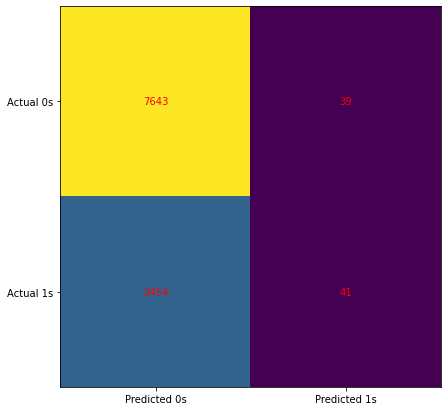

AUC: 0.6501741311313072


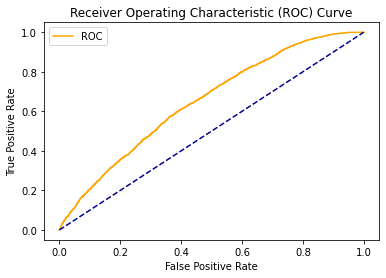

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size=0.2, random_state=1)

#Scaling
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


import catboost as cb
from sklearn.model_selection import GridSearchCV
params = {'depth': [4, 7, 10],
          'learning_rate' : [0.03, 0.1, 0.15],
         'l2_leaf_reg': [1,4,9],
         'iterations': [300]}
cb1 = cb.CatBoostClassifier()
cb_classifier = GridSearchCV(cb1, params,  cv = 3)
cb_classifier.fit(X_train, y_train)
ytrain_pred = cb_classifier.predict_proba(X_train)
print('Catboost with Grid search cv train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = cb_classifier.predict_proba(X_test)
print('Catboost with Grid search cv test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

# Train Prediction classification report
print(classification_report(y_train, cb_classifier.predict(X_train)))

# Test Prediction classification report
print(classification_report(y_test, cb_classifier.predict(X_test)))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, cb_classifier.predict(X_test))
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

from sklearn import metrics
def plot_roc_curve(fpr, tpr,model):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    auc = metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    print('AUC:', auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show( )

fpr, tpr, thresholds = roc_curve(y_test,cb_classifier.predict_proba(X_test)[:,1] )
plot_roc_curve(fpr,tpr,cb_classifier)

In [85]:
test_data = df1_test1.drop(['ID'], axis =1)
pred = cb_classifier.predict(test_data)

submission['Response'] = pred
submission.to_csv('submission8_cb.csv', index =False)

## LGBM

### DF1

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
train =pd.read_csv('train_imputed_target_encoded_ohe.csv')
test =pd.read_csv('test_imputed_target_encoded_ohe.csv')

In [4]:
X = train.drop(['ID', 'Response'], axis=1)
y = train['Response']

              precision    recall  f1-score   support

           0       0.80      0.98      0.88     30991
           1       0.73      0.21      0.33      9714

    accuracy                           0.79     40705
   macro avg       0.76      0.59      0.60     40705
weighted avg       0.78      0.79      0.75     40705

              precision    recall  f1-score   support

           0       0.78      0.97      0.86      7682
           1       0.62      0.17      0.26      2495

    accuracy                           0.77     10177
   macro avg       0.70      0.57      0.56     10177
weighted avg       0.74      0.77      0.72     10177

[[7424  258]
 [2079  416]]


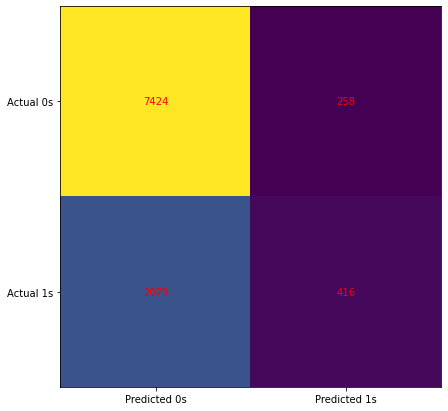

AUC: 0.7495996679638892


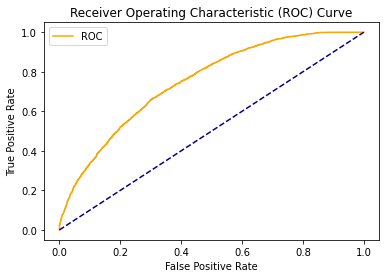

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size=0.2, random_state=1)

#Scaling
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

import lightgbm as lgb
from sklearn import metrics
lg = lgb.LGBMClassifier(silent=False)
lg.fit(X_train,y_train)

# Train Prediction classification report
print(classification_report(y_train, lg.predict(X_train)))

# Test Prediction classification report
print(classification_report(y_test, lg.predict(X_test)))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, lg.predict(X_test))
print(cm)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, lg.predict(X_test))
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

from sklearn import metrics
def plot_roc_curve(fpr, tpr,model):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    auc = metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    print('AUC:', auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show( )

fpr, tpr, thresholds = roc_curve(y_test,lg.predict_proba(X_test)[:,1] )
plot_roc_curve(fpr,tpr,lg)

In [10]:
submission = pd.read_csv('submission6_nb.csv')

In [11]:
test_data = test.drop(['ID'], axis =1)
pred = lg.predict(test_data)

submission['Response'] = pred
submission.to_csv('submission16_lg.csv', index =False)

## XGBoost

### DF1

In [90]:
X = df1_train1.drop(['ID'], axis=1)
y = train['Response']

              precision    recall  f1-score   support

           0       0.80      0.99      0.88     30991
           1       0.90      0.19      0.31      9714

    accuracy                           0.80     40705
   macro avg       0.85      0.59      0.60     40705
weighted avg       0.82      0.80      0.75     40705

              precision    recall  f1-score   support

           0       0.76      0.97      0.86      7682
           1       0.46      0.07      0.12      2495

    accuracy                           0.75     10177
   macro avg       0.61      0.52      0.49     10177
weighted avg       0.69      0.75      0.68     10177

[[7471  211]
 [2317  178]]


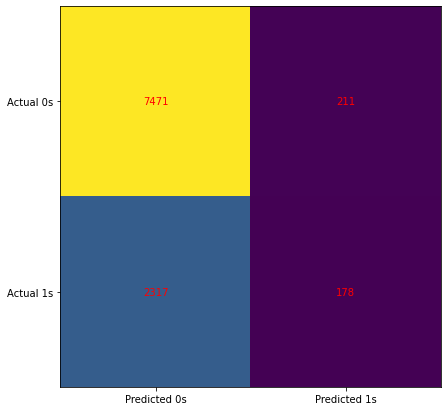

AUC: 0.6523525050621941


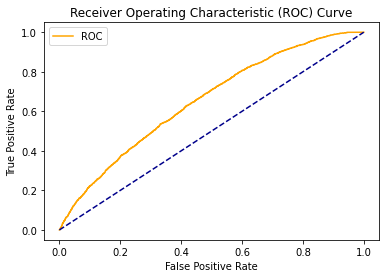

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size=0.2, random_state=1)

#Scaling
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

import xgboost as xgb
from sklearn import metrics
# Parameter Tuning
xg = xgb.XGBClassifier()

xg.fit(X_train, y_train)
#xg.best_estimator_

#model_xg = xgb.XGBClassifier(max_depth=50, min_child_weight=1,  n_estimators=200,\
#                          n_jobs=-1 , verbose=1,learning_rate=0.16)
#model_xg.fit(X_train,y_train)

# Train Prediction classification report
print(classification_report(y_train, xg.predict(X_train)))

# Test Prediction classification report
print(classification_report(y_test, xg.predict(X_test)))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, xg.predict(X_test))
print(cm)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, xg.predict(X_test))
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

from sklearn import metrics
def plot_roc_curve(fpr, tpr,model):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    auc = metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    print('AUC:', auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show( )

fpr, tpr, thresholds = roc_curve(y_test,xg.predict_proba(X_test)[:,1] )
plot_roc_curve(fpr,tpr,xg)

In [92]:
test_data = df1_test1.drop(['ID'], axis =1)
pred = xg.predict(test_data)

submission['Response'] = pred
submission.to_csv('submission10_xg.csv', index =False)

### Hyper parameter tuning

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] learning_rate=0.05, max_depth=10, min_child_weight=1, n_estimators=200 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.05, max_depth=10, min_child_weight=1, n_estimators=200, score=0.757, total=   2.8s
[CV] learning_rate=0.05, max_depth=10, min_child_weight=1, n_estimators=200 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s


[CV]  learning_rate=0.05, max_depth=10, min_child_weight=1, n_estimators=200, score=0.754, total=   2.9s
[CV] learning_rate=0.05, max_depth=10, min_child_weight=1, n_estimators=200 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.6s remaining:    0.0s


[CV]  learning_rate=0.05, max_depth=10, min_child_weight=1, n_estimators=200, score=0.758, total=   3.1s
[CV] learning_rate=0.05, max_depth=10, min_child_weight=3, n_estimators=200 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    8.8s remaining:    0.0s


[CV]  learning_rate=0.05, max_depth=10, min_child_weight=3, n_estimators=200, score=0.761, total=   3.0s
[CV] learning_rate=0.05, max_depth=10, min_child_weight=3, n_estimators=200 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   11.8s remaining:    0.0s


[CV]  learning_rate=0.05, max_depth=10, min_child_weight=3, n_estimators=200, score=0.756, total=   2.9s
[CV] learning_rate=0.05, max_depth=10, min_child_weight=3, n_estimators=200 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   14.7s remaining:    0.0s


[CV]  learning_rate=0.05, max_depth=10, min_child_weight=3, n_estimators=200, score=0.760, total=   3.0s
[CV] learning_rate=0.05, max_depth=10, min_child_weight=6, n_estimators=200 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   17.7s remaining:    0.0s


[CV]  learning_rate=0.05, max_depth=10, min_child_weight=6, n_estimators=200, score=0.760, total=   3.1s
[CV] learning_rate=0.05, max_depth=10, min_child_weight=6, n_estimators=200 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   20.8s remaining:    0.0s


[CV]  learning_rate=0.05, max_depth=10, min_child_weight=6, n_estimators=200, score=0.758, total=   3.8s
[CV] learning_rate=0.05, max_depth=10, min_child_weight=6, n_estimators=200 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   24.6s remaining:    0.0s


[CV]  learning_rate=0.05, max_depth=10, min_child_weight=6, n_estimators=200, score=0.761, total=   3.7s
[CV] learning_rate=0.05, max_depth=30, min_child_weight=1, n_estimators=200 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   28.3s remaining:    0.0s


[CV]  learning_rate=0.05, max_depth=30, min_child_weight=1, n_estimators=200, score=0.743, total=  10.3s
[CV] learning_rate=0.05, max_depth=30, min_child_weight=1, n_estimators=200 
[CV]  learning_rate=0.05, max_depth=30, min_child_weight=1, n_estimators=200, score=0.740, total=   9.4s
[CV] learning_rate=0.05, max_depth=30, min_child_weight=1, n_estimators=200 
[CV]  learning_rate=0.05, max_depth=30, min_child_weight=1, n_estimators=200, score=0.736, total=   9.4s
[CV] learning_rate=0.05, max_depth=30, min_child_weight=3, n_estimators=200 
[CV]  learning_rate=0.05, max_depth=30, min_child_weight=3, n_estimators=200, score=0.746, total=   8.9s
[CV] learning_rate=0.05, max_depth=30, min_child_weight=3, n_estimators=200 
[CV]  learning_rate=0.05, max_depth=30, min_child_weight=3, n_estimators=200, score=0.744, total=   9.2s
[CV] learning_rate=0.05, max_depth=30, min_child_weight=3, n_estimators=200 
[CV]  learning_rate=0.05, max_depth=30, min_child_weight=3, n_estimators=200, score=0.744,

[CV]  learning_rate=0.16, max_depth=10, min_child_weight=1, n_estimators=200, score=0.743, total=   4.6s
[CV] learning_rate=0.16, max_depth=10, min_child_weight=1, n_estimators=200 
[CV]  learning_rate=0.16, max_depth=10, min_child_weight=1, n_estimators=200, score=0.745, total=   5.0s
[CV] learning_rate=0.16, max_depth=10, min_child_weight=3, n_estimators=200 
[CV]  learning_rate=0.16, max_depth=10, min_child_weight=3, n_estimators=200, score=0.751, total=   4.6s
[CV] learning_rate=0.16, max_depth=10, min_child_weight=3, n_estimators=200 
[CV]  learning_rate=0.16, max_depth=10, min_child_weight=3, n_estimators=200, score=0.748, total=   4.6s
[CV] learning_rate=0.16, max_depth=10, min_child_weight=3, n_estimators=200 
[CV]  learning_rate=0.16, max_depth=10, min_child_weight=3, n_estimators=200, score=0.746, total=   4.6s
[CV] learning_rate=0.16, max_depth=10, min_child_weight=6, n_estimators=200 
[CV]  learning_rate=0.16, max_depth=10, min_child_weight=6, n_estimators=200, score=0.751,

[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed: 12.5min finished


Extreme GBM with Grid search train roc-auc: 0.8727687862676026
Extreme GBM with Grid search test roc-auc: 0.6647624590498362
              precision    recall  f1-score   support

           0       0.79      0.99      0.88     30991
           1       0.91      0.17      0.28      9714

    accuracy                           0.80     40705
   macro avg       0.85      0.58      0.58     40705
weighted avg       0.82      0.80      0.74     40705

              precision    recall  f1-score   support

           0       0.76      0.98      0.86      7682
           1       0.49      0.07      0.12      2495

    accuracy                           0.75     10177
   macro avg       0.63      0.52      0.49     10177
weighted avg       0.70      0.75      0.68     10177



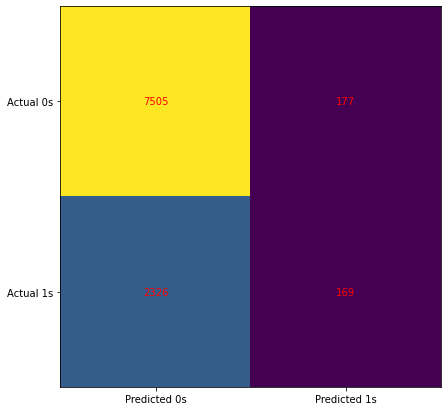

AUC: 0.6647624590498362


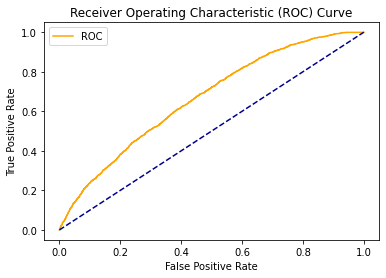

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size=0.2, random_state=1)

from sklearn.preprocessing import MinMaxScaler
#Scaling
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

import xgboost as xgb
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
# Parameter Tuning
xg1 = xgb.XGBClassifier()
param_dist = {"max_depth": [10,30,50],
              "min_child_weight" : [1,3,6],
              "n_estimators": [200],
              "learning_rate": [0.05, 0.1,0.16],}
xg = GridSearchCV(xg1, param_grid=param_dist, cv = 3, 
                                   verbose=10)
xg.fit(X_train, y_train)
#xg.best_estimator_

#model = xgb.XGBClassifier(max_depth=50, min_child_weight=1,  n_estimators=200,\
#                          n_jobs=-1 , verbose=1,learning_rate=0.16)
#model.fit(X_train,y_train)

ytrain_pred = xg.predict_proba(X_train)
print('Extreme GBM with Grid search train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = xg.predict_proba(X_test)
print('Extreme GBM with Grid search test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

# Train Prediction classification report
print(classification_report(y_train, xg.predict(X_train)))

# Test Prediction classification report
print(classification_report(y_test, xg.predict(X_test)))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, xg.predict(X_test))
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

from sklearn import metrics
def plot_roc_curve(fpr, tpr,model):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    auc = metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    print('AUC:', auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show( )

fpr, tpr, thresholds = roc_curve(y_test,xg.predict_proba(X_test)[:,1] )
plot_roc_curve(fpr,tpr,xg)

In [93]:
test_data = df1_test1.drop(['ID'], axis =1)
pred = xg.predict(test_data)

submission['Response'] = pred
submission.to_csv('submission11_xg.csv', index =False)